[Elliptical Galaxies](#1)
[Disk Galaxies](#2)
[Bulgy Disk Galaxies](#3)


### This code provides the prdictions, feature ranking and a plot of true vs predicted values of galaxy sizes  independent datasets divided by galaxy morphology: disks vs ellipticals



In [1]:
import time
import numpy as np
import pandas as pd

import galsim #install with conda install -c conda_forge galsim

import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.colors as norm
from matplotlib.gridspec import SubplotSpec
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline #This allows one to build different steps together
from sklearn.preprocessing import StandardScaler, RobustScaler

from tqdm import tqdm 

from pysr import PySRRegressor


In [2]:
import target_predicting_ML_functions_and_feature_ranking as functions

#### <font color='violet'> ML modelling with 33 galaxy and halo features; df from v5 used here


#### Read the normalized 31-feature dataset (see explanations in related doc 'TNG-SAM 33-feature analysis')

In [3]:
df_normalized_31 = pd.read_csv('Halo Mass Normalized Dataset w 31 features.csv')

#### Add the column 'BulgeMstar_ratio' defined as Bulge mass / Stellar mass, to be used as a proxy for galaxy morphology

In [4]:
df_normalized_31.loc[:, 'BulgeMstar_ratio'] = df_normalized_31.loc[:,'GalpropNormMbulge']/df_normalized_31.loc[:, 'GalpropNormMstar']


In [5]:
df_normalized_31.shape

(35390, 33)

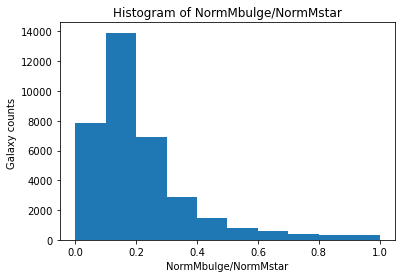

In [6]:
plt.hist(df_normalized_31['BulgeMstar_ratio'])
plt.title('Histogram of NormMbulge/NormMstar')
plt.xlabel('NormMbulge/NormMstar')
plt.ylabel('Galaxy counts ')
# plt.savefig('Histogram of GalpropNormMbulgebyNormMstar.jpg', dpi=500)

plt.show()


## <font color='purple'> <a id =1> </a> <br> Elliptical Galaxies:  B/Mstar > 0.5

In [39]:
# Looking at the histogram, define elliptical galaxies to be the ones with bulge/mstar>=0.5
df_ellipticals = df_normalized_31[df_normalized_31['BulgeMstar_ratio']>0.5]

In [10]:
# df_ellipticals.to_csv('Ellipticals Dataset_as defined in notebook v13', index=False)

In [40]:
df_ellipticals.shape

(2422, 33)

In [12]:
X_ellipticals = df_ellipticals.drop(columns=['GalpropNormHalfRadius', 'BulgeMstar_ratio'])


y_ellipticals = df_ellipticals.loc[:,'GalpropNormHalfRadius']

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params, best score: 0.7884 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}
RF Accuracy: 0.78 (+/- 0.05)


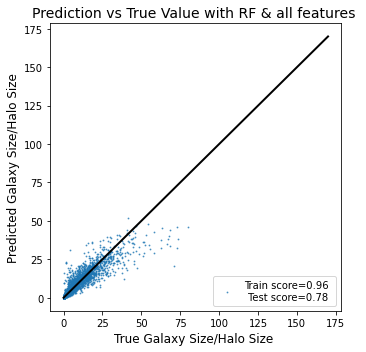

Elapsed time to compute the importances: 0.023 seconds
Elapsed time to compute the importances: 1.743 seconds


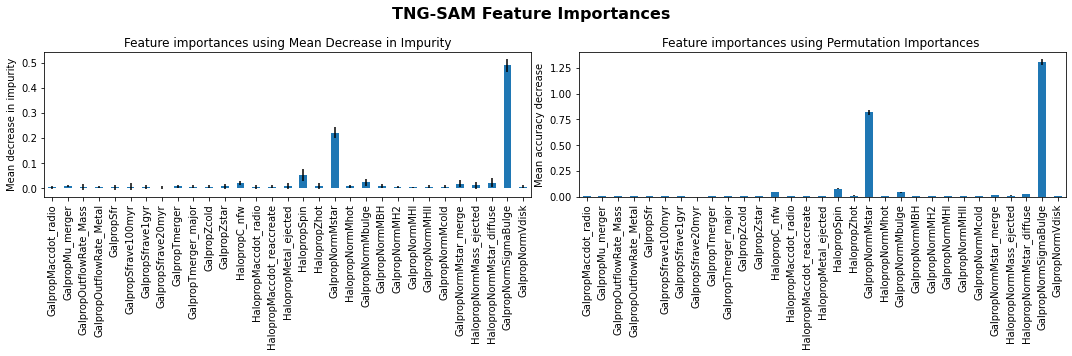

  0%|                                                    | 0/31 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/31 [00:00<00:13,  2.30it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▊                                         | 2/31 [00:00<00:12,  2.28it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▎                                       | 3/31 [00:01<00:12,  2.27it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▋                                      | 4/31 [00:01<00:11,  2.25it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|███████                                     | 5/31 [00:02<00:11,  2.26it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▌                                   | 6/31 [00:02<00:11,  2.24it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|█████████▉                                  | 7/31 [00:03<00:10,  2.25it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▎                                | 8/31 [00:03<00:10,  2.24it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▊                               | 9/31 [00:04<00:09,  2.21it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|█████████████▊                             | 10/31 [00:04<00:09,  2.24it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▎                           | 11/31 [00:04<00:08,  2.36it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▋                          | 12/31 [00:05<00:08,  2.36it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████                         | 13/31 [00:05<00:07,  2.33it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▍                       | 14/31 [00:06<00:07,  2.39it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 15/31 [00:06<00:06,  2.43it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 16/31 [00:06<00:06,  2.45it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▌                   | 17/31 [00:07<00:05,  2.42it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▉                  | 18/31 [00:07<00:05,  2.38it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████▎                | 19/31 [00:08<00:05,  2.34it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▋               | 20/31 [00:08<00:04,  2.36it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 21/31 [00:09<00:04,  2.29it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▌            | 22/31 [00:09<00:03,  2.35it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▉           | 23/31 [00:09<00:03,  2.36it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|█████████████████████████████████▎         | 24/31 [00:10<00:02,  2.35it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▋        | 25/31 [00:10<00:02,  2.33it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████       | 26/31 [00:11<00:02,  2.30it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▍     | 27/31 [00:11<00:01,  2.31it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▊    | 28/31 [00:12<00:01,  2.33it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▏  | 29/31 [00:12<00:00,  2.31it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 30/31 [00:12<00:00,  2.31it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 31/31 [00:13<00:00,  2.34it/s]


1. iteration: 
	 1 GalpropNormSigmaBulge 0.3789379492782892


  0%|                                                    | 0/30 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/30 [00:00<00:19,  1.50it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|██▉                                         | 2/30 [00:01<00:18,  1.55it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▍                                       | 3/30 [00:01<00:17,  1.56it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▊                                      | 4/30 [00:02<00:16,  1.56it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▎                                    | 5/30 [00:03<00:16,  1.56it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 6/30 [00:03<00:14,  1.61it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████▎                                 | 7/30 [00:04<00:14,  1.63it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|███████████▋                                | 8/30 [00:04<00:13,  1.66it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████▏                              | 9/30 [00:05<00:12,  1.64it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▎                            | 10/30 [00:06<00:11,  1.69it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 37%|███████████████▊                           | 11/30 [00:06<00:11,  1.64it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▏                         | 12/30 [00:07<00:10,  1.67it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▋                        | 13/30 [00:07<00:10,  1.69it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████                       | 14/30 [00:08<00:09,  1.75it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 15/30 [00:09<00:08,  1.69it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▉                    | 16/30 [00:09<00:08,  1.65it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▎                  | 17/30 [00:10<00:07,  1.68it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 18/30 [00:10<00:07,  1.65it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.323, test=0.245) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.488, test=0.187) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.577, test=0.098) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.125, test=0.037) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.270, test=-0.030) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.511, test=-0.240) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.204, test=0.131) total time=   0.0s
[CV 3/3] END 

 63%|███████████████████████████▏               | 19/30 [00:11<00:06,  1.68it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 20/30 [00:12<00:06,  1.65it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|██████████████████████████████             | 21/30 [00:12<00:05,  1.64it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.320, test=0.241) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.481, test=0.176) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.590, test=0.045) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.105, test=0.033) total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.116, test=0.007) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.261, test=-0.038) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.210, test=0.082) total time=   0.0s
[CV 1/3] END boo

[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.333, test=0.233) total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.479, test=0.182) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.569, test=0.052) total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.595, test=0.078) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.120, test=0.038) total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.119, test=0.010) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.489, test=-0.191) total time=   0.0s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_est

 73%|███████████████████████████████▌           | 22/30 [00:13<00:04,  1.62it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|████████████████████████████████▉          | 23/30 [00:14<00:04,  1.62it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 24/30 [00:14<00:03,  1.61it/s]

[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.322, test=0.235) total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.333, test=0.232) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.581, test=0.042) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.591, test=0.040) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.111, test=0.003) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.115, test=0.030) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.285, test=-0.023) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estima

[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.317, test=0.241) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.322, test=0.242) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.491, test=0.186) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.579, test=0.092) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.113, test=0.032) total time=   0.0s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.286, test=-0.019) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.276, test=-0.028) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_esti

 83%|███████████████████████████████████▊       | 25/30 [00:15<00:02,  1.68it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.333, test=0.232) total time=   0.0s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.322, test=0.245) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.590, test=0.077) total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.591, test=0.081) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.246, test=-0.042) total time=   0.0s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.284, test=-0.016) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.504, test=-0.191) total time=   0.1s
[CV 2/3]

[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.586, test=-0.122) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.580, test=0.014) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.290, test=0.204) total time=   0.0s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.458, test=0.071) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.461, test=0.161) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.619, test=-0.097) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.272, test=0.160) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_es

 87%|█████████████████████████████████████▎     | 26/30 [00:15<00:02,  1.73it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.467, test=0.175) total time=   0.0s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.487, test=0.141) total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.476, test=0.184) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.254, test=-0.026) total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.260, test=-0.040) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.484, test=-0.169) total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.513, test=-0.233) total time=   0.1s
[CV 2/

 90%|██████████████████████████████████████▋    | 27/30 [00:16<00:01,  1.68it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|████████████████████████████████████████▏  | 28/30 [00:16<00:01,  1.65it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 29/30 [00:17<00:00,  1.62it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 30/30 [00:18<00:00,  1.64it/s]


2. iteration: 
	 1 GalpropNormSigmaBulge 0.3789379492782892
	 2 GalpropNormMstar 0.631757029671015


  0%|                                                    | 0/29 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▌                                          | 1/29 [00:00<00:23,  1.18it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███                                         | 2/29 [00:01<00:21,  1.23it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▌                                       | 3/29 [00:02<00:20,  1.25it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████                                      | 4/29 [00:03<00:18,  1.35it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▌                                    | 5/29 [00:03<00:17,  1.40it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████                                   | 6/29 [00:04<00:16,  1.35it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▌                                 | 7/29 [00:05<00:16,  1.33it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▏                               | 8/29 [00:06<00:15,  1.35it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▋                              | 9/29 [00:06<00:15,  1.32it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 34%|██████████████▊                            | 10/29 [00:07<00:14,  1.27it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▎                          | 11/29 [00:08<00:14,  1.23it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▊                         | 12/29 [00:09<00:14,  1.21it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▎                       | 13/29 [00:10<00:13,  1.17it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 14/29 [00:11<00:13,  1.15it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 15/29 [00:12<00:12,  1.14it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▋                   | 16/29 [00:13<00:11,  1.12it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▏                 | 17/29 [00:13<00:10,  1.14it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▋                | 18/29 [00:14<00:09,  1.13it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 66%|████████████████████████████▏              | 19/29 [00:15<00:08,  1.12it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▋             | 20/29 [00:16<00:08,  1.11it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|███████████████████████████████▏           | 21/29 [00:17<00:07,  1.09it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▌          | 22/29 [00:18<00:05,  1.17it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|██████████████████████████████████         | 23/29 [00:18<00:04,  1.24it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▌       | 24/29 [00:19<00:04,  1.19it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|█████████████████████████████████████      | 25/29 [00:20<00:03,  1.24it/s]

[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.803, test=0.293) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.518, test=0.404) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.706, test=0.338) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.804, test=0.271) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.508, test=0.447) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.707, test=0.378) total time=   0.0s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.684, test=0.368) total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimato

 90%|██████████████████████████████████████▌    | 26/29 [00:21<00:02,  1.19it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|████████████████████████████████████████   | 27/29 [00:22<00:01,  1.16it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.534, test=0.364) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.717, test=0.264) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.498, test=0.432) total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.501, test=0.430) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.790, test=0.258) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.804, test=0.280) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.520, test=0.430) total time=   0.1s
[CV 3/3] END

 97%|█████████████████████████████████████████▌ | 28/29 [00:23<00:00,  1.14it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.550, test=0.357) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.783, test=0.357) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.792, test=0.350) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.519, test=0.417) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.785, test=0.257) total time=   0.0s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.806, test=0.233) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.715, test=0.309) total time=   0.0s
[CV 3/3]

100%|███████████████████████████████████████████| 29/29 [00:24<00:00,  1.20it/s]


3. iteration: 
	 1 GalpropNormSigmaBulge 0.3789379492782892
	 2 GalpropNormMstar 0.631757029671015
	 3 GalpropNormMstar_merge 0.7652099704860734


  0%|                                                    | 0/28 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.524, test=0.390) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.679, test=0.378) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.774, test=0.352) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.800, test=0.305) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.516, test=0.401) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.521, test=0.428) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.687, test=0.374) total time=   0.2s
[CV 2/3] END

  4%|█▌                                          | 1/28 [00:01<00:30,  1.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.712, test=0.330) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.788, test=0.303) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.779, test=0.350) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.520, test=0.405) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.790, test=0.307) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.798, test=0.385) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.513, test=0.426) total time=   0.1s
[CV 1/

[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.791, test=0.316) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.506, test=0.414) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.717, test=0.312) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.791, test=0.394) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.520, test=0.405) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.719, test=0.385) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.785, test=0.329) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_est

  7%|███▏                                        | 2/28 [00:02<00:27,  1.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.795, test=0.264) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.712, test=0.383) total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.717, test=0.346) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.802, test=0.300) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.799, test=0.344) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.505, test=0.388) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.694, test=0.327) total time=   0.1s
[CV 1/3] E

 11%|████▋                                       | 3/28 [00:03<00:26,  1.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.507, test=0.402) total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.509, test=0.415) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.702, test=0.410) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.504, test=0.421) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.713, test=0.352) total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.723, test=0.347) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.489, test=0.422) total time=   0.1s
[CV 3/3] END boo

 14%|██████▎                                     | 4/28 [00:04<00:26,  1.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|███████▊                                    | 5/28 [00:05<00:24,  1.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████▍                                  | 6/28 [00:06<00:23,  1.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 7/28 [00:07<00:22,  1.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▌                               | 8/28 [00:08<00:21,  1.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|██████████████▏                             | 9/28 [00:09<00:20,  1.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▎                           | 10/28 [00:10<00:19,  1.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▉                          | 11/28 [00:11<00:17,  1.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▍                        | 12/28 [00:12<00:15,  1.01it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▉                       | 13/28 [00:13<00:15,  1.02s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 14/28 [00:14<00:14,  1.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████                    | 15/28 [00:15<00:13,  1.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▌                  | 16/28 [00:16<00:12,  1.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████                 | 17/28 [00:18<00:11,  1.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▋               | 18/28 [00:18<00:09,  1.01it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 19/28 [00:19<00:08,  1.03it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▋            | 20/28 [00:20<00:08,  1.01s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 21/28 [00:21<00:07,  1.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|█████████████████████████████████▊         | 22/28 [00:23<00:06,  1.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▎       | 23/28 [00:24<00:05,  1.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|████████████████████████████████████▊      | 24/28 [00:25<00:04,  1.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▍    | 25/28 [00:26<00:03,  1.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|███████████████████████████████████████▉   | 26/28 [00:27<00:02,  1.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▍ | 27/28 [00:28<00:01,  1.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 28/28 [00:29<00:00,  1.06s/it]


4. iteration: 
	 1 GalpropNormSigmaBulge 0.3789379492782892
	 2 GalpropNormMstar 0.631757029671015
	 3 GalpropNormMstar_merge 0.7652099704860734
	 4 HalopropSpin 0.7955678873644985


  0%|                                                    | 0/27 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▋                                          | 1/27 [00:01<00:33,  1.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███▎                                        | 2/27 [00:02<00:32,  1.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▉                                       | 3/27 [00:03<00:30,  1.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.875, test=0.624) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.901, test=0.641) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.897, test=0.620) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.712, test=0.630) total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.717, test=0.639) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.892, test=0.629) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.903, test=0.639) total time=   0.1s
[CV 1/3]

[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.883, test=0.656) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.904, test=0.641) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.735, test=0.639) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.895, test=0.673) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.762, test=0.681) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.888, test=0.743) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.892, test=0.744) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estim

 15%|██████▌                                     | 4/27 [00:04<00:27,  1.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▏                                   | 5/27 [00:06<00:27,  1.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▊                                  | 6/27 [00:07<00:26,  1.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▍                                | 7/27 [00:08<00:23,  1.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████                               | 8/27 [00:09<00:22,  1.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.767, test=0.684) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.899, test=0.698) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.912, test=0.736) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.742, test=0.635) total time=   0.0s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.740, test=0.643) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.902, test=0.662) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.910, test=0.661) total time=   0.2s
[CV 2/3] END 

 33%|██████████████▋                             | 9/27 [00:11<00:22,  1.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.885, test=0.632) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.770, test=0.680) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.908, test=0.697) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.921, test=0.693) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.926, test=0.692) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.722, test=0.662) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.745, test=0.644) total time=   0.2s
[CV 3/3] END 

 37%|███████████████▉                           | 10/27 [00:12<00:20,  1.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.917, test=0.658) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.778, test=0.662) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.902, test=0.706) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.920, test=0.708) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.745, test=0.679) total time=   0.0s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.746, test=0.680) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.915, test=0.680) total time=   0.0s
[CV 3/3] EN

 41%|█████████████████▌                         | 11/27 [00:13<00:20,  1.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.739, test=0.643) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.896, test=0.653) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.903, test=0.655) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.889, test=0.650) total time=   0.0s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.905, test=0.653) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.745, test=0.684) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.904, test=0.713) total time=   0.3s
[CV 3/3] END 

 44%|███████████████████                        | 12/27 [00:14<00:18,  1.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.747, test=0.688) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.915, test=0.710) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.922, test=0.711) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.748, test=0.683) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.905, test=0.713) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.919, test=0.694) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.768, test=0.684) total time=   0.0s
[CV 1/3] EN

 48%|████████████████████▋                      | 13/27 [00:16<00:17,  1.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.919, test=0.705) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.756, test=0.634) total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.755, test=0.677) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.912, test=0.660) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.923, test=0.706) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.763, test=0.708) total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.763, test=0.712) total time=   0.2s
[CV 3/3] EN

 52%|██████████████████████▎                    | 14/27 [00:17<00:16,  1.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|███████████████████████▉                   | 15/27 [00:18<00:15,  1.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▍                 | 16/27 [00:20<00:14,  1.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████                | 17/27 [00:21<00:13,  1.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 18/27 [00:22<00:11,  1.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|██████████████████████████████▎            | 19/27 [00:24<00:10,  1.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▊           | 20/27 [00:25<00:09,  1.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 78%|█████████████████████████████████▍         | 21/27 [00:26<00:08,  1.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|███████████████████████████████████        | 22/27 [00:28<00:06,  1.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▋      | 23/27 [00:29<00:05,  1.36s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▏    | 24/27 [00:31<00:04,  1.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|███████████████████████████████████████▊   | 25/27 [00:32<00:02,  1.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▍ | 26/27 [00:33<00:01,  1.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 27/27 [00:35<00:00,  1.31s/it]


5. iteration: 
	 1 GalpropNormSigmaBulge 0.3789379492782892
	 2 GalpropNormMstar 0.631757029671015
	 3 GalpropNormMstar_merge 0.7652099704860734
	 4 HalopropSpin 0.7955678873644985
	 5 HalopropC_nfw 0.8115313899592044


  0%|                                                    | 0/26 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▋                                          | 1/26 [00:01<00:39,  1.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  8%|███▍                                        | 2/26 [00:03<00:37,  1.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████                                       | 3/26 [00:04<00:35,  1.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▊                                     | 4/26 [00:06<00:33,  1.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▍                                   | 5/26 [00:07<00:31,  1.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████▏                                 | 6/26 [00:09<00:30,  1.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|███████████▊                                | 7/26 [00:10<00:28,  1.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▌                              | 8/26 [00:12<00:26,  1.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▏                            | 9/26 [00:13<00:25,  1.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.938, test=0.735) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.942, test=0.802) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.786, test=0.710) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.924, test=0.751) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.927, test=0.758) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.944, test=0.764) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.944, test=0.777) total time=   0.3s
[CV 2/3

 38%|████████████████▌                          | 10/26 [00:15<00:23,  1.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████▏                        | 11/26 [00:16<00:22,  1.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▊                       | 12/26 [00:17<00:20,  1.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.925, test=0.752) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.930, test=0.762) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.941, test=0.761) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.945, test=0.770) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.785, test=0.683) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.932, test=0.746) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.765, test=0.698) total time=   0.0s
[CV 3/3] EN

 50%|█████████████████████▌                     | 13/26 [00:19<00:17,  1.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████▏                   | 14/26 [00:20<00:16,  1.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▊                  | 15/26 [00:22<00:15,  1.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▍                | 16/26 [00:23<00:14,  1.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|████████████████████████████               | 17/26 [00:24<00:13,  1.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▊             | 18/26 [00:26<00:11,  1.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.763, test=0.680) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.767, test=0.680) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.936, test=0.750) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.944, test=0.755) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.779, test=0.703) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.946, test=0.768) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.772, test=0.732) total time=   0.0s
[CV 1/3] EN

[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.921, test=0.752) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.926, test=0.754) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.942, test=0.764) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.942, test=0.749) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.777, test=0.702) total time=   0.0s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.782, test=0.716) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.944, test=0.754) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_est

 73%|███████████████████████████████▍           | 19/26 [00:27<00:10,  1.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|█████████████████████████████████          | 20/26 [00:29<00:08,  1.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.766, test=0.736) total time=   0.0s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.779, test=0.708) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.925, test=0.752) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.942, test=0.781) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.942, test=0.790) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.787, test=0.691) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.923, test=0.783) total time=   0.2s
[CV 2/3] END b

[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.925, test=0.786) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.781, test=0.665) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.927, test=0.737) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.930, test=0.755) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.941, test=0.743) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.789, test=0.689) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.786, test=0.695) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators

 81%|██████████████████████████████████▋        | 21/26 [00:30<00:07,  1.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.936, test=0.784) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.940, test=0.787) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.790, test=0.690) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.946, test=0.744) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.940, test=0.784) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.779, test=0.718) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.937, test=0.736) total time=   0.1s
[CV 3

 85%|████████████████████████████████████▍      | 22/26 [00:32<00:05,  1.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|██████████████████████████████████████     | 23/26 [00:33<00:04,  1.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.765, test=0.728) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.933, test=0.752) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.782, test=0.708) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.934, test=0.745) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.945, test=0.780) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.748, test=0.703) total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.925, test=0.722) total time=   0.1s
[CV 2/3] EN

 92%|███████████████████████████████████████▋   | 24/26 [00:35<00:03,  1.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▎ | 25/26 [00:36<00:01,  1.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 26/26 [00:38<00:00,  1.48s/it]


6. iteration: 
	 1 GalpropNormSigmaBulge 0.3789379492782892
	 2 GalpropNormMstar 0.631757029671015
	 3 GalpropNormMstar_merge 0.7652099704860734
	 4 HalopropSpin 0.7955678873644985
	 5 HalopropC_nfw 0.8115313899592044
	 6 GalpropNormMbulge 0.8120989883559749


  0%|                                                    | 0/25 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▊                                          | 1/25 [00:01<00:36,  1.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  8%|███▌                                        | 2/25 [00:03<00:38,  1.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▎                                      | 3/25 [00:04<00:36,  1.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|███████                                     | 4/25 [00:06<00:36,  1.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 5/25 [00:08<00:34,  1.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▌                                 | 6/25 [00:09<00:31,  1.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▎                               | 7/25 [00:11<00:29,  1.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|██████████████                              | 8/25 [00:13<00:28,  1.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▊                            | 9/25 [00:15<00:26,  1.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▏                         | 10/25 [00:16<00:24,  1.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|██████████████████▉                        | 11/25 [00:18<00:22,  1.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▋                      | 12/25 [00:19<00:21,  1.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▎                    | 13/25 [00:21<00:19,  1.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████                   | 14/25 [00:22<00:17,  1.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 15/25 [00:24<00:16,  1.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▌               | 16/25 [00:26<00:14,  1.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 17/25 [00:28<00:13,  1.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|██████████████████████████████▉            | 18/25 [00:29<00:12,  1.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.779, test=0.700) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.950, test=0.783) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.956, test=0.794) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.770, test=0.697) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.939, test=0.761) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.936, test=0.762) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.938, test=0.786) total time=   0.4s
[CV 2/3] EN

 76%|████████████████████████████████▋          | 19/25 [00:31<00:10,  1.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 20/25 [00:33<00:08,  1.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████       | 21/25 [00:34<00:06,  1.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.944, test=0.764) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.955, test=0.783) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.937, test=0.726) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.938, test=0.793) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.949, test=0.795) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.954, test=0.794) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.784, test=0.669) total time=   0.1s
[CV 3/3

 88%|█████████████████████████████████████▊     | 22/25 [00:36<00:04,  1.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 92%|███████████████████████████████████████▌   | 23/25 [00:38<00:03,  1.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▎ | 24/25 [00:39<00:01,  1.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 25/25 [00:41<00:00,  1.66s/it]


7. iteration: 
	 1 GalpropNormSigmaBulge 0.3789379492782892
	 2 GalpropNormMstar 0.631757029671015
	 3 GalpropNormMstar_merge 0.7652099704860734
	 4 HalopropSpin 0.7955678873644985
	 5 HalopropC_nfw 0.8115313899592044
	 6 GalpropNormMbulge 0.8120989883559749
	 7 HalopropMetal_ejected 0.8262629080067674


  0%|                                                    | 0/24 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▊                                          | 1/24 [00:01<00:43,  1.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.792, test=0.712) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.948, test=0.815) total time=   0.5s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.943, test=0.780) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.941, test=0.818) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.949, test=0.820) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.790, test=0.737) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.796, test=0.737) total time=   0.3s
[CV 3/3] END b

  8%|███▋                                        | 2/24 [00:03<00:41,  1.89s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▌                                      | 3/24 [00:05<00:39,  1.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▎                                    | 4/24 [00:07<00:37,  1.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.950, test=0.797) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.952, test=0.770) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.957, test=0.819) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.779, test=0.723) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.943, test=0.775) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.952, test=0.800) total time=   0.5s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.797, test=0.708) total time=   0.1s
[CV 1/3] END

[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.794, test=0.677) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.943, test=0.765) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.946, test=0.813) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.958, test=0.796) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.783, test=0.732) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.952, test=0.786) total time=   0.5s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.789, test=0.704) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_esti

 21%|█████████▏                                  | 5/24 [00:09<00:35,  1.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 6/24 [00:11<00:33,  1.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▊                               | 7/24 [00:13<00:31,  1.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.792, test=0.729) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.950, test=0.799) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.957, test=0.821) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.794, test=0.687) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.945, test=0.772) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.948, test=0.778) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.952, test=0.814) total time=   0.2s
[CV 1/3] END

[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.951, test=0.807) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.957, test=0.818) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.794, test=0.720) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.944, test=0.784) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.952, test=0.810) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.954, test=0.787) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.801, test=0.701) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_

 33%|██████████████▋                             | 8/24 [00:15<00:29,  1.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.961, test=0.792) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.794, test=0.720) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.948, test=0.818) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.802, test=0.702) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.948, test=0.810) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.954, test=0.787) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.786, test=0.706) total time=   0.1s
[CV 2/3] EN

 38%|████████████████▌                           | 9/24 [00:16<00:28,  1.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|█████████████████▉                         | 10/24 [00:18<00:26,  1.89s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▋                       | 11/24 [00:20<00:23,  1.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 12/24 [00:22<00:21,  1.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████▎                   | 13/24 [00:24<00:20,  1.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|█████████████████████████                  | 14/24 [00:26<00:18,  1.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▉                | 15/24 [00:27<00:16,  1.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 16/24 [00:29<00:13,  1.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▍            | 17/24 [00:31<00:12,  1.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 18/24 [00:33<00:10,  1.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|██████████████████████████████████         | 19/24 [00:34<00:08,  1.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▊       | 20/24 [00:36<00:07,  1.77s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▋     | 21/24 [00:38<00:05,  1.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 92%|███████████████████████████████████████▍   | 22/24 [00:40<00:03,  1.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▏ | 23/24 [00:42<00:01,  1.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 24/24 [00:44<00:00,  1.86s/it]


8. iteration: 
	 1 GalpropNormSigmaBulge 0.3789379492782892
	 2 GalpropNormMstar 0.631757029671015
	 3 GalpropNormMstar_merge 0.7652099704860734
	 4 HalopropSpin 0.7955678873644985
	 5 HalopropC_nfw 0.8115313899592044
	 6 GalpropNormMbulge 0.8120989883559749
	 7 HalopropMetal_ejected 0.8262629080067674
	 8 HalopropZhot 0.8219497719044462


  0%|                                                    | 0/23 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▉                                          | 1/23 [00:02<00:51,  2.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|███▊                                        | 2/23 [00:04<00:47,  2.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▋                                      | 3/23 [00:06<00:44,  2.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▋                                    | 4/23 [00:08<00:41,  2.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▌                                  | 5/23 [00:10<00:36,  2.02s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▍                                | 6/23 [00:12<00:35,  2.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.957, test=0.797) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.796, test=0.728) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.950, test=0.801) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.956, test=0.807) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.953, test=0.824) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.790, test=0.735) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.955, test=0.781) total time=   0.6s
[CV 1/3] E

 30%|█████████████▍                              | 7/23 [00:14<00:31,  2.00s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▎                            | 8/23 [00:16<00:30,  2.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|█████████████████▏                          | 9/23 [00:19<00:30,  2.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.796, test=0.713) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.950, test=0.825) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.956, test=0.792) total time=   0.5s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.810, test=0.689) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.948, test=0.808) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.953, test=0.821) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.960, test=0.791) total time=   0.1s
[CV 2/3] END bo

 43%|██████████████████▋                        | 10/23 [00:21<00:27,  2.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▌                      | 11/23 [00:23<00:25,  2.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▍                    | 12/23 [00:25<00:23,  2.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▎                  | 13/23 [00:27<00:21,  2.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████▏                | 14/23 [00:29<00:19,  2.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.957, test=0.827) total time=   0.5s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.795, test=0.726) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.947, test=0.788) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.958, test=0.819) total time=   0.5s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.798, test=0.684) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.951, test=0.781) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.960, test=0.788) total time=   0.3s
[CV 2/3

 65%|████████████████████████████               | 15/23 [00:31<00:17,  2.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|█████████████████████████████▉             | 16/23 [00:34<00:15,  2.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.949, test=0.780) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.951, test=0.784) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.956, test=0.843) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.805, test=0.709) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.949, test=0.810) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.943, test=0.774) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.952, test=0.802) total time=   0.5s
[CV 2/3] END b

[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.955, test=0.807) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.956, test=0.804) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.807, test=0.688) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.951, test=0.839) total time=   0.5s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.960, test=0.787) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.809, test=0.718) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.950, test=0.804) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estim

 74%|███████████████████████████████▊           | 17/23 [00:36<00:13,  2.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.794, test=0.729) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.946, test=0.815) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.951, test=0.813) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.955, test=0.816) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.958, test=0.804) total time=   0.5s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.803, test=0.696) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.949, test=0.787) total time=   0.1s
[CV 3/3] END 

 78%|█████████████████████████████████▋         | 18/23 [00:38<00:10,  2.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▌       | 19/23 [00:40<00:08,  2.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.955, test=0.794) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.959, test=0.814) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.782, test=0.705) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.948, test=0.803) total time=   0.5s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.958, test=0.826) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.798, test=0.743) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.949, test=0.750) total time=   0.3s
[CV 2/3] 

 87%|█████████████████████████████████████▍     | 20/23 [00:42<00:06,  2.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.949, test=0.825) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.954, test=0.812) total time=   0.5s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.808, test=0.709) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.954, test=0.818) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.958, test=0.815) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.811, test=0.703) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.952, test=0.793) total time=   0.3s
[CV 1/3] END

 91%|███████████████████████████████████████▎   | 21/23 [00:44<00:04,  2.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▏ | 22/23 [00:46<00:02,  2.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 23/23 [00:48<00:00,  2.13s/it]


9. iteration: 
	 1 GalpropNormSigmaBulge 0.3789379492782892
	 2 GalpropNormMstar 0.631757029671015
	 3 GalpropNormMstar_merge 0.7652099704860734
	 4 HalopropSpin 0.7955678873644985
	 5 HalopropC_nfw 0.8115313899592044
	 6 GalpropNormMbulge 0.8120989883559749
	 7 HalopropMetal_ejected 0.8262629080067674
	 8 HalopropZhot 0.8219497719044462
	 9 GalpropOutflowRate_Mass 0.8208638284612834


  0%|                                                    | 0/22 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  5%|██                                          | 1/22 [00:02<00:47,  2.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|████                                        | 2/22 [00:04<00:45,  2.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████                                      | 3/22 [00:06<00:40,  2.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|████████                                    | 4/22 [00:08<00:40,  2.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████                                  | 5/22 [00:11<00:38,  2.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|████████████                                | 6/22 [00:13<00:35,  2.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|██████████████                              | 7/22 [00:15<00:33,  2.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|████████████████                            | 8/22 [00:17<00:31,  2.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|██████████████████                          | 9/22 [00:20<00:29,  2.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▌                       | 10/22 [00:22<00:27,  2.28s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 11/22 [00:24<00:25,  2.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▍                   | 12/22 [00:26<00:21,  2.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▍                 | 13/22 [00:28<00:20,  2.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▎               | 14/22 [00:30<00:17,  2.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▎             | 15/22 [00:33<00:15,  2.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▎           | 16/22 [00:35<00:13,  2.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|█████████████████████████████████▏         | 17/22 [00:38<00:11,  2.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▏       | 18/22 [00:40<00:09,  2.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|█████████████████████████████████████▏     | 19/22 [00:42<00:07,  2.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.813, test=0.689) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.948, test=0.785) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.953, test=0.787) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.957, test=0.771) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.963, test=0.783) total time=   0.5s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.792, test=0.681) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.947, test=0.805) total time=   0.1s
[CV 3/3] END 

 91%|███████████████████████████████████████    | 20/22 [00:45<00:04,  2.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 95%|█████████████████████████████████████████  | 21/22 [00:47<00:02,  2.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 22/22 [00:49<00:00,  2.27s/it]


10. iteration: 
	 1 GalpropNormSigmaBulge 0.3789379492782892
	 2 GalpropNormMstar 0.631757029671015
	 3 GalpropNormMstar_merge 0.7652099704860734
	 4 HalopropSpin 0.7955678873644985
	 5 HalopropC_nfw 0.8115313899592044
	 6 GalpropNormMbulge 0.8120989883559749
	 7 HalopropMetal_ejected 0.8262629080067674
	 8 HalopropZhot 0.8219497719044462
	 9 GalpropOutflowRate_Mass 0.8208638284612834
	 10 GalpropSfrave100myr 0.8167890600318248


  0%|                                                    | 0/21 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  5%|██                                          | 1/21 [00:02<00:49,  2.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▏                                       | 2/21 [00:05<00:50,  2.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.953, test=0.801) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.803, test=0.718) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.956, test=0.822) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.800, test=0.720) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.946, test=0.802) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.951, test=0.744) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.961, test=0.807) total time=   0.5s
[CV 1/3] E

 14%|██████▎                                     | 3/21 [00:07<00:47,  2.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▍                                   | 4/21 [00:10<00:44,  2.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.801, test=0.653) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.945, test=0.818) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.946, test=0.784) total time=   0.6s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.804, test=0.730) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.955, test=0.787) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.958, test=0.806) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.792, test=0.731) total time=   0.5s
[CV 1/3] END

 24%|██████████▍                                 | 5/21 [00:12<00:39,  2.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.948, test=0.831) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.948, test=0.776) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.953, test=0.837) total time=   0.7s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.804, test=0.719) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.955, test=0.770) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.959, test=0.780) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.956, test=0.825) total time=   0.4s
[CV 1/3] END b

 29%|████████████▌                               | 6/21 [00:15<00:39,  2.64s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▋                             | 7/21 [00:18<00:37,  2.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▊                           | 8/21 [00:21<00:35,  2.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.819, test=0.700) total time=   0.6s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.952, test=0.778) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.962, test=0.823) total time=   0.6s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.799, test=0.668) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.948, test=0.814) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.948, test=0.773) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.956, test=0.774) total time=   0.4s
[CV 2/3] E

 43%|██████████████████▊                         | 9/21 [00:23<00:31,  2.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.955, test=0.777) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.958, test=0.832) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.785, test=0.748) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.812, test=0.686) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.954, test=0.824) total time=   0.6s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.784, test=0.725) total time=   0.6s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.956, test=0.792) total time=   0.7s
[CV 3/3] END 

 48%|████████████████████▍                      | 10/21 [00:26<00:28,  2.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▌                    | 11/21 [00:28<00:26,  2.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.953, test=0.827) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.959, test=0.796) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.962, test=0.826) total time=   0.5s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.803, test=0.706) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.938, test=0.821) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.951, test=0.816) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.964, test=0.770) total time=   0.4s
[CV 1/3] E

 57%|████████████████████████▌                  | 12/21 [00:31<00:23,  2.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▌                | 13/21 [00:33<00:20,  2.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.807, test=0.674) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.958, test=0.767) total time=   0.6s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.812, test=0.710) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.951, test=0.814) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.954, test=0.835) total time=   0.6s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.810, test=0.657) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.959, test=0.767) total time=   0.3s
[CV 3/3] END boo

 67%|████████████████████████████▋              | 14/21 [00:36<00:17,  2.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▋            | 15/21 [00:38<00:14,  2.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▊          | 16/21 [00:41<00:12,  2.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▊        | 17/21 [00:43<00:09,  2.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|████████████████████████████████████▊      | 18/21 [00:46<00:07,  2.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▉    | 19/21 [00:48<00:04,  2.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 95%|████████████████████████████████████████▉  | 20/21 [00:51<00:02,  2.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 21/21 [00:53<00:00,  2.55s/it]


11. iteration: 
	 1 GalpropNormSigmaBulge 0.3789379492782892
	 2 GalpropNormMstar 0.631757029671015
	 3 GalpropNormMstar_merge 0.7652099704860734
	 4 HalopropSpin 0.7955678873644985
	 5 HalopropC_nfw 0.8115313899592044
	 6 GalpropNormMbulge 0.8120989883559749
	 7 HalopropMetal_ejected 0.8262629080067674
	 8 HalopropZhot 0.8219497719044462
	 9 GalpropOutflowRate_Mass 0.8208638284612834
	 10 GalpropSfrave100myr 0.8167890600318248
	 11 GalpropNormMHII 0.822752879811922


  0%|                                                    | 0/20 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  5%|██▏                                         | 1/20 [00:02<00:49,  2.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▍                                       | 2/20 [00:05<00:48,  2.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▌                                     | 3/20 [00:08<00:45,  2.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 4/20 [00:10<00:42,  2.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 5/20 [00:13<00:39,  2.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████▏                              | 6/20 [00:15<00:37,  2.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▍                            | 7/20 [00:18<00:34,  2.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▌                          | 8/20 [00:21<00:31,  2.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▊                        | 9/20 [00:23<00:27,  2.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 10/20 [00:25<00:24,  2.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.951, test=0.809) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.952, test=0.754) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.955, test=0.800) total time=   0.7s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.794, test=0.717) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.949, test=0.833) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.954, test=0.831) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.961, test=0.835) total time=   0.4s
[CV 2/3] END b

 55%|███████████████████████▋                   | 11/20 [00:28<00:23,  2.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 12/20 [00:31<00:21,  2.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▉               | 13/20 [00:34<00:19,  2.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|██████████████████████████████             | 14/20 [00:37<00:17,  2.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 15/20 [00:40<00:13,  2.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 16/20 [00:43<00:11,  2.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.954, test=0.801) total time=   0.7s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.805, test=0.697) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.954, test=0.794) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.945, test=0.764) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.955, test=0.801) total time=   0.7s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.793, test=0.722) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.945, test=0.812) total time=   0.1s
[CV 2/3] END boo

 85%|████████████████████████████████████▌      | 17/20 [00:45<00:08,  2.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▋    | 18/20 [00:48<00:05,  2.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.960, test=0.809) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.772, test=0.726) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.943, test=0.817) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.951, test=0.822) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.962, test=0.828) total time=   0.6s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.815, test=0.748) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.950, test=0.796) total time=   0.3s
[CV 1/3] E

 95%|████████████████████████████████████████▊  | 19/20 [00:51<00:02,  2.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 20/20 [00:54<00:00,  2.72s/it]


12. iteration: 
	 1 GalpropNormSigmaBulge 0.3789379492782892
	 2 GalpropNormMstar 0.631757029671015
	 3 GalpropNormMstar_merge 0.7652099704860734
	 4 HalopropSpin 0.7955678873644985
	 5 HalopropC_nfw 0.8115313899592044
	 6 GalpropNormMbulge 0.8120989883559749
	 7 HalopropMetal_ejected 0.8262629080067674
	 8 HalopropZhot 0.8219497719044462
	 9 GalpropOutflowRate_Mass 0.8208638284612834
	 10 GalpropSfrave100myr 0.8167890600318248
	 11 GalpropNormMHII 0.822752879811922
	 12 GalpropMaccdot_radio 0.8123505191029726


  0%|                                                    | 0/19 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  5%|██▎                                         | 1/19 [00:02<00:52,  2.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▋                                       | 2/19 [00:05<00:50,  2.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|██████▉                                     | 3/19 [00:09<00:49,  3.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.825, test=0.706) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.960, test=0.803) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.962, test=0.837) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.793, test=0.727) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.949, test=0.823) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.951, test=0.777) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.954, test=0.825) total time=   0.9s
[CV 2/3] END bo

[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.951, test=0.801) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.966, test=0.808) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.811, test=0.689) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.952, test=0.817) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.951, test=0.798) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.796, test=0.690) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.949, test=0.783) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimat

 21%|█████████▎                                  | 4/19 [00:12<00:45,  3.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.958, test=0.842) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.956, test=0.793) total time=   0.6s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.800, test=0.731) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.947, test=0.789) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.961, test=0.790) total time=   0.5s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.796, test=0.665) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.946, test=0.812) total time=   0.1s
[CV 3/3]

 26%|███████████▌                                | 5/19 [00:15<00:42,  3.01s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.799, test=0.707) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.951, test=0.767) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.963, test=0.807) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.811, test=0.694) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.952, test=0.805) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.952, test=0.813) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.951, test=0.771) total time=   0.2s
[CV 2/3] EN

 32%|█████████████▉                              | 6/19 [00:18<00:38,  2.99s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 37%|████████████████▏                           | 7/19 [00:20<00:35,  2.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████▌                         | 8/19 [00:23<00:32,  2.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.956, test=0.769) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.806, test=0.747) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.954, test=0.798) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.963, test=0.794) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.962, test=0.796) total time=   0.6s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.811, test=0.699) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.956, test=0.791) total time=   0.7s
[CV 3/3] E

 47%|████████████████████▊                       | 9/19 [00:26<00:29,  2.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▋                    | 10/19 [00:29<00:26,  2.89s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▉                  | 11/19 [00:31<00:21,  2.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████▏               | 12/19 [00:34<00:19,  2.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▍             | 13/19 [00:37<00:16,  2.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▋           | 14/19 [00:40<00:14,  2.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|█████████████████████████████████▉         | 15/19 [00:43<00:11,  2.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████▏      | 16/19 [00:45<00:08,  2.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▍    | 17/19 [00:48<00:05,  2.75s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 95%|████████████████████████████████████████▋  | 18/19 [00:51<00:02,  2.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 19/19 [00:54<00:00,  2.87s/it]


13. iteration: 
	 1 GalpropNormSigmaBulge 0.3789379492782892
	 2 GalpropNormMstar 0.631757029671015
	 3 GalpropNormMstar_merge 0.7652099704860734
	 4 HalopropSpin 0.7955678873644985
	 5 HalopropC_nfw 0.8115313899592044
	 6 GalpropNormMbulge 0.8120989883559749
	 7 HalopropMetal_ejected 0.8262629080067674
	 8 HalopropZhot 0.8219497719044462
	 9 GalpropOutflowRate_Mass 0.8208638284612834
	 10 GalpropSfrave100myr 0.8167890600318248
	 11 GalpropNormMHII 0.822752879811922
	 12 GalpropMaccdot_radio 0.8123505191029726
	 13 GalpropNormMHI 0.8113864645981027


  0%|                                                    | 0/18 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▍                                         | 1/18 [00:03<00:53,  3.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▉                                       | 2/18 [00:06<00:50,  3.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▎                                    | 3/18 [00:09<00:46,  3.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▊                                  | 4/18 [00:12<00:43,  3.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▏                               | 5/18 [00:15<00:39,  3.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▋                             | 6/18 [00:18<00:36,  3.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|█████████████████                           | 7/18 [00:21<00:33,  3.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|███████████████████▌                        | 8/18 [00:24<00:30,  3.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|██████████████████████                      | 9/18 [00:27<00:27,  3.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|███████████████████████▉                   | 10/18 [00:30<00:23,  2.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████▎                | 11/18 [00:33<00:20,  2.93s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.793, test=0.744) total time=   0.5s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.953, test=0.763) total time=   0.7s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.801, test=0.692) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.953, test=0.788) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.951, test=0.761) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.960, test=0.829) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.965, test=0.786) total time=   0.7s
[CV 2/3] EN

[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.959, test=0.822) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.962, test=0.773) total time=   0.6s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.800, test=0.723) total time=   0.5s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.955, test=0.815) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.962, test=0.824) total time=   0.7s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.797, test=0.747) total time=   0.5s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.955, test=0.784) total time=   0.7s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_e

 67%|████████████████████████████▋              | 12/18 [00:36<00:17,  2.96s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|███████████████████████████████            | 13/18 [00:39<00:15,  3.00s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 78%|█████████████████████████████████▍         | 14/18 [00:42<00:12,  3.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▊       | 15/18 [00:45<00:09,  3.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▏    | 16/18 [00:48<00:06,  3.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▌  | 17/18 [00:51<00:02,  2.96s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.957, test=0.813) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.957, test=0.767) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.964, test=0.825) total time=   0.7s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.799, test=0.739) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.951, test=0.815) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.957, test=0.792) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.961, test=0.817) total time=   0.7s
[CV 2/3

100%|███████████████████████████████████████████| 18/18 [00:53<00:00,  2.98s/it]


14. iteration: 
	 1 GalpropNormSigmaBulge 0.3789379492782892
	 2 GalpropNormMstar 0.631757029671015
	 3 GalpropNormMstar_merge 0.7652099704860734
	 4 HalopropSpin 0.7955678873644985
	 5 HalopropC_nfw 0.8115313899592044
	 6 GalpropNormMbulge 0.8120989883559749
	 7 HalopropMetal_ejected 0.8262629080067674
	 8 HalopropZhot 0.8219497719044462
	 9 GalpropOutflowRate_Mass 0.8208638284612834
	 10 GalpropSfrave100myr 0.8167890600318248
	 11 GalpropNormMHII 0.822752879811922
	 12 GalpropMaccdot_radio 0.8123505191029726
	 13 GalpropNormMHI 0.8113864645981027
	 14 GalpropNormVdisk 0.8081626758045468


  0%|                                                    | 0/17 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.952, test=0.759) total time=   0.7s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.794, test=0.702) total time=   0.5s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.957, test=0.800) total time=   0.7s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.793, test=0.702) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.945, test=0.776) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.948, test=0.773) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.958, test=0.780) total time=   0.4s
[CV 1/3] END 

  6%|██▌                                         | 1/17 [00:03<00:54,  3.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.946, test=0.759) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.952, test=0.778) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.958, test=0.799) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.956, test=0.775) total time=   0.7s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.811, test=0.680) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.933, test=0.763) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.955, test=0.825) total time=   0.4s
[CV 2/3] END

 12%|█████▏                                      | 2/17 [00:06<00:51,  3.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|███████▊                                    | 3/17 [00:09<00:46,  3.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.952, test=0.837) total time=   0.8s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.780, test=0.716) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.942, test=0.811) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.947, test=0.788) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.955, test=0.828) total time=   0.8s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.798, test=0.687) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.949, test=0.744) total time=   0.2s
[CV 1/3] END boo

[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.961, test=0.789) total time=   0.7s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.787, test=0.693) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.940, test=0.779) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.961, test=0.768) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.952, test=0.793) total time=   0.7s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.806, test=0.681) total time=   0.5s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.953, test=0.808) total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_esti

 24%|██████████▎                                 | 4/17 [00:13<00:42,  3.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▉                               | 5/17 [00:16<00:39,  3.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▌                            | 6/17 [00:19<00:35,  3.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.959, test=0.780) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.954, test=0.793) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.963, test=0.830) total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.794, test=0.723) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.952, test=0.768) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.962, test=0.813) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.799, test=0.717) total time=   0.1s
[CV 3/3] EN

 41%|██████████████████                          | 7/17 [00:22<00:32,  3.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████▋                       | 8/17 [00:26<00:29,  3.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|███████████████████████▎                    | 9/17 [00:28<00:24,  3.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▎                 | 10/17 [00:31<00:21,  3.01s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▊               | 11/17 [00:35<00:18,  3.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▎            | 12/17 [00:38<00:15,  3.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▉          | 13/17 [00:41<00:12,  3.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▍       | 14/17 [00:44<00:09,  3.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▉     | 15/17 [00:47<00:06,  3.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▍  | 16/17 [00:51<00:03,  3.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 17/17 [00:54<00:00,  3.20s/it]


15. iteration: 
	 1 GalpropNormSigmaBulge 0.3789379492782892
	 2 GalpropNormMstar 0.631757029671015
	 3 GalpropNormMstar_merge 0.7652099704860734
	 4 HalopropSpin 0.7955678873644985
	 5 HalopropC_nfw 0.8115313899592044
	 6 GalpropNormMbulge 0.8120989883559749
	 7 HalopropMetal_ejected 0.8262629080067674
	 8 HalopropZhot 0.8219497719044462
	 9 GalpropOutflowRate_Mass 0.8208638284612834
	 10 GalpropSfrave100myr 0.8167890600318248
	 11 GalpropNormMHII 0.822752879811922
	 12 GalpropMaccdot_radio 0.8123505191029726
	 13 GalpropNormMHI 0.8113864645981027
	 14 GalpropNormVdisk 0.8081626758045468
	 15 HalopropNormMstar_diffuse 0.8081654802282437


  0%|                                                    | 0/16 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▊                                         | 1/16 [00:03<00:51,  3.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▌                                      | 2/16 [00:06<00:47,  3.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▎                                   | 3/16 [00:09<00:40,  3.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 4/16 [00:12<00:38,  3.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▊                              | 5/16 [00:16<00:36,  3.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▌                           | 6/16 [00:19<00:33,  3.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|███████████████████▎                        | 7/16 [00:23<00:30,  3.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|██████████████████████                      | 8/16 [00:26<00:26,  3.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████▊                   | 9/16 [00:29<00:23,  3.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▉                | 10/16 [00:33<00:20,  3.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▌             | 11/16 [00:36<00:16,  3.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 12/16 [00:40<00:13,  3.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▉        | 13/16 [00:43<00:10,  3.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.957, test=0.808) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.805, test=0.745) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.951, test=0.821) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.957, test=0.765) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.961, test=0.756) total time=   0.8s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.796, test=0.667) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.947, test=0.788) total time=   0.2s
[CV 2/3] EN

 88%|█████████████████████████████████████▋     | 14/16 [00:46<00:06,  3.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▎  | 15/16 [00:50<00:03,  3.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 16/16 [00:53<00:00,  3.37s/it]


16. iteration: 
	 1 GalpropNormSigmaBulge 0.3789379492782892
	 2 GalpropNormMstar 0.631757029671015
	 3 GalpropNormMstar_merge 0.7652099704860734
	 4 HalopropSpin 0.7955678873644985
	 5 HalopropC_nfw 0.8115313899592044
	 6 GalpropNormMbulge 0.8120989883559749
	 7 HalopropMetal_ejected 0.8262629080067674
	 8 HalopropZhot 0.8219497719044462
	 9 GalpropOutflowRate_Mass 0.8208638284612834
	 10 GalpropSfrave100myr 0.8167890600318248
	 11 GalpropNormMHII 0.822752879811922
	 12 GalpropMaccdot_radio 0.8123505191029726
	 13 GalpropNormMHI 0.8113864645981027
	 14 GalpropNormVdisk 0.8081626758045468
	 15 HalopropNormMstar_diffuse 0.8081654802282437
	 16 HalopropNormMass_ejected 0.8051132599034957


  0%|                                                    | 0/15 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.953, test=0.806) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.960, test=0.790) total time=   0.8s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.809, test=0.725) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.953, test=0.784) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.953, test=0.800) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.960, test=0.792) total time=   0.8s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.794, test=0.703) total time=   0.5s
[CV 1/3

[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.957, test=0.798) total time=   0.5s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.960, test=0.790) total time=   0.8s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.817, test=0.706) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.947, test=0.791) total time=   0.5s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.962, test=0.788) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.816, test=0.714) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.801, test=0.723) total time=   0.6s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_esti

  7%|██▉                                         | 1/15 [00:03<00:51,  3.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▊                                      | 2/15 [00:07<00:48,  3.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.813, test=0.710) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.949, test=0.738) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.959, test=0.818) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.806, test=0.703) total time=   0.5s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.956, test=0.820) total time=   0.9s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.799, test=0.696) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.953, test=0.754) total time=   0.4s
[CV 2/3] END bo

 20%|████████▊                                   | 3/15 [00:11<00:44,  3.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.953, test=0.825) total time=   1.0s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.806, test=0.672) total time=   0.6s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.954, test=0.826) total time=   0.9s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.804, test=0.687) total time=   0.6s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.955, test=0.785) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.957, test=0.747) total time=   0.5s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.815, test=0.651) total time=   0.3s
[CV 1/3] EN

[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.959, test=0.802) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.815, test=0.667) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.805, test=0.716) total time=   0.6s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.951, test=0.819) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.958, test=0.755) total time=   0.9s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.800, test=0.658) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.950, test=0.781) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_esti

 27%|███████████▋                                | 4/15 [00:14<00:37,  3.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▋                             | 5/15 [00:17<00:35,  3.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.961, test=0.812) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.785, test=0.687) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.805, test=0.727) total time=   0.6s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.948, test=0.792) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.963, test=0.782) total time=   0.8s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.810, test=0.708) total time=   0.6s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.955, test=0.810) total time=   0.2s
[CV 3/3]

 40%|█████████████████▌                          | 6/15 [00:21<00:32,  3.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.800, test=0.729) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.794, test=0.733) total time=   0.6s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.954, test=0.738) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.962, test=0.818) total time=   0.8s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.793, test=0.727) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.951, test=0.805) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.956, test=0.807) total time=   0.5s
[CV 2/3] EN

 47%|████████████████████▌                       | 7/15 [00:25<00:28,  3.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|███████████████████████▍                    | 8/15 [00:28<00:25,  3.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|██████████████████████████▍                 | 9/15 [00:31<00:20,  3.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 10/15 [00:35<00:17,  3.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.957, test=0.793) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.960, test=0.788) total time=   0.9s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.802, test=0.703) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.952, test=0.781) total time=   1.0s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.794, test=0.708) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.790, test=0.719) total time=   0.6s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.953, test=0.723) total time=   0.2s
[CV 1/3] E

 73%|███████████████████████████████▌           | 11/15 [00:39<00:14,  3.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 12/15 [00:42<00:10,  3.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▎     | 13/15 [00:46<00:07,  3.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|████████████████████████████████████████▏  | 14/15 [00:49<00:03,  3.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 15/15 [00:53<00:00,  3.58s/it]

17. iteration: 
	 1 GalpropNormSigmaBulge 0.3789379492782892
	 2 GalpropNormMstar 0.631757029671015
	 3 GalpropNormMstar_merge 0.7652099704860734
	 4 HalopropSpin 0.7955678873644985
	 5 HalopropC_nfw 0.8115313899592044
	 6 GalpropNormMbulge 0.8120989883559749
	 7 HalopropMetal_ejected 0.8262629080067674
	 8 HalopropZhot 0.8219497719044462
	 9 GalpropOutflowRate_Mass 0.8208638284612834
	 10 GalpropSfrave100myr 0.8167890600318248
	 11 GalpropNormMHII 0.822752879811922
	 12 GalpropMaccdot_radio 0.8123505191029726
	 13 GalpropNormMHI 0.8113864645981027
	 14 GalpropNormVdisk 0.8081626758045468
	 15 HalopropNormMstar_diffuse 0.8081654802282437
	 16 HalopropNormMass_ejected 0.8051132599034957
	 17 GalpropMu_merger 0.8067048821460497


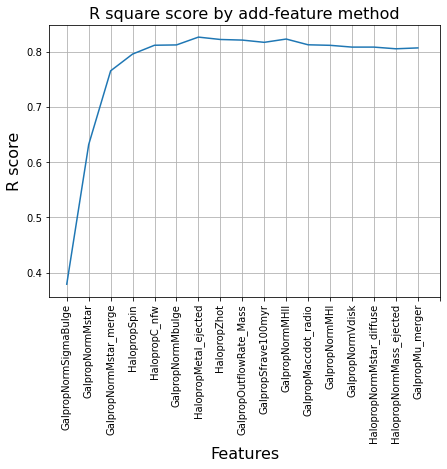

Elapsed time to run RF func on Ellipticals: 762.190 seconds


In [12]:
# Note: It takes about ~12 min to run this block of code on ellipticals
start_time = time.time()

ellipticals_RF_results = functions.target_predicting_RF_function(X_ellipticals, y_ellipticals)

elapsed_time = time.time() - start_time

print(f"Elapsed time to run RF func on Ellipticals: {elapsed_time:.3f} seconds")

#### The most important features for Elliptical galaxies are:
     1. GalpropNormSigmaBulge 0.3789379492782892
	 2. GalpropNormMstar 0.631757029671015
	 3. GalpropNormMstar_merge 0.7652099704860734
	 4. HalopropSpin 0.7955678873644985
	 5. HalopropC_nfw 0.8115313899592044
	 6. GalpropNormMbulge 0.8120989883559749
	 7. HalopropMetal_ejected 0.8262629080067674
	 8. HalopropZhot 0.8219497719044462
	 9. GalpropOutflowRate_Mass 0.8208638284612834
	 10. GalpropSfrave100myr 0.8167890600318248
	 11. GalpropNormMHII 0.822752879811922

In [19]:
ellipticals_RF_results[4]

feature_number                   features  r_sq_score
0                1      GalpropNormSigmaBulge    0.378938
1                2           GalpropNormMstar    0.631757
2                3     GalpropNormMstar_merge    0.765210
3                4               HalopropSpin    0.795568
4                5              HalopropC_nfw    0.811531
5                6          GalpropNormMbulge    0.812099
6                7      HalopropMetal_ejected    0.826263
7                8               HalopropZhot    0.821950
8                9    GalpropOutflowRate_Mass    0.820864
9               10        GalpropSfrave100myr    0.816789
10              11            GalpropNormMHII    0.822753
11              12       GalpropMaccdot_radio    0.812351
12              13             GalpropNormMHI    0.811386
13              14           GalpropNormVdisk    0.808163
14              15  HalopropNormMstar_diffuse    0.808165
15              16   HalopropNormMass_ejected    0.805113
16              17           GalpropMu_merger    0.806705

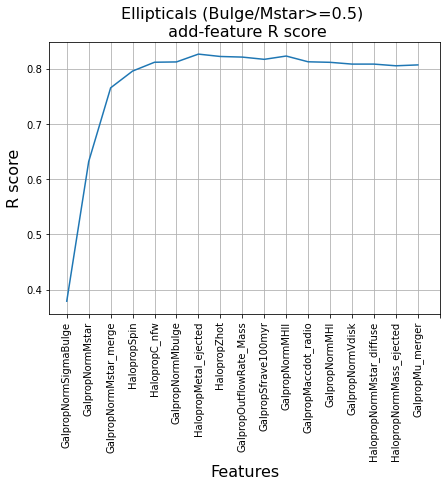

In [21]:
fig_add_feature_ellipticals=ellipticals_RF_results[4].plot(x='features', y='r_sq_score', 
                                                     rot=90, figsize=(7,5), use_index=True,
                                                     legend=False, grid=True, 
                                                     xticks=range(0,18))
fig_add_feature_ellipticals.set_title(label= 'Ellipticals (Bulge/Mstar>=0.5) \n add-feature R score',fontsize=16)
fig_add_feature_ellipticals.set_xlabel('Features',fontsize=16)
fig_add_feature_ellipticals.set_ylabel('R score',fontsize=16)

# fig_add_feature_ellipticals.get_figure().savefig('Ellipticals R score by add-feature method.jpg', dpi=500)

plt.show()

In [22]:
# ellipticals_RF_results[4].to_csv('Ellipticals Max r scores by add column method.csv', index=False)

In [23]:
# ellipticals = pd.read_csv('Ellipticals Max r scores by add column method.csv')

In [25]:
fig_ellipticals = ellipticals_RF_results[1]
# fig_ellipticals.savefig('Ellipticals RF Prediction_vs_True.jpeg', dpi=500)
plt.show()

In [26]:
fig_builtin_imp_ellipticals = ellipticals_RF_results[2]
# fig_builtin_imp_ellipticals.savefig('Ellipticals Built-in Feature Ranking.jpeg', dpi=500)
plt.show()

## <font color='purple'> <a id =2> </a> <br>Disk Galaxies: B/Mstar <=0.15

In [13]:
# Looking at the histogram, define disk galaxies to be the ones with bulge/mstar<=0.15
df_disks = df_normalized_31[df_normalized_31['BulgeMstar_ratio']<=0.15]

In [14]:
# df_disks.to_csv('Disks Dataset_as defined in notebook v13', index=False)

In [15]:
df_disks.shape

(15717, 33)

In [16]:
X_disks = df_disks.drop(columns=['GalpropNormHalfRadius', 'BulgeMstar_ratio'])


y_disks = df_disks.loc[:,'GalpropNormHalfRadius']

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params, best score: 0.9881 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}
RF Accuracy: 0.99 (+/- 0.00)


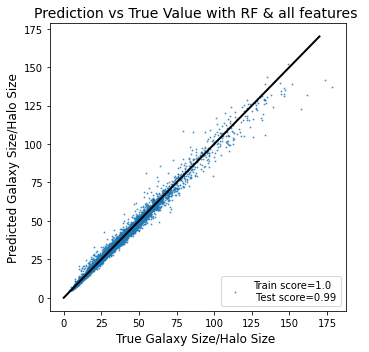

Elapsed time to compute the importances: 0.067 seconds
Elapsed time to compute the importances: 61.907 seconds


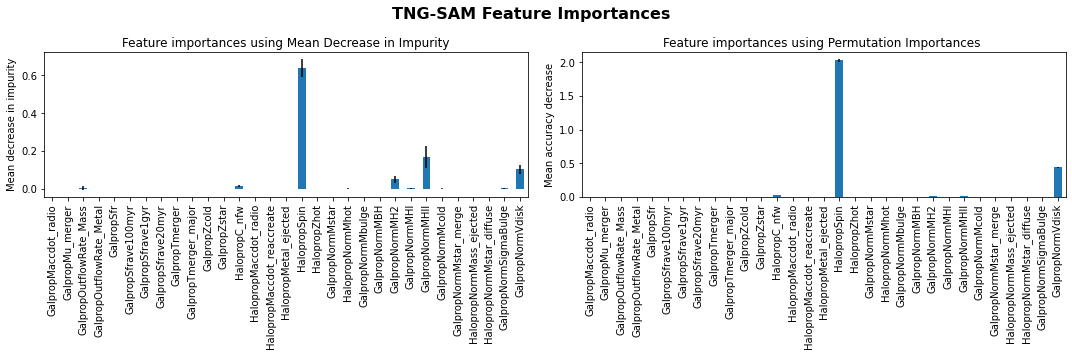

  0%|                                                    | 0/31 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/31 [00:01<00:37,  1.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▊                                         | 2/31 [00:04<01:05,  2.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▎                                       | 3/31 [00:06<01:07,  2.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▋                                      | 4/31 [00:09<01:06,  2.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|███████                                     | 5/31 [00:11<01:05,  2.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▌                                   | 6/31 [00:14<01:03,  2.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|█████████▉                                  | 7/31 [00:16<00:59,  2.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▎                                | 8/31 [00:19<00:57,  2.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▊                               | 9/31 [00:21<00:52,  2.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|█████████████▊                             | 10/31 [00:23<00:44,  2.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▎                           | 11/31 [00:25<00:45,  2.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▋                          | 12/31 [00:28<00:45,  2.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████                         | 13/31 [00:31<00:44,  2.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▍                       | 14/31 [00:32<00:34,  2.02s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 15/31 [00:34<00:35,  2.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 16/31 [00:37<00:35,  2.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▌                   | 17/31 [00:39<00:33,  2.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▉                  | 18/31 [00:42<00:32,  2.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████▎                | 19/31 [00:45<00:30,  2.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▋               | 20/31 [00:47<00:26,  2.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 21/31 [00:50<00:24,  2.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▌            | 22/31 [00:50<00:17,  1.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▉           | 23/31 [00:53<00:16,  2.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|█████████████████████████████████▎         | 24/31 [00:55<00:15,  2.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▋        | 25/31 [00:58<00:13,  2.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████       | 26/31 [01:00<00:11,  2.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▍     | 27/31 [01:03<00:09,  2.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▊    | 28/31 [01:05<00:07,  2.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▏  | 29/31 [01:07<00:04,  2.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 30/31 [01:09<00:02,  2.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 31/31 [01:11<00:00,  2.31s/it]


1. iteration: 
	 1 HalopropSpin 0.7156237779252143


  0%|                                                    | 0/30 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/30 [00:04<02:19,  4.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|██▉                                         | 2/30 [00:09<02:08,  4.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▍                                       | 3/30 [00:14<02:06,  4.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▊                                      | 4/30 [00:17<01:52,  4.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▎                                    | 5/30 [00:22<01:52,  4.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 6/30 [00:27<01:51,  4.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████▎                                 | 7/30 [00:31<01:44,  4.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|███████████▋                                | 8/30 [00:36<01:37,  4.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████▏                              | 9/30 [00:39<01:28,  4.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▎                            | 10/30 [00:43<01:19,  3.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 37%|███████████████▊                           | 11/30 [00:47<01:15,  3.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▏                         | 12/30 [00:51<01:13,  4.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▋                        | 13/30 [00:56<01:11,  4.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████                       | 14/30 [01:00<01:10,  4.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 15/30 [01:05<01:06,  4.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▉                    | 16/30 [01:09<01:01,  4.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▎                  | 17/30 [01:14<00:59,  4.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 18/30 [01:19<00:54,  4.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████▏               | 19/30 [01:23<00:50,  4.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 20/30 [01:28<00:45,  4.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|██████████████████████████████             | 21/30 [01:33<00:41,  4.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▌           | 22/30 [01:37<00:36,  4.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|████████████████████████████████▉          | 23/30 [01:42<00:32,  4.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 24/30 [01:47<00:28,  4.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▊       | 25/30 [01:52<00:24,  4.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▎     | 26/30 [01:56<00:18,  4.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▋    | 27/30 [02:01<00:14,  4.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|████████████████████████████████████████▏  | 28/30 [02:05<00:09,  4.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 29/30 [02:10<00:04,  4.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 30/30 [02:14<00:00,  4.49s/it]


2. iteration: 
	 1 HalopropSpin 0.7156237779252143
	 2 GalpropNormVdisk 0.9781633854842738


  0%|                                                    | 0/29 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▌                                          | 1/29 [00:05<02:47,  5.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███                                         | 2/29 [00:12<02:45,  6.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▌                                       | 3/29 [00:18<02:40,  6.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████                                      | 4/29 [00:24<02:34,  6.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▌                                    | 5/29 [00:30<02:28,  6.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████                                   | 6/29 [00:36<02:16,  5.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▌                                 | 7/29 [00:42<02:12,  6.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▏                               | 8/29 [00:48<02:08,  6.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▋                              | 9/29 [00:54<02:01,  6.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 34%|██████████████▊                            | 10/29 [00:59<01:50,  5.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▎                          | 11/29 [01:06<01:46,  5.93s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▊                         | 12/29 [01:12<01:42,  6.02s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▎                       | 13/29 [01:18<01:36,  6.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 14/29 [01:24<01:30,  6.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 15/29 [01:30<01:25,  6.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▋                   | 16/29 [01:37<01:20,  6.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▏                 | 17/29 [01:43<01:14,  6.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▋                | 18/29 [01:49<01:08,  6.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 66%|████████████████████████████▏              | 19/29 [01:55<01:02,  6.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▋             | 20/29 [02:02<00:56,  6.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|███████████████████████████████▏           | 21/29 [02:08<00:49,  6.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▌          | 22/29 [02:14<00:43,  6.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|██████████████████████████████████         | 23/29 [02:20<00:37,  6.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▌       | 24/29 [02:26<00:31,  6.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|█████████████████████████████████████      | 25/29 [02:33<00:25,  6.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▌    | 26/29 [02:39<00:18,  6.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|████████████████████████████████████████   | 27/29 [02:45<00:12,  6.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 28/29 [02:51<00:06,  6.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 29/29 [02:58<00:00,  6.14s/it]


3. iteration: 
	 1 HalopropSpin 0.7156237779252143
	 2 GalpropNormVdisk 0.9781633854842738
	 3 GalpropNormMHI 0.9822750703216236


  0%|                                                    | 0/28 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▌                                          | 1/28 [00:07<03:30,  7.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███▏                                        | 2/28 [00:15<03:27,  7.99s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▋                                       | 3/28 [00:24<03:29,  8.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████▎                                     | 4/28 [00:33<03:25,  8.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|███████▊                                    | 5/28 [00:42<03:20,  8.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████▍                                  | 6/28 [00:51<03:13,  8.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 7/28 [00:58<02:55,  8.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▌                               | 8/28 [01:07<02:50,  8.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|██████████████▏                             | 9/28 [01:15<02:37,  8.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▎                           | 10/28 [01:22<02:22,  7.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▉                          | 11/28 [01:31<02:19,  8.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▍                        | 12/28 [01:40<02:14,  8.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▉                       | 13/28 [01:48<02:04,  8.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 14/28 [01:56<01:54,  8.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████                    | 15/28 [02:05<01:49,  8.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▌                  | 16/28 [02:14<01:42,  8.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████                 | 17/28 [02:23<01:35,  8.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▋               | 18/28 [02:32<01:27,  8.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 19/28 [02:40<01:16,  8.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▋            | 20/28 [02:49<01:09,  8.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 21/28 [02:58<01:01,  8.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|█████████████████████████████████▊         | 22/28 [03:06<00:52,  8.77s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▎       | 23/28 [03:14<00:42,  8.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|████████████████████████████████████▊      | 24/28 [03:22<00:33,  8.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▍    | 25/28 [03:31<00:25,  8.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|███████████████████████████████████████▉   | 26/28 [03:41<00:17,  8.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▍ | 27/28 [03:49<00:08,  8.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 28/28 [03:58<00:00,  8.53s/it]


4. iteration: 
	 1 HalopropSpin 0.7156237779252143
	 2 GalpropNormVdisk 0.9781633854842738
	 3 GalpropNormMHI 0.9822750703216236
	 4 HalopropC_nfw 0.9856164776408033


  0%|                                                    | 0/27 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▋                                          | 1/27 [00:10<04:38, 10.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███▎                                        | 2/27 [00:20<04:13, 10.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▉                                       | 3/27 [00:31<04:10, 10.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▌                                     | 4/27 [00:42<04:03, 10.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▏                                   | 5/27 [00:52<03:53, 10.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▊                                  | 6/27 [01:03<03:45, 10.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▍                                | 7/27 [01:14<03:35, 10.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████                               | 8/27 [01:25<03:24, 10.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▋                             | 9/27 [01:35<03:12, 10.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 37%|███████████████▉                           | 10/27 [01:44<02:51, 10.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▌                         | 11/27 [01:55<02:44, 10.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|███████████████████                        | 12/27 [02:06<02:36, 10.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▋                      | 13/27 [02:16<02:27, 10.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▎                    | 14/27 [02:27<02:17, 10.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|███████████████████████▉                   | 15/27 [02:38<02:08, 10.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▍                 | 16/27 [02:49<01:57, 10.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████                | 17/27 [03:00<01:47, 10.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 18/27 [03:11<01:37, 10.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|██████████████████████████████▎            | 19/27 [03:22<01:26, 10.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▊           | 20/27 [03:32<01:15, 10.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 78%|█████████████████████████████████▍         | 21/27 [03:43<01:04, 10.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|███████████████████████████████████        | 22/27 [03:54<00:54, 10.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▋      | 23/27 [04:05<00:43, 10.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▏    | 24/27 [04:16<00:32, 10.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|███████████████████████████████████████▊   | 25/27 [04:27<00:21, 10.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▍ | 26/27 [04:38<00:10, 10.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 27/27 [04:48<00:00, 10.70s/it]


5. iteration: 
	 1 HalopropSpin 0.7156237779252143
	 2 GalpropNormVdisk 0.9781633854842738
	 3 GalpropNormMHI 0.9822750703216236
	 4 HalopropC_nfw 0.9856164776408033
	 5 GalpropNormMbulge 0.987177190976578


  0%|                                                    | 0/26 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▋                                          | 1/26 [00:12<05:17, 12.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  8%|███▍                                        | 2/26 [00:25<05:08, 12.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████                                       | 3/26 [00:38<04:54, 12.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▊                                     | 4/26 [00:51<04:40, 12.75s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▍                                   | 5/26 [01:03<04:27, 12.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████▏                                 | 6/26 [01:14<03:59, 11.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|███████████▊                                | 7/26 [01:27<03:52, 12.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▌                              | 8/26 [01:39<03:43, 12.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.019, test=-0.003) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.018, test=-0.002) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.027, test=-0.008) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.031, test=-0.019) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.017, test=-0.005) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.068, test=-0.014) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.074, test=-0.011) total time=   0.4s
[CV 2/

 35%|███████████████▏                            | 9/26 [01:52<03:31, 12.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▌                          | 10/26 [02:04<03:16, 12.28s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████▏                        | 11/26 [02:17<03:06, 12.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▊                       | 12/26 [02:29<02:55, 12.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 13/26 [02:42<02:43, 12.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████▏                   | 14/26 [02:52<02:22, 11.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▊                  | 15/26 [03:05<02:13, 12.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.023, test=-0.010) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.029, test=-0.020) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.029, test=-0.017) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.019, test=-0.003) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.018, test=-0.002) total time=   0.5s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.457, test=-0.228) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.468, test=-0.299) total time=   1.2s
[

 62%|██████████████████████████▍                | 16/26 [03:18<02:03, 12.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.021, test=-0.001) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.027, test=-0.013) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.028, test=-0.009) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.019, test=-0.004) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.454, test=-0.311) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.460, test=-0.259) total time=   0.8s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.296, test=0.235) total time=   0.2s
[CV 1/

 65%|████████████████████████████               | 17/26 [03:31<01:52, 12.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▊             | 18/26 [03:44<01:40, 12.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.021, test=0.000) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.021, test=-0.002) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.028, test=-0.017) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.028, test=-0.009) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.017, test=-0.004) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.078, test=-0.015) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.446, test=-0.268) total time=   0.3s
[CV 2

 73%|███████████████████████████████▍           | 19/26 [03:56<01:28, 12.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.028, test=-0.019) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.026, test=-0.014) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.027, test=-0.009) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.017, test=-0.004) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.070, test=-0.010) total time=   0.8s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.295, test=0.233) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.295, test=0.236) total time=   0.5s
[CV 2/3] E

[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.023, test=-0.010) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.029, test=-0.017) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.027, test=-0.013) total time=   0.5s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.019, test=-0.002) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.080, test=-0.014) total time=   0.7s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.464, test=-0.254) total time=   1.3s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.306, test=0.221) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_est

 77%|█████████████████████████████████          | 20/26 [04:09<01:16, 12.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▋        | 21/26 [04:22<01:03, 12.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.026, test=-0.008) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.028, test=-0.009) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.030, test=-0.019) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.017, test=-0.004) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.079, test=-0.014) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.067, test=-0.013) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.464, test=-0.303) total time=   0.7s
[CV 2/

[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.993, test=0.979) total time=   2.4s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.972, test=0.963) total time=   0.7s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.992, test=0.983) total time=   1.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.996, test=0.984) total time=   1.6s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.968, test=0.960) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.992, test=0.984) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.993, test=0.984) total time=   2.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimat

[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.022, test=-0.013) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.019, test=-0.003) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.030, test=-0.017) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.028, test=-0.016) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.018, test=-0.004) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.071, test=-0.014) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.070, test=-0.013) total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_est

 85%|████████████████████████████████████▍      | 22/26 [04:35<00:51, 12.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|██████████████████████████████████████     | 23/26 [04:48<00:38, 12.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 92%|███████████████████████████████████████▋   | 24/26 [05:01<00:25, 12.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▎ | 25/26 [05:14<00:12, 12.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 26/26 [05:27<00:00, 12.58s/it]


6. iteration: 
	 1 HalopropSpin 0.7156237779252143
	 2 GalpropNormVdisk 0.9781633854842738
	 3 GalpropNormMHI 0.9822750703216236
	 4 HalopropC_nfw 0.9856164776408033
	 5 GalpropNormMbulge 0.987177190976578
	 6 GalpropNormMH2 0.9884772030366187


  0%|                                                    | 0/25 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▊                                          | 1/25 [00:14<05:46, 14.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  8%|███▌                                        | 2/25 [00:29<05:35, 14.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▎                                      | 3/25 [00:43<05:22, 14.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|███████                                     | 4/25 [00:58<05:08, 14.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 5/25 [01:13<04:53, 14.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▌                                 | 6/25 [01:28<04:39, 14.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▎                               | 7/25 [01:42<04:24, 14.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|██████████████                              | 8/25 [01:57<04:09, 14.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▊                            | 9/25 [02:11<03:53, 14.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▏                         | 10/25 [02:23<03:23, 13.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|██████████████████▉                        | 11/25 [02:37<03:14, 13.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▋                      | 12/25 [02:49<02:53, 13.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▎                    | 13/25 [03:04<02:44, 13.74s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████                   | 14/25 [03:19<02:34, 14.02s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 15/25 [03:33<02:22, 14.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▌               | 16/25 [03:48<02:09, 14.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 17/25 [04:03<01:55, 14.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|██████████████████████████████▉            | 18/25 [04:17<01:41, 14.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▋          | 19/25 [04:32<01:27, 14.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 20/25 [04:47<01:13, 14.64s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████       | 21/25 [05:02<00:58, 14.64s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▊     | 22/25 [05:16<00:44, 14.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 92%|███████████████████████████████████████▌   | 23/25 [05:31<00:29, 14.74s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▎ | 24/25 [05:46<00:14, 14.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 25/25 [06:01<00:00, 14.44s/it]


7. iteration: 
	 1 HalopropSpin 0.7156237779252143
	 2 GalpropNormVdisk 0.9781633854842738
	 3 GalpropNormMHI 0.9822750703216236
	 4 HalopropC_nfw 0.9856164776408033
	 5 GalpropNormMbulge 0.987177190976578
	 6 GalpropNormMH2 0.9884772030366187
	 7 GalpropNormMstar 0.9890946134427324


  0%|                                                    | 0/24 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▊                                          | 1/24 [00:16<06:13, 16.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  8%|███▋                                        | 2/24 [00:32<06:01, 16.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▌                                      | 3/24 [00:46<05:18, 15.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▎                                    | 4/24 [01:03<05:14, 15.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████▏                                  | 5/24 [01:19<05:06, 16.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 6/24 [01:36<04:53, 16.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▊                               | 7/24 [01:53<04:39, 16.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▋                             | 8/24 [02:09<04:23, 16.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▌                           | 9/24 [02:26<04:06, 16.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|█████████████████▉                         | 10/24 [02:41<03:46, 16.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▋                       | 11/24 [02:58<03:33, 16.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 12/24 [03:15<03:17, 16.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████▎                   | 13/24 [03:31<03:00, 16.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|█████████████████████████                  | 14/24 [03:48<02:44, 16.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▉                | 15/24 [04:04<02:28, 16.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 16/24 [04:21<02:12, 16.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▍            | 17/24 [04:38<01:56, 16.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 18/24 [04:54<01:39, 16.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|██████████████████████████████████         | 19/24 [05:11<01:23, 16.64s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▊       | 20/24 [05:28<01:06, 16.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▋     | 21/24 [05:44<00:49, 16.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 92%|███████████████████████████████████████▍   | 22/24 [06:01<00:33, 16.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▏ | 23/24 [06:17<00:16, 16.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 24/24 [06:34<00:00, 16.44s/it]


8. iteration: 
	 1 HalopropSpin 0.7156237779252143
	 2 GalpropNormVdisk 0.9781633854842738
	 3 GalpropNormMHI 0.9822750703216236
	 4 HalopropC_nfw 0.9856164776408033
	 5 GalpropNormMbulge 0.987177190976578
	 6 GalpropNormMH2 0.9884772030366187
	 7 GalpropNormMstar 0.9890946134427324
	 8 GalpropNormSigmaBulge 0.9895167061164254


  0%|                                                    | 0/23 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▉                                          | 1/23 [00:18<06:45, 18.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|███▊                                        | 2/23 [00:37<06:29, 18.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▋                                      | 3/23 [00:55<06:11, 18.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▋                                    | 4/23 [01:14<05:53, 18.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▌                                  | 5/23 [01:33<05:35, 18.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▍                                | 6/23 [01:51<05:17, 18.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████▍                              | 7/23 [02:10<04:58, 18.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▎                            | 8/23 [02:29<04:40, 18.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|█████████████████▏                          | 9/23 [02:47<04:19, 18.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▋                        | 10/23 [03:05<03:57, 18.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▌                      | 11/23 [03:23<03:41, 18.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▍                    | 12/23 [03:42<03:23, 18.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▎                  | 13/23 [04:00<03:04, 18.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████▏                | 14/23 [04:19<02:46, 18.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|████████████████████████████               | 15/23 [04:34<02:20, 17.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|█████████████████████████████▉             | 16/23 [04:53<02:05, 17.96s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▊           | 17/23 [05:12<01:49, 18.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 78%|█████████████████████████████████▋         | 18/23 [05:31<01:31, 18.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▌       | 19/23 [05:50<01:13, 18.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▍     | 20/23 [06:08<00:55, 18.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|███████████████████████████████████████▎   | 21/23 [06:27<00:37, 18.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▏ | 22/23 [06:46<00:18, 18.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 23/23 [07:04<00:00, 18.46s/it]


9. iteration: 
	 1 HalopropSpin 0.7156237779252143
	 2 GalpropNormVdisk 0.9781633854842738
	 3 GalpropNormMHI 0.9822750703216236
	 4 HalopropC_nfw 0.9856164776408033
	 5 GalpropNormMbulge 0.987177190976578
	 6 GalpropNormMH2 0.9884772030366187
	 7 GalpropNormMstar 0.9890946134427324
	 8 GalpropNormSigmaBulge 0.9895167061164254
	 9 GalpropZcold 0.9895363113460142


  0%|                                                    | 0/22 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  5%|██                                          | 1/22 [00:20<07:06, 20.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|████                                        | 2/22 [00:41<06:53, 20.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████                                      | 3/22 [01:01<06:32, 20.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|████████                                    | 4/22 [01:22<06:15, 20.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████                                  | 5/22 [01:43<05:53, 20.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|████████████                                | 6/22 [02:01<05:15, 19.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|██████████████                              | 7/22 [02:22<05:00, 20.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|████████████████                            | 8/22 [02:42<04:43, 20.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|██████████████████                          | 9/22 [03:03<04:23, 20.28s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▌                       | 10/22 [03:22<04:01, 20.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 11/22 [03:43<03:42, 20.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▍                   | 12/22 [04:00<03:11, 19.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▍                 | 13/22 [04:20<02:56, 19.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▎               | 14/22 [04:37<02:30, 18.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▎             | 15/22 [04:58<02:16, 19.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▎           | 16/22 [05:19<01:59, 19.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|█████████████████████████████████▏         | 17/22 [05:39<01:40, 20.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▏       | 18/22 [06:00<01:20, 20.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|█████████████████████████████████████▏     | 19/22 [06:21<01:01, 20.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|███████████████████████████████████████    | 20/22 [06:43<00:41, 20.93s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 95%|█████████████████████████████████████████  | 21/22 [07:04<00:21, 21.02s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 22/22 [07:25<00:00, 20.24s/it]


10. iteration: 
	 1 HalopropSpin 0.7156237779252143
	 2 GalpropNormVdisk 0.9781633854842738
	 3 GalpropNormMHI 0.9822750703216236
	 4 HalopropC_nfw 0.9856164776408033
	 5 GalpropNormMbulge 0.987177190976578
	 6 GalpropNormMH2 0.9884772030366187
	 7 GalpropNormMstar 0.9890946134427324
	 8 GalpropNormSigmaBulge 0.9895167061164254
	 9 GalpropZcold 0.9895363113460142
	 10 HalopropNormMass_ejected 0.9893876681398585


  0%|                                                    | 0/21 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  5%|██                                          | 1/21 [00:22<07:32, 22.64s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▏                                       | 2/21 [00:45<07:12, 22.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████▎                                     | 3/21 [01:07<06:46, 22.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▍                                   | 4/21 [01:30<06:24, 22.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▍                                 | 5/21 [01:52<06:00, 22.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▌                               | 6/21 [02:15<05:37, 22.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▋                             | 7/21 [02:38<05:16, 22.64s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▊                           | 8/21 [03:00<04:53, 22.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▊                         | 9/21 [03:23<04:30, 22.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▍                      | 10/21 [03:45<04:06, 22.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▌                    | 11/21 [04:07<03:44, 22.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▌                  | 12/21 [04:30<03:21, 22.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▌                | 13/21 [04:52<02:59, 22.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 14/21 [05:15<02:37, 22.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▋            | 15/21 [05:38<02:15, 22.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▊          | 16/21 [06:01<01:53, 22.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▊        | 17/21 [06:23<01:30, 22.64s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|████████████████████████████████████▊      | 18/21 [06:46<01:08, 22.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▉    | 19/21 [07:09<00:45, 22.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 95%|████████████████████████████████████████▉  | 20/21 [07:31<00:22, 22.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 21/21 [07:54<00:00, 22.59s/it]


11. iteration: 
	 1 HalopropSpin 0.7156237779252143
	 2 GalpropNormVdisk 0.9781633854842738
	 3 GalpropNormMHI 0.9822750703216236
	 4 HalopropC_nfw 0.9856164776408033
	 5 GalpropNormMbulge 0.987177190976578
	 6 GalpropNormMH2 0.9884772030366187
	 7 GalpropNormMstar 0.9890946134427324
	 8 GalpropNormSigmaBulge 0.9895167061164254
	 9 GalpropZcold 0.9895363113460142
	 10 HalopropNormMass_ejected 0.9893876681398585
	 11 GalpropTmerger 0.9895722804415334


  0%|                                                    | 0/20 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  5%|██▏                                         | 1/20 [00:23<07:34, 23.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▍                                       | 2/20 [00:48<07:13, 24.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▌                                     | 3/20 [01:12<06:49, 24.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 4/20 [01:36<06:26, 24.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 5/20 [02:00<06:02, 24.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████▏                              | 6/20 [02:24<05:38, 24.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▍                            | 7/20 [02:49<05:14, 24.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▌                          | 8/20 [03:13<04:50, 24.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▊                        | 9/20 [03:36<04:23, 23.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 10/20 [04:01<04:00, 24.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▋                   | 11/20 [04:25<03:36, 24.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 12/20 [04:49<03:13, 24.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▉               | 13/20 [05:13<02:49, 24.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|██████████████████████████████             | 14/20 [05:38<02:25, 24.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 15/20 [06:02<02:01, 24.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 16/20 [06:26<01:37, 24.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▌      | 17/20 [06:51<01:12, 24.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▋    | 18/20 [07:11<00:46, 23.02s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.994, test=0.987) total time=   1.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.997, test=0.985) total time=   2.0s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.963, test=0.954) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.993, test=0.986) total time=   0.6s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.993, test=0.984) total time=   1.4s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.996, test=0.985) total time=   1.9s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.968, test=0.962) total time=   0.3s
[CV 1/3] END b

[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.994, test=0.987) total time=   2.9s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.997, test=0.986) total time=   2.9s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.973, test=0.963) total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.994, test=0.984) total time=   1.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.997, test=0.984) total time=   0.8s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.997, test=0.986) total time=   3.2s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.972, test=0.964) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_esti

 95%|████████████████████████████████████████▊  | 19/20 [07:35<00:23, 23.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 20/20 [07:59<00:00, 23.99s/it]


12. iteration: 
	 1 HalopropSpin 0.7156237779252143
	 2 GalpropNormVdisk 0.9781633854842738
	 3 GalpropNormMHI 0.9822750703216236
	 4 HalopropC_nfw 0.9856164776408033
	 5 GalpropNormMbulge 0.987177190976578
	 6 GalpropNormMH2 0.9884772030366187
	 7 GalpropNormMstar 0.9890946134427324
	 8 GalpropNormSigmaBulge 0.9895167061164254
	 9 GalpropZcold 0.9895363113460142
	 10 HalopropNormMass_ejected 0.9893876681398585
	 11 GalpropTmerger 0.9895722804415334
	 12 HalopropMaccdot_radio 0.9892825134594165


  0%|                                                    | 0/19 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  5%|██▎                                         | 1/19 [00:21<06:19, 21.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.972, test=0.962) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.969, test=0.962) total time=   2.0s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.997, test=0.988) total time=   0.9s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.998, test=0.987) total time=   3.9s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.971, test=0.968) total time=   1.0s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.994, test=0.986) total time=   1.7s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.997, test=0.987) total time=   2.3s
[CV 1/3] EN

[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.994, test=0.988) total time=   1.7s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.997, test=0.988) total time=   2.2s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.970, test=0.963) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.971, test=0.965) total time=   2.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.997, test=0.986) total time=   0.9s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.997, test=0.985) total time=   4.0s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.974, test=0.970) total time=   2.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_est

[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.970, test=0.964) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.994, test=0.986) total time=   0.7s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.994, test=0.985) total time=   3.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.997, test=0.988) total time=   3.5s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.973, test=0.970) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.994, test=0.987) total time=   0.7s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.994, test=0.987) total time=   1.8s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimat

 11%|████▋                                       | 2/19 [00:47<06:48, 24.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|██████▉                                     | 3/19 [01:13<06:38, 24.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.971, test=0.966) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.994, test=0.985) total time=   0.6s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.994, test=0.986) total time=   1.5s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.997, test=0.985) total time=   2.0s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.971, test=0.964) total time=   1.7s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.994, test=0.986) total time=   2.8s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.972, test=0.965) total time=   0.8s
[CV 2/3] END bo

 21%|█████████▎                                  | 4/19 [01:39<06:19, 25.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.997, test=0.987) total time=   2.3s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.969, test=0.960) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.994, test=0.986) total time=   0.7s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.995, test=0.987) total time=   3.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.997, test=0.988) total time=   3.4s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.971, test=0.965) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.995, test=0.986) total time=   0.7s
[CV 3/3] END

 26%|███████████▌                                | 5/19 [02:04<05:57, 25.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|█████████████▉                              | 6/19 [02:31<05:34, 25.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 37%|████████████████▏                           | 7/19 [02:56<05:09, 25.77s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████▌                         | 8/19 [03:22<04:43, 25.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████▊                       | 9/19 [03:47<04:14, 25.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▋                    | 10/19 [04:13<03:50, 25.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▉                  | 11/19 [04:39<03:25, 25.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████▏               | 12/19 [05:05<03:00, 25.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▍             | 13/19 [05:31<02:34, 25.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▋           | 14/19 [05:56<02:09, 25.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|█████████████████████████████████▉         | 15/19 [06:22<01:43, 25.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████▏      | 16/19 [06:48<01:17, 25.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▍    | 17/19 [07:14<00:51, 25.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 95%|████████████████████████████████████████▋  | 18/19 [07:40<00:25, 25.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 19/19 [08:06<00:00, 25.60s/it]


13. iteration: 
	 1 HalopropSpin 0.7156237779252143
	 2 GalpropNormVdisk 0.9781633854842738
	 3 GalpropNormMHI 0.9822750703216236
	 4 HalopropC_nfw 0.9856164776408033
	 5 GalpropNormMbulge 0.987177190976578
	 6 GalpropNormMH2 0.9884772030366187
	 7 GalpropNormMstar 0.9890946134427324
	 8 GalpropNormSigmaBulge 0.9895167061164254
	 9 GalpropZcold 0.9895363113460142
	 10 HalopropNormMass_ejected 0.9893876681398585
	 11 GalpropTmerger 0.9895722804415334
	 12 HalopropMaccdot_radio 0.9892825134594165
	 13 GalpropNormMcold 0.9890264638609582


  0%|                                                    | 0/18 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▍                                         | 1/18 [00:27<07:47, 27.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▉                                       | 2/18 [00:55<07:22, 27.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▎                                    | 3/18 [01:23<06:57, 27.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▊                                  | 4/18 [01:46<06:02, 25.89s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▏                               | 5/18 [02:14<05:46, 26.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▋                             | 6/18 [02:41<05:24, 27.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|█████████████████                           | 7/18 [03:09<05:00, 27.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|███████████████████▌                        | 8/18 [03:37<04:34, 27.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|██████████████████████                      | 9/18 [03:59<03:52, 25.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|███████████████████████▉                   | 10/18 [04:27<03:31, 26.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████▎                | 11/18 [04:55<03:08, 26.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 12/18 [05:23<02:43, 27.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|███████████████████████████████            | 13/18 [05:51<02:17, 27.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 78%|█████████████████████████████████▍         | 14/18 [06:19<01:49, 27.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▊       | 15/18 [06:46<01:22, 27.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▏    | 16/18 [07:15<00:55, 27.77s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▌  | 17/18 [07:42<00:27, 27.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 18/18 [08:10<00:00, 27.26s/it]


14. iteration: 
	 1 HalopropSpin 0.7156237779252143
	 2 GalpropNormVdisk 0.9781633854842738
	 3 GalpropNormMHI 0.9822750703216236
	 4 HalopropC_nfw 0.9856164776408033
	 5 GalpropNormMbulge 0.987177190976578
	 6 GalpropNormMH2 0.9884772030366187
	 7 GalpropNormMstar 0.9890946134427324
	 8 GalpropNormSigmaBulge 0.9895167061164254
	 9 GalpropZcold 0.9895363113460142
	 10 HalopropNormMass_ejected 0.9893876681398585
	 11 GalpropTmerger 0.9895722804415334
	 12 HalopropMaccdot_radio 0.9892825134594165
	 13 GalpropNormMcold 0.9890264638609582
	 14 GalpropMaccdot_radio 0.9890920591940885


  0%|                                                    | 0/17 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▌                                         | 1/17 [00:29<07:50, 29.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▏                                      | 2/17 [00:58<07:21, 29.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|███████▊                                    | 3/17 [01:28<06:52, 29.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▎                                 | 4/17 [01:57<06:22, 29.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▉                               | 5/17 [02:27<05:52, 29.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▌                            | 6/17 [02:56<05:22, 29.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|██████████████████                          | 7/17 [03:25<04:53, 29.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████▋                       | 8/17 [03:53<04:21, 29.02s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|███████████████████████▎                    | 9/17 [04:23<03:53, 29.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▎                 | 10/17 [04:52<03:24, 29.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▊               | 11/17 [05:21<02:55, 29.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▎            | 12/17 [05:51<02:26, 29.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▉          | 13/17 [06:20<01:57, 29.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▍       | 14/17 [06:50<01:27, 29.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▉     | 15/17 [07:19<00:58, 29.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▍  | 16/17 [07:49<00:29, 29.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 17/17 [08:18<00:00, 29.33s/it]


15. iteration: 
	 1 HalopropSpin 0.7156237779252143
	 2 GalpropNormVdisk 0.9781633854842738
	 3 GalpropNormMHI 0.9822750703216236
	 4 HalopropC_nfw 0.9856164776408033
	 5 GalpropNormMbulge 0.987177190976578
	 6 GalpropNormMH2 0.9884772030366187
	 7 GalpropNormMstar 0.9890946134427324
	 8 GalpropNormSigmaBulge 0.9895167061164254
	 9 GalpropZcold 0.9895363113460142
	 10 HalopropNormMass_ejected 0.9893876681398585
	 11 GalpropTmerger 0.9895722804415334
	 12 HalopropMaccdot_radio 0.9892825134594165
	 13 GalpropNormMcold 0.9890264638609582
	 14 GalpropMaccdot_radio 0.9890920591940885
	 15 GalpropOutflowRate_Mass 0.9890857215997354


  0%|                                                    | 0/16 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▊                                         | 1/16 [00:31<07:52, 31.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▌                                      | 2/16 [01:03<07:21, 31.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▎                                   | 3/16 [01:34<06:48, 31.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 4/16 [02:05<06:17, 31.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▊                              | 5/16 [02:37<05:45, 31.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▌                           | 6/16 [03:08<05:13, 31.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|███████████████████▎                        | 7/16 [03:38<04:39, 31.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|██████████████████████                      | 8/16 [04:10<04:09, 31.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████▊                   | 9/16 [04:41<03:38, 31.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▉                | 10/16 [05:12<03:07, 31.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▌             | 11/16 [05:44<02:36, 31.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 12/16 [06:15<02:05, 31.36s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▉        | 13/16 [06:47<01:33, 31.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▋     | 14/16 [07:18<01:02, 31.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▎  | 15/16 [07:49<00:31, 31.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 16/16 [08:21<00:00, 31.32s/it]


16. iteration: 
	 1 HalopropSpin 0.7156237779252143
	 2 GalpropNormVdisk 0.9781633854842738
	 3 GalpropNormMHI 0.9822750703216236
	 4 HalopropC_nfw 0.9856164776408033
	 5 GalpropNormMbulge 0.987177190976578
	 6 GalpropNormMH2 0.9884772030366187
	 7 GalpropNormMstar 0.9890946134427324
	 8 GalpropNormSigmaBulge 0.9895167061164254
	 9 GalpropZcold 0.9895363113460142
	 10 HalopropNormMass_ejected 0.9893876681398585
	 11 GalpropTmerger 0.9895722804415334
	 12 HalopropMaccdot_radio 0.9892825134594165
	 13 GalpropNormMcold 0.9890264638609582
	 14 GalpropMaccdot_radio 0.9890920591940885
	 15 GalpropOutflowRate_Mass 0.9890857215997354
	 16 GalpropSfr 0.9891091837603264


  0%|                                                    | 0/15 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|██▉                                         | 1/15 [00:33<07:44, 33.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▊                                      | 2/15 [01:06<07:11, 33.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 3/15 [01:39<06:37, 33.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|███████████▋                                | 4/15 [02:12<06:04, 33.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▋                             | 5/15 [02:45<05:31, 33.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▌                          | 6/15 [03:17<04:55, 32.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████▌                       | 7/15 [03:51<04:23, 32.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|███████████████████████▍                    | 8/15 [04:24<03:51, 33.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|██████████████████████████▍                 | 9/15 [04:57<03:18, 33.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 10/15 [05:30<02:45, 33.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▌           | 11/15 [06:04<02:12, 33.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 12/15 [06:37<01:39, 33.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▎     | 13/15 [07:10<01:06, 33.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|████████████████████████████████████████▏  | 14/15 [07:43<00:33, 33.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 15/15 [08:17<00:00, 33.14s/it]

17. iteration: 
	 1 HalopropSpin 0.7156237779252143
	 2 GalpropNormVdisk 0.9781633854842738
	 3 GalpropNormMHI 0.9822750703216236
	 4 HalopropC_nfw 0.9856164776408033
	 5 GalpropNormMbulge 0.987177190976578
	 6 GalpropNormMH2 0.9884772030366187
	 7 GalpropNormMstar 0.9890946134427324
	 8 GalpropNormSigmaBulge 0.9895167061164254
	 9 GalpropZcold 0.9895363113460142
	 10 HalopropNormMass_ejected 0.9893876681398585
	 11 GalpropTmerger 0.9895722804415334
	 12 HalopropMaccdot_radio 0.9892825134594165
	 13 GalpropNormMcold 0.9890264638609582
	 14 GalpropMaccdot_radio 0.9890920591940885
	 15 GalpropOutflowRate_Mass 0.9890857215997354
	 16 GalpropSfr 0.9891091837603264
	 17 GalpropSfrave1gyr 0.9889828039175624


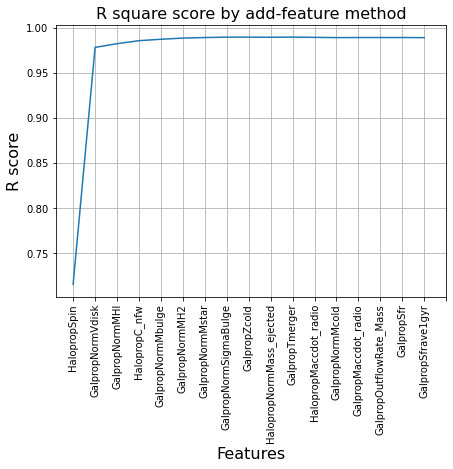

Elapsed time to run RF func on Disks: 6741.152 seconds
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.996, test=0.988) total time=   3.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.997, test=0.986) total time=   1.7s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.998, test=0.989) total time=   7.1s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.971, test=0.966) total time=   2.0s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.995, test=0.986) total time=   3.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.997, test=0.988) total time=   1.7s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.998, test=0.988) total time=   7.1s
[CV 1/3] END

[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.998, test=0.985) total time=   4.3s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.970, test=0.965) total time=   1.9s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.995, test=0.987) total time=   3.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.997, test=0.987) total time=   1.7s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.998, test=0.989) total time=   7.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.969, test=0.961) total time=   0.8s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.995, test=0.987) total time=   1.4s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estima

[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.997, test=0.989) total time=   1.7s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.998, test=0.990) total time=   4.3s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.970, test=0.967) total time=   1.9s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.995, test=0.983) total time=   1.3s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.995, test=0.989) total time=   6.8s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.973, test=0.964) total time=   1.9s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.995, test=0.989) total time=   3.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estima

[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.995, test=0.986) total time=   1.3s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.995, test=0.987) total time=   3.3s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.997, test=0.989) total time=   4.3s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.972, test=0.965) total time=   3.9s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.997, test=0.987) total time=   1.7s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.998, test=0.988) total time=   4.2s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.970, test=0.963) total time=   0.8s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estima

[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.995, test=0.985) total time=   6.2s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.969, test=0.958) total time=   3.9s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.997, test=0.987) total time=   1.7s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.998, test=0.989) total time=   4.1s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.971, test=0.966) total time=   1.9s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.995, test=0.988) total time=   1.3s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.995, test=0.987) total time=   6.8s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimat

[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.998, test=0.986) total time=   4.3s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.972, test=0.968) total time=   1.9s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.995, test=0.983) total time=   1.4s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.995, test=0.988) total time=   6.7s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.973, test=0.967) total time=   4.0s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.997, test=0.988) total time=   1.7s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.998, test=0.988) total time=   4.2s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estima

In [31]:
# this code takes ~2 hrs to run when the dataset is disk galaxies with ~15,000 entries
start_time = time.time()

disks_RF_results = functions.target_predicting_RF_function(X=X_disks, y=y_disks)

elapsed_time = time.time() - start_time

print(f"Elapsed time to run RF func on Disks: {elapsed_time:.3f} seconds")

#### The most important features for disk galaxies are:  
     1. HalopropSpin 0.7156237779252143
	 2. GalpropNormVdisk 0.9781633854842738
	 3. GalpropNormMHI 0.9822750703216236
	 4. HalopropC_nfw 0.9856164776408033
	 5. GalpropNormMbulge 0.987177190976578
	 6. GalpropNormMH2 0.9884772030366187
	 7. GalpropNormMstar 0.9890946134427324
	 8. GalpropNormSigmaBulge 0.9895167061164254
	 9. GalpropZcold 0.9895363113460142
	 10. HalopropNormMass_ejected 0.9893876681398585
	 11. GalpropTmerger 0.9895722804415334

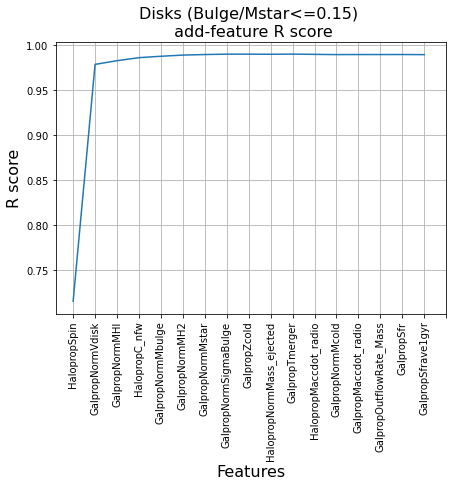

In [33]:
fig_add_feature_disks=disks_RF_results[4].plot(x='features', y='r_sq_score', rot=90, figsize=(7,5), use_index=True,
                    legend=False, grid=True, 
                    xticks=range(0,18))
fig_add_feature_disks.set_title(label= 'Disks (Bulge/Mstar<=0.15) \n add-feature R score',fontsize=16)
fig_add_feature_disks.set_xlabel('Features',fontsize=16)
fig_add_feature_disks.set_ylabel('R score',fontsize=16)

# fig_add_feature_disks.get_figure().savefig('Disks R score by add-feature method.jpg', dpi=500)

plt.show()

In [34]:
# disks_RF_results[4].to_csv('Disks Max r scores by add column method.csv', index=False)

In [35]:
# disks = pd.read_csv('Disks Max r scores by add column method.csv')

In [37]:
fig_disks = disks_RF_results[1]
# fig_disks.savefig('Disks RF Prediction_vs_True.jpeg', dpi=500)
plt.show()

In [38]:
fig_builtin_imp_disks = disks_RF_results[2]
# fig_builtin_imp_disks.savefig('Disks Built-in Feature Ranking.jpeg', dpi=500)
plt.show()

--------------------

## <font color='purple'> <a id =3> </a> <br>Bulgy Disk Galaxies: 0.15< B/Mstar <=0.3

In [8]:
# Looking at the histogram, define bulgy disk galaxies to be the ones with 0.15< bulge/mstar <=0.3
df_bulgy_disks = df_normalized_31.loc[(df_normalized_31.BulgeMstar_ratio>0.15) & (df_normalized_31.BulgeMstar_ratio<=0.3)]

In [9]:
df_bulgy_disks.shape

(12949, 33)

In [41]:
# df_bulgy_disks.to_csv('Bulgy Disks Dataset_as defined in notebook v13', index=False)

In [10]:
X_bulgy_disks = df_bulgy_disks.drop(columns=['GalpropNormHalfRadius', 'BulgeMstar_ratio'])


y_bulgy_disks = df_bulgy_disks.loc[:,'GalpropNormHalfRadius']

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params, best score: 0.9586 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}
RF Accuracy: 0.96 (+/- 0.03)


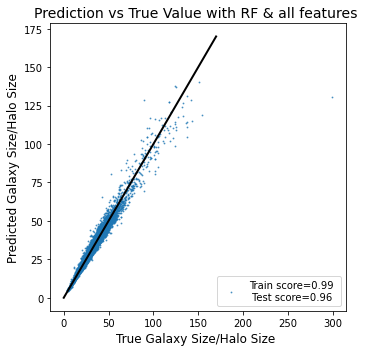

Elapsed time to compute the importances: 0.084 seconds
Elapsed time to compute the importances: 14.062 seconds


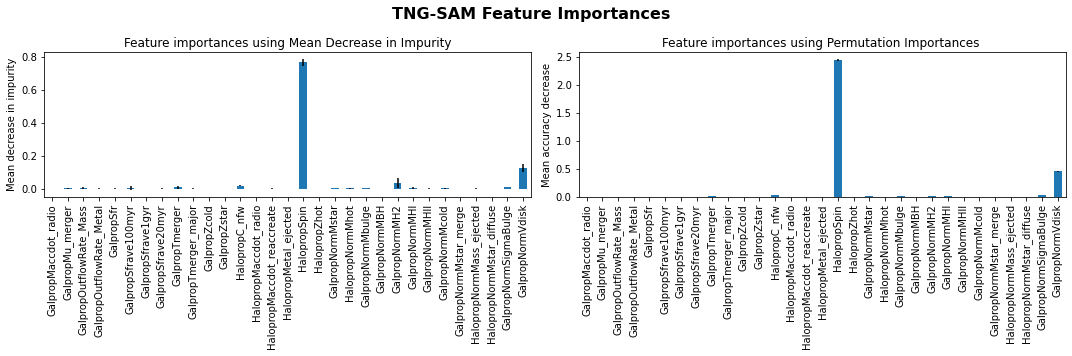

  0%|                                                    | 0/31 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/31 [00:01<00:34,  1.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▊                                         | 2/31 [00:03<00:55,  1.93s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▎                                       | 3/31 [00:05<00:57,  2.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▋                                      | 4/31 [00:08<00:58,  2.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|███████                                     | 5/31 [00:10<00:57,  2.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▌                                   | 6/31 [00:12<00:58,  2.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|█████████▉                                  | 7/31 [00:15<00:58,  2.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▎                                | 8/31 [00:18<00:58,  2.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▊                               | 9/31 [00:20<00:52,  2.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|█████████████▊                             | 10/31 [00:22<00:44,  2.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▎                           | 11/31 [00:24<00:42,  2.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▋                          | 12/31 [00:26<00:41,  2.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████                         | 13/31 [00:28<00:40,  2.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▍                       | 14/31 [00:30<00:33,  1.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 15/31 [00:32<00:33,  2.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 16/31 [00:34<00:32,  2.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▌                   | 17/31 [00:36<00:29,  2.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▉                  | 18/31 [00:39<00:27,  2.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████▎                | 19/31 [00:41<00:26,  2.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▋               | 20/31 [00:43<00:23,  2.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 21/31 [00:45<00:20,  2.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▌            | 22/31 [00:46<00:15,  1.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▉           | 23/31 [00:48<00:14,  1.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|█████████████████████████████████▎         | 24/31 [00:50<00:13,  1.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▋        | 25/31 [00:52<00:11,  1.93s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████       | 26/31 [00:54<00:09,  1.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▍     | 27/31 [00:56<00:08,  2.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▊    | 28/31 [00:58<00:06,  2.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▏  | 29/31 [01:00<00:04,  2.00s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 30/31 [01:02<00:02,  2.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 31/31 [01:04<00:00,  2.07s/it]


1. iteration: 
	 1 HalopropSpin 0.7087988636548416


  0%|                                                    | 0/30 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/30 [00:03<01:39,  3.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|██▉                                         | 2/30 [00:06<01:32,  3.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▍                                       | 3/30 [00:10<01:36,  3.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▊                                      | 4/30 [00:14<01:33,  3.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▎                                    | 5/30 [00:18<01:34,  3.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 6/30 [00:21<01:29,  3.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████▎                                 | 7/30 [00:25<01:24,  3.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|███████████▋                                | 8/30 [00:28<01:17,  3.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████▏                              | 9/30 [00:31<01:12,  3.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▎                            | 10/30 [00:34<01:06,  3.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 37%|███████████████▊                           | 11/30 [00:38<01:02,  3.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▏                         | 12/30 [00:41<01:01,  3.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▋                        | 13/30 [00:45<00:58,  3.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████                       | 14/30 [00:49<00:58,  3.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 15/30 [00:53<00:55,  3.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▉                    | 16/30 [00:56<00:51,  3.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▎                  | 17/30 [01:01<00:49,  3.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 18/30 [01:04<00:45,  3.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████▏               | 19/30 [01:09<00:44,  4.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 20/30 [01:13<00:39,  3.99s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.025, test=-0.017) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.039, test=-0.028) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.039, test=-0.019) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.023, test=-0.002) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.103, test=-0.021) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.467, test=-0.270) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.491, test=-0.237) total time=   0.9s
[C

 70%|██████████████████████████████             | 21/30 [01:16<00:33,  3.75s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.023, test=-0.011) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.036, test=-0.012) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.018, test=-0.007) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.022, test=-0.004) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.477, test=-0.258) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.489, test=-0.289) total time=   1.0s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.200, test=0.165) total time=   0.2s
[CV 1/

 73%|███████████████████████████████▌           | 22/30 [01:20<00:30,  3.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.018, test=0.002) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.037, test=-0.028) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.039, test=-0.027) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.039, test=-0.031) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.043, test=-0.037) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.044, test=-0.035) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.029, test=-0.007) total time=   0.2s
[CV 3

 77%|████████████████████████████████▉          | 23/30 [01:23<00:25,  3.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.022, test=-0.010) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.020, test=0.001) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.042, test=-0.031) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.025, test=-0.008) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.105, test=-0.023) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.102, test=-0.020) total time=   0.7s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.480, test=-0.246) total time=   1.0s
[CV 3/

 80%|██████████████████████████████████▍        | 24/30 [01:27<00:22,  3.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.019, test=0.001) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.035, test=-0.013) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.037, test=-0.016) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.042, test=-0.032) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.021, test=-0.005) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.102, test=-0.018) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.488, test=-0.293) total time=   0.7s
[CV 2

[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.025, test=-0.019) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.041, test=-0.035) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.041, test=-0.032) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.043, test=-0.035) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.023, test=-0.002) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.479, test=-0.312) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.477, test=-0.251) total time=   0.6s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_

 83%|███████████████████████████████████▊       | 25/30 [01:31<00:18,  3.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.023, test=-0.010) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.033, test=-0.012) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.041, test=-0.032) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.030, test=-0.007) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.088, test=-0.014) total time=   0.7s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.225, test=0.090) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.315, test=0.022) total time=   0.3s
[CV 1/3] EN

 87%|█████████████████████████████████████▎     | 26/30 [01:34<00:14,  3.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.025, test=-0.018) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.039, test=-0.020) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.023, test=-0.002) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.101, test=-0.027) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.087, test=-0.018) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.487, test=-0.248) total time=   0.6s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.210, test=0.148) total time=   0.1s
[CV 2/3]

 90%|██████████████████████████████████████▋    | 27/30 [01:38<00:11,  3.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|████████████████████████████████████████▏  | 28/30 [01:42<00:07,  3.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 29/30 [01:46<00:03,  3.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 30/30 [01:49<00:00,  3.64s/it]


2. iteration: 
	 1 HalopropSpin 0.7087988636548416
	 2 GalpropNormVdisk 0.9307436380539474


  0%|                                                    | 0/29 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▌                                          | 1/29 [00:04<02:17,  4.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███                                         | 2/29 [00:10<02:16,  5.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▌                                       | 3/29 [00:15<02:16,  5.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████                                      | 4/29 [00:21<02:14,  5.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▌                                    | 5/29 [00:26<02:08,  5.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████                                   | 6/29 [00:31<02:03,  5.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▌                                 | 7/29 [00:37<01:58,  5.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▏                               | 8/29 [00:41<01:47,  5.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▋                              | 9/29 [00:46<01:36,  4.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 34%|██████████████▊                            | 10/29 [00:50<01:31,  4.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▎                          | 11/29 [00:55<01:28,  4.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▊                         | 12/29 [01:01<01:24,  5.00s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▎                       | 13/29 [01:06<01:23,  5.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 14/29 [01:11<01:14,  4.96s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 15/29 [01:16<01:11,  5.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▋                   | 16/29 [01:21<01:06,  5.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▏                 | 17/29 [01:26<00:59,  4.93s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▋                | 18/29 [01:31<00:54,  4.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 66%|████████████████████████████▏              | 19/29 [01:36<00:49,  4.99s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▋             | 20/29 [01:40<00:43,  4.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|███████████████████████████████▏           | 21/29 [01:45<00:39,  4.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▌          | 22/29 [01:51<00:34,  4.99s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|██████████████████████████████████         | 23/29 [01:55<00:28,  4.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▌       | 24/29 [02:00<00:24,  4.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|█████████████████████████████████████      | 25/29 [02:05<00:20,  5.02s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▌    | 26/29 [02:11<00:15,  5.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.924, test=0.772) total time=   1.2s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.838, test=0.812) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.852, test=0.815) total time=   0.7s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.932, test=0.820) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.941, test=0.800) total time=   0.8s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.840, test=0.828) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.894, test=0.804) total time=   0.2s
[CV 2/3] EN

 93%|████████████████████████████████████████   | 27/29 [02:16<00:10,  5.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.942, test=0.801) total time=   0.9s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.840, test=0.829) total time=   0.7s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.935, test=0.807) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.943, test=0.793) total time=   0.8s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.785, test=0.756) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.845, test=0.763) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.848, test=0.749) total time=   0.4s
[CV 2/3] EN

 97%|█████████████████████████████████████████▌ | 28/29 [02:21<00:05,  5.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.919, test=0.777) total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.839, test=0.839) total time=   0.9s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.940, test=0.796) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.935, test=0.824) total time=   1.4s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.842, test=0.823) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.891, test=0.823) total time=   0.6s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.938, test=0.809) total time=   0.8s
[CV 2/3]

[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.844, test=0.805) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.890, test=0.824) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.892, test=0.826) total time=   0.6s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.938, test=0.810) total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.784, test=0.769) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.847, test=0.757) total time=   0.7s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.918, test=0.746) total time=   0.9s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators

100%|███████████████████████████████████████████| 29/29 [02:26<00:00,  5.06s/it]


3. iteration: 
	 1 HalopropSpin 0.7087988636548416
	 2 GalpropNormVdisk 0.9307436380539474
	 3 GalpropNormSigmaBulge 0.9434081457653855


  0%|                                                    | 0/28 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.844, test=0.806) total time=   0.7s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.937, test=0.806) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.938, test=0.812) total time=   1.3s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.787, test=0.759) total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.915, test=0.743) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.924, test=0.732) total time=   0.9s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.848, test=0.823) total time=   0.7s
[CV 1/3

  4%|█▌                                          | 1/28 [00:05<02:27,  5.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███▏                                        | 2/28 [00:10<02:17,  5.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.791, test=0.753) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.845, test=0.755) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.846, test=0.764) total time=   1.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.925, test=0.732) total time=   1.3s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.844, test=0.827) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.895, test=0.818) total time=   1.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.940, test=0.809) total time=   1.2s
[CV 2/3] E

[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.897, test=0.824) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.942, test=0.807) total time=   0.8s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.738, test=0.724) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.805, test=0.694) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.797, test=0.722) total time=   0.7s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.898, test=0.696) total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.737, test=0.706) total time=   0.6s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimato

 11%|████▋                                       | 3/28 [00:17<02:29,  5.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████▎                                     | 4/28 [00:23<02:21,  5.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.792, test=0.754) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.851, test=0.753) total time=   0.7s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.920, test=0.735) total time=   1.0s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.848, test=0.823) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.895, test=0.822) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.895, test=0.818) total time=   0.5s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.940, test=0.809) total time=   0.8s
[CV 3/3] END b

 18%|███████▊                                    | 5/28 [00:29<02:22,  6.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████▍                                  | 6/28 [00:36<02:19,  6.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 7/28 [00:43<02:13,  6.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▌                               | 8/28 [00:50<02:12,  6.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|██████████████▏                             | 9/28 [00:55<01:59,  6.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▎                           | 10/28 [01:01<01:52,  6.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▉                          | 11/28 [01:08<01:48,  6.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▍                        | 12/28 [01:15<01:43,  6.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▉                       | 13/28 [01:21<01:37,  6.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 14/28 [01:28<01:30,  6.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████                    | 15/28 [01:34<01:24,  6.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▌                  | 16/28 [01:40<01:15,  6.28s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████                 | 17/28 [01:47<01:10,  6.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▋               | 18/28 [01:53<01:04,  6.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 19/28 [02:00<00:58,  6.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▋            | 20/28 [02:06<00:51,  6.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 21/28 [02:11<00:42,  6.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|█████████████████████████████████▊         | 22/28 [02:18<00:37,  6.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▎       | 23/28 [02:25<00:31,  6.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|████████████████████████████████████▊      | 24/28 [02:31<00:26,  6.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▍    | 25/28 [02:38<00:19,  6.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|███████████████████████████████████████▉   | 26/28 [02:45<00:13,  6.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▍ | 27/28 [02:50<00:06,  6.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 28/28 [02:57<00:00,  6.34s/it]


4. iteration: 
	 1 HalopropSpin 0.7087988636548416
	 2 GalpropNormVdisk 0.9307436380539474
	 3 GalpropNormSigmaBulge 0.9434081457653855
	 4 HalopropC_nfw 0.9485673556946761


  0%|                                                    | 0/27 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▋                                          | 1/27 [00:08<03:36,  8.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███▎                                        | 2/27 [00:16<03:21,  8.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.966, test=0.918) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.961, test=0.935) total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.979, test=0.940) total time=   1.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.933, test=0.929) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.972, test=0.921) total time=   0.7s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.977, test=0.947) total time=   0.9s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.926, test=0.923) total time=   0.1s
[CV 3/3] END b

 11%|████▉                                       | 3/27 [00:24<03:16,  8.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▌                                     | 4/27 [00:32<03:07,  8.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▏                                   | 5/27 [00:40<02:56,  8.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▊                                  | 6/27 [00:46<02:36,  7.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▍                                | 7/27 [00:55<02:35,  7.75s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.984, test=0.914) total time=   1.1s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.925, test=0.923) total time=   0.9s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.965, test=0.950) total time=   1.4s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.932, test=0.923) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.961, test=0.942) total time=   1.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.977, test=0.938) total time=   1.4s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.936, test=0.895) total time=   1.0s
[CV 1/3] E

[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.963, test=0.945) total time=   1.8s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.985, test=0.914) total time=   1.6s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.930, test=0.928) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.959, test=0.945) total time=   1.5s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.975, test=0.939) total time=   1.5s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.930, test=0.926) total time=   1.0s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.968, test=0.916) total time=   1.6s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_esti

 30%|█████████████                               | 8/27 [01:04<02:34,  8.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.962, test=0.937) total time=   1.6s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.928, test=0.904) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.963, test=0.938) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.962, test=0.944) total time=   1.5s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.932, test=0.926) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.936, test=0.899) total time=   1.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.977, test=0.941) total time=   0.5s
[CV 1/3] END b

 33%|██████████████▋                             | 9/27 [01:12<02:29,  8.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.927, test=0.926) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.961, test=0.945) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.961, test=0.945) total time=   1.5s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.985, test=0.913) total time=   1.6s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.931, test=0.926) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.962, test=0.941) total time=   0.8s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.977, test=0.938) total time=   0.4s
[CV 2/3] END

 37%|███████████████▉                           | 10/27 [01:20<02:16,  8.01s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▌                         | 11/27 [01:28<02:09,  8.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.977, test=0.941) total time=   1.1s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.935, test=0.904) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.967, test=0.923) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.960, test=0.944) total time=   0.8s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.984, test=0.920) total time=   1.0s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.934, test=0.900) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.961, test=0.946) total time=   0.3s
[CV 1/3] END b

 44%|███████████████████                        | 12/27 [01:36<02:03,  8.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▋                      | 13/27 [01:44<01:53,  8.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.932, test=0.893) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.959, test=0.944) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.965, test=0.917) total time=   0.7s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.981, test=0.913) total time=   1.0s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.936, test=0.900) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.958, test=0.944) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.968, test=0.915) total time=   0.8s
[CV 2/3] END boo

 52%|██████████████████████▎                    | 14/27 [01:53<01:49,  8.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|███████████████████████▉                   | 15/27 [02:02<01:42,  8.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▍                 | 16/27 [02:11<01:33,  8.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████                | 17/27 [02:20<01:26,  8.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 18/27 [02:27<01:15,  8.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|██████████████████████████████▎            | 19/27 [02:36<01:08,  8.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▊           | 20/27 [02:44<00:58,  8.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 78%|█████████████████████████████████▍         | 21/27 [02:53<00:50,  8.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|███████████████████████████████████        | 22/27 [03:02<00:42,  8.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▋      | 23/27 [03:11<00:34,  8.75s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▏    | 24/27 [03:20<00:26,  8.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|███████████████████████████████████████▊   | 25/27 [03:26<00:16,  8.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▍ | 26/27 [03:34<00:08,  8.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 27/27 [03:43<00:00,  8.28s/it]


5. iteration: 
	 1 HalopropSpin 0.7087988636548416
	 2 GalpropNormVdisk 0.9307436380539474
	 3 GalpropNormSigmaBulge 0.9434081457653855
	 4 HalopropC_nfw 0.9485673556946761
	 5 GalpropNormMcold 0.9517989467085594


  0%|                                                    | 0/26 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▋                                          | 1/26 [00:10<04:14, 10.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  8%|███▍                                        | 2/26 [00:20<04:05, 10.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████                                       | 3/26 [00:30<03:57, 10.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▊                                     | 4/26 [00:42<03:55, 10.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▍                                   | 5/26 [00:52<03:41, 10.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████▏                                 | 6/26 [01:02<03:28, 10.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|███████████▊                                | 7/26 [01:13<03:18, 10.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▌                              | 8/26 [01:23<03:06, 10.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▏                            | 9/26 [01:34<03:00, 10.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▌                          | 10/26 [01:44<02:46, 10.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████▏                        | 11/26 [01:55<02:41, 10.75s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▊                       | 12/26 [02:06<02:30, 10.75s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 13/26 [02:17<02:18, 10.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████▏                   | 14/26 [02:26<02:01, 10.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.938, test=0.900) total time=   1.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.977, test=0.955) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.983, test=0.949) total time=   2.2s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.933, test=0.924) total time=   0.6s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.976, test=0.927) total time=   2.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.982, test=0.953) total time=   1.9s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.939, test=0.902) total time=   1.2s
[CV 1/3]

 58%|████████████████████████▊                  | 15/26 [02:36<01:52, 10.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.976, test=0.928) total time=   1.9s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.936, test=0.902) total time=   0.6s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.968, test=0.957) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.976, test=0.929) total time=   1.9s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.935, test=0.894) total time=   1.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.980, test=0.952) total time=   0.5s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.981, test=0.947) total time=   1.2s
[CV 1/3] EN

 62%|██████████████████████████▍                | 16/26 [02:45<01:39,  9.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.936, test=0.900) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.969, test=0.952) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.976, test=0.928) total time=   1.0s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.981, test=0.952) total time=   1.2s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.936, test=0.901) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.975, test=0.929) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.970, test=0.945) total time=   1.9s
[CV 3/3] END bo

 65%|████████████████████████████               | 17/26 [02:56<01:31, 10.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.982, test=0.954) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.982, test=0.953) total time=   2.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.936, test=0.900) total time=   0.6s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.969, test=0.953) total time=   1.0s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.982, test=0.952) total time=   1.2s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.931, test=0.915) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.930, test=0.928) total time=   1.2s
[CV 2/3] EN

 69%|█████████████████████████████▊             | 18/26 [03:07<01:22, 10.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.933, test=0.934) total time=   0.6s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.967, test=0.949) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.976, test=0.924) total time=   1.9s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.934, test=0.887) total time=   0.6s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.966, test=0.959) total time=   1.0s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.989, test=0.920) total time=   1.4s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.936, test=0.924) total time=   1.3s
[CV 3/3] END bo

[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.969, test=0.955) total time=   1.0s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.988, test=0.923) total time=   1.2s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.930, test=0.934) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.927, test=0.931) total time=   1.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.989, test=0.919) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.982, test=0.957) total time=   2.3s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.933, test=0.926) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estima

 73%|███████████████████████████████▍           | 19/26 [03:18<01:13, 10.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.979, test=0.949) total time=   0.5s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.990, test=0.920) total time=   1.3s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.932, test=0.929) total time=   1.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.981, test=0.950) total time=   0.5s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.989, test=0.927) total time=   1.2s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.930, test=0.928) total time=   0.6s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.970, test=0.943) total time=   1.0s
[CV 1/3] 

 77%|█████████████████████████████████          | 20/26 [03:28<01:02, 10.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▋        | 21/26 [03:38<00:52, 10.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▍      | 22/26 [03:49<00:41, 10.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.969, test=0.958) total time=   0.9s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.980, test=0.956) total time=   0.6s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.989, test=0.921) total time=   2.1s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.934, test=0.902) total time=   0.6s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.971, test=0.955) total time=   1.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.983, test=0.955) total time=   1.4s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.936, test=0.903) total time=   0.2s
[CV 1/3] EN

 88%|██████████████████████████████████████     | 23/26 [03:57<00:29,  9.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 92%|███████████████████████████████████████▋   | 24/26 [04:07<00:19,  9.99s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▎ | 25/26 [04:18<00:10, 10.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 26/26 [04:29<00:00, 10.36s/it]


6. iteration: 
	 1 HalopropSpin 0.7087988636548416
	 2 GalpropNormVdisk 0.9307436380539474
	 3 GalpropNormSigmaBulge 0.9434081457653855
	 4 HalopropC_nfw 0.9485673556946761
	 5 GalpropNormMcold 0.9517989467085594
	 6 GalpropTmerger 0.9556501465777094


  0%|                                                    | 0/25 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▊                                          | 1/25 [00:11<04:39, 11.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  8%|███▌                                        | 2/25 [00:24<04:41, 12.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▎                                      | 3/25 [00:36<04:26, 12.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|███████                                     | 4/25 [00:47<04:09, 11.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 5/25 [00:59<03:59, 11.96s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▌                                 | 6/25 [01:12<03:49, 12.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▎                               | 7/25 [01:24<03:37, 12.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|██████████████                              | 8/25 [01:35<03:18, 11.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▊                            | 9/25 [01:47<03:08, 11.77s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▏                         | 10/25 [01:59<02:58, 11.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|██████████████████▉                        | 11/25 [02:11<02:48, 12.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▋                      | 12/25 [02:23<02:37, 12.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▎                    | 13/25 [02:36<02:28, 12.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████                   | 14/25 [02:49<02:16, 12.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 15/25 [03:01<02:03, 12.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▌               | 16/25 [03:13<01:50, 12.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 17/25 [03:25<01:36, 12.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|██████████████████████████████▉            | 18/25 [03:37<01:25, 12.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▋          | 19/25 [03:50<01:13, 12.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 20/25 [04:02<01:01, 12.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████       | 21/25 [04:14<00:48, 12.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▊     | 22/25 [04:26<00:36, 12.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 92%|███████████████████████████████████████▌   | 23/25 [04:39<00:24, 12.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.978, test=0.922) total time=   0.5s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.979, test=0.922) total time=   1.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.980, test=0.956) total time=   0.6s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.990, test=0.922) total time=   2.5s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.938, test=0.903) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.970, test=0.958) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.972, test=0.957) total time=   2.9s
[CV 3/3] EN

 96%|█████████████████████████████████████████▎ | 24/25 [04:50<00:12, 12.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.933, test=0.930) total time=   1.5s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.973, test=0.962) total time=   2.4s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.934, test=0.895) total time=   0.7s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.973, test=0.955) total time=   0.6s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.972, test=0.963) total time=   2.6s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.932, test=0.927) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.970, test=0.965) total time=   0.5s
[CV 3/3] END boo

100%|███████████████████████████████████████████| 25/25 [05:00<00:00, 12.02s/it]


7. iteration: 
	 1 HalopropSpin 0.7087988636548416
	 2 GalpropNormVdisk 0.9307436380539474
	 3 GalpropNormSigmaBulge 0.9434081457653855
	 4 HalopropC_nfw 0.9485673556946761
	 5 GalpropNormMcold 0.9517989467085594
	 6 GalpropTmerger 0.9556501465777094
	 7 GalpropOutflowRate_Metal 0.956960962442182


  0%|                                                    | 0/24 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.983, test=0.958) total time=   2.6s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.931, test=0.930) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.969, test=0.956) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.970, test=0.958) total time=   2.5s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.982, test=0.957) total time=   2.3s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.927, test=0.929) total time=   0.7s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.972, test=0.956) total time=   1.5s
[CV 3/3] EN

[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.991, test=0.931) total time=   0.8s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.985, test=0.965) total time=   3.5s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.933, test=0.925) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.935, test=0.927) total time=   1.9s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.986, test=0.961) total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.992, test=0.942) total time=   3.5s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.937, test=0.896) total time=   1.9s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_es

  4%|█▊                                          | 1/24 [00:13<04:59, 13.00s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  8%|███▋                                        | 2/24 [00:26<04:54, 13.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▌                                      | 3/24 [00:40<04:46, 13.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.984, test=0.959) total time=   0.7s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.984, test=0.960) total time=   3.1s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.936, test=0.925) total time=   1.7s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.991, test=0.935) total time=   0.7s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.985, test=0.960) total time=   2.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.935, test=0.925) total time=   1.4s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.981, test=0.935) total time=   2.0s
[CV 1/3]

 17%|███████▎                                    | 4/24 [00:54<04:36, 13.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████▏                                  | 5/24 [01:08<04:20, 13.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.933, test=0.922) total time=   0.9s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.973, test=0.960) total time=   1.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.991, test=0.932) total time=   0.7s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.985, test=0.961) total time=   3.0s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.933, test=0.926) total time=   0.8s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.975, test=0.959) total time=   1.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.991, test=0.936) total time=   2.1s
[CV 1/3] EN

 25%|███████████                                 | 6/24 [01:21<04:06, 13.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▊                               | 7/24 [01:35<03:52, 13.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.973, test=0.959) total time=   2.9s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.992, test=0.933) total time=   2.7s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.932, test=0.920) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.973, test=0.959) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.980, test=0.935) total time=   2.9s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.985, test=0.960) total time=   2.9s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.937, test=0.901) total time=   0.5s
[CV 3/3] E

 33%|██████████████▋                             | 8/24 [01:48<03:34, 13.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▌                           | 9/24 [02:02<03:22, 13.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|█████████████████▉                         | 10/24 [02:15<03:08, 13.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.982, test=0.934) total time=   0.6s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.973, test=0.964) total time=   2.9s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.985, test=0.962) total time=   2.7s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.933, test=0.921) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.980, test=0.932) total time=   0.6s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.974, test=0.963) total time=   1.5s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.984, test=0.957) total time=   1.9s
[CV 2/3] EN

 46%|███████████████████▋                       | 11/24 [02:29<02:55, 13.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 12/24 [02:44<02:47, 13.94s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████▎                   | 13/24 [02:58<02:35, 14.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|█████████████████████████                  | 14/24 [03:13<02:22, 14.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▉                | 15/24 [03:28<02:09, 14.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 16/24 [03:42<01:55, 14.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▍            | 17/24 [03:56<01:40, 14.36s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 18/24 [04:10<01:24, 14.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|██████████████████████████████████         | 19/24 [04:24<01:10, 14.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▊       | 20/24 [04:37<00:55, 13.94s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▋     | 21/24 [04:51<00:41, 13.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 92%|███████████████████████████████████████▍   | 22/24 [05:05<00:27, 13.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▏ | 23/24 [05:19<00:13, 14.00s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 24/24 [05:34<00:00, 13.94s/it]


8. iteration: 
	 1 HalopropSpin 0.7087988636548416
	 2 GalpropNormVdisk 0.9307436380539474
	 3 GalpropNormSigmaBulge 0.9434081457653855
	 4 HalopropC_nfw 0.9485673556946761
	 5 GalpropNormMcold 0.9517989467085594
	 6 GalpropTmerger 0.9556501465777094
	 7 GalpropOutflowRate_Metal 0.956960962442182
	 8 HalopropNormMstar_diffuse 0.9575892222879748


  0%|                                                    | 0/23 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▉                                          | 1/23 [00:17<06:18, 17.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|███▊                                        | 2/23 [00:33<05:45, 16.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▋                                      | 3/23 [00:49<05:24, 16.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▋                                    | 4/23 [01:04<05:02, 15.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▌                                  | 5/23 [01:19<04:41, 15.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▍                                | 6/23 [01:36<04:29, 15.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████▍                              | 7/23 [01:50<04:09, 15.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▎                            | 8/23 [02:06<03:51, 15.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.929, test=0.931) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.975, test=0.963) total time=   1.0s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.976, test=0.964) total time=   2.0s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.986, test=0.966) total time=   2.2s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.931, test=0.929) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.940, test=0.900) total time=   2.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.985, test=0.964) total time=   0.9s
[CV 1/3] END b

 39%|█████████████████▏                          | 9/23 [02:23<03:46, 16.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▋                        | 10/23 [02:40<03:32, 16.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▌                      | 11/23 [02:56<03:14, 16.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.986, test=0.967) total time=   3.2s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.932, test=0.930) total time=   2.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.983, test=0.933) total time=   3.5s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.932, test=0.901) total time=   1.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.977, test=0.962) total time=   3.7s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.985, test=0.967) total time=   3.2s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.939, test=0.896) total time=   0.4s
[CV 2/3] E

 52%|██████████████████████▍                    | 12/23 [03:13<03:00, 16.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.931, test=0.932) total time=   2.6s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.992, test=0.930) total time=   0.9s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.986, test=0.966) total time=   3.7s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.940, test=0.900) total time=   1.0s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.976, test=0.964) total time=   1.7s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.992, test=0.933) total time=   1.0s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.985, test=0.966) total time=   3.5s
[CV 3/3

 57%|████████████████████████▎                  | 13/23 [03:29<02:43, 16.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.976, test=0.964) total time=   3.5s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.931, test=0.927) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.974, test=0.964) total time=   0.7s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.983, test=0.932) total time=   1.8s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.985, test=0.966) total time=   2.3s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.936, test=0.925) total time=   2.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.984, test=0.962) total time=   1.1s
[CV 3/3] END

 61%|██████████████████████████▏                | 14/23 [03:41<02:16, 15.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.928, test=0.933) total time=   2.0s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.977, test=0.961) total time=   3.6s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.935, test=0.920) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.983, test=0.928) total time=   0.7s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.977, test=0.961) total time=   1.7s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.986, test=0.967) total time=   2.2s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.933, test=0.933) total time=   2.3s
[CV 1/3] END b

 65%|████████████████████████████               | 15/23 [03:57<02:02, 15.28s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|█████████████████████████████▉             | 16/23 [04:14<01:49, 15.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.942, test=0.901) total time=   1.0s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.977, test=0.961) total time=   0.7s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.975, test=0.966) total time=   3.5s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.933, test=0.932) total time=   1.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.976, test=0.962) total time=   2.0s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.991, test=0.937) total time=   1.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.987, test=0.964) total time=   4.0s
[CV 1/3] END

 74%|███████████████████████████████▊           | 17/23 [04:29<01:33, 15.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 78%|█████████████████████████████████▋         | 18/23 [04:44<01:17, 15.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▌       | 19/23 [04:59<01:01, 15.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.976, test=0.960) total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.976, test=0.963) total time=   4.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.993, test=0.938) total time=   3.5s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.940, test=0.906) total time=   1.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.975, test=0.960) total time=   0.9s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.983, test=0.936) total time=   3.5s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.935, test=0.923) total time=   1.0s
[CV 1/3] END 

 87%|█████████████████████████████████████▍     | 20/23 [05:15<00:45, 15.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|███████████████████████████████████████▎   | 21/23 [05:31<00:31, 15.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▏ | 22/23 [05:46<00:15, 15.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 23/23 [06:01<00:00, 15.72s/it]


9. iteration: 
	 1 HalopropSpin 0.7087988636548416
	 2 GalpropNormVdisk 0.9307436380539474
	 3 GalpropNormSigmaBulge 0.9434081457653855
	 4 HalopropC_nfw 0.9485673556946761
	 5 GalpropNormMcold 0.9517989467085594
	 6 GalpropTmerger 0.9556501465777094
	 7 GalpropOutflowRate_Metal 0.956960962442182
	 8 HalopropNormMstar_diffuse 0.9575892222879748
	 9 GalpropNormMbulge 0.9578081415482894


  0%|                                                    | 0/22 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  5%|██                                          | 1/22 [00:16<05:43, 16.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.931, test=0.926) total time=   1.0s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.976, test=0.961) total time=   1.7s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.985, test=0.962) total time=   2.1s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.932, test=0.928) total time=   1.0s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.976, test=0.963) total time=   0.7s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.984, test=0.934) total time=   3.5s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.929, test=0.918) total time=   0.4s
[CV 2/3] END boo

  9%|████                                        | 2/22 [00:33<05:41, 17.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████                                      | 3/22 [00:53<05:49, 18.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|████████                                    | 4/22 [01:11<05:24, 18.01s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████                                  | 5/22 [01:27<04:55, 17.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|████████████                                | 6/22 [01:45<04:38, 17.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|██████████████                              | 7/22 [02:01<04:18, 17.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|████████████████                            | 8/22 [02:18<03:57, 16.96s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|██████████████████                          | 9/22 [02:34<03:37, 16.74s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▌                       | 10/22 [02:51<03:21, 16.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 11/22 [03:07<03:03, 16.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▍                   | 12/22 [03:24<02:46, 16.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▍                 | 13/22 [03:40<02:28, 16.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▎               | 14/22 [03:56<02:10, 16.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▎             | 15/22 [04:13<01:55, 16.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▎           | 16/22 [04:29<01:38, 16.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|█████████████████████████████████▏         | 17/22 [04:45<01:21, 16.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▏       | 18/22 [05:02<01:05, 16.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|█████████████████████████████████████▏     | 19/22 [05:19<00:49, 16.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|███████████████████████████████████████    | 20/22 [05:35<00:32, 16.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 95%|█████████████████████████████████████████  | 21/22 [05:51<00:16, 16.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 22/22 [06:07<00:00, 16.71s/it]


10. iteration: 
	 1 HalopropSpin 0.7087988636548416
	 2 GalpropNormVdisk 0.9307436380539474
	 3 GalpropNormSigmaBulge 0.9434081457653855
	 4 HalopropC_nfw 0.9485673556946761
	 5 GalpropNormMcold 0.9517989467085594
	 6 GalpropTmerger 0.9556501465777094
	 7 GalpropOutflowRate_Metal 0.956960962442182
	 8 HalopropNormMstar_diffuse 0.9575892222879748
	 9 GalpropNormMbulge 0.9578081415482894
	 10 GalpropTmerger_major 0.9589780965537983


  0%|                                                    | 0/21 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  5%|██                                          | 1/21 [00:17<05:51, 17.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.933, test=0.932) total time=   2.5s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.985, test=0.967) total time=   1.2s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.986, test=0.965) total time=   2.8s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.938, test=0.888) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.975, test=0.956) total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.976, test=0.960) total time=   4.2s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.993, test=0.932) total time=   4.0s
[CV 3/3] 

 10%|████▏                                       | 2/21 [00:35<05:43, 18.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████▎                                     | 3/21 [00:53<05:19, 17.75s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.983, test=0.967) total time=   1.0s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.986, test=0.968) total time=   4.2s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.934, test=0.921) total time=   2.3s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.985, test=0.964) total time=   1.0s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.992, test=0.937) total time=   2.5s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.932, test=0.927) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.983, test=0.934) total time=   0.8s
[CV 3/3]

[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.986, test=0.959) total time=   2.5s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.934, test=0.924) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.933, test=0.928) total time=   2.3s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.992, test=0.936) total time=   1.0s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.987, test=0.962) total time=   4.3s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.937, test=0.897) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.982, test=0.935) total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estima

 19%|████████▍                                   | 4/21 [01:11<05:01, 17.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.977, test=0.963) total time=   2.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.993, test=0.937) total time=   2.5s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.937, test=0.899) total time=   1.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.983, test=0.933) total time=   2.0s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.984, test=0.964) total time=   1.0s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.993, test=0.936) total time=   4.2s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.934, test=0.931) total time=   2.3s
[CV 1/3] E

[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.976, test=0.966) total time=   4.0s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.933, test=0.927) total time=   2.3s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.983, test=0.935) total time=   4.0s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.932, test=0.926) total time=   1.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.977, test=0.960) total time=   2.0s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.986, test=0.964) total time=   1.0s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.993, test=0.937) total time=   4.2s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estima

 24%|██████████▍                                 | 5/21 [01:25<04:25, 16.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▌                               | 6/21 [01:43<04:16, 17.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▋                             | 7/21 [02:01<04:01, 17.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.976, test=0.964) total time=   2.0s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.986, test=0.964) total time=   2.8s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.934, test=0.921) total time=   2.6s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.983, test=0.938) total time=   4.6s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.932, test=0.928) total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.976, test=0.963) total time=   1.0s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.983, test=0.935) total time=   2.8s
[CV 2/3] END b

 38%|████████████████▊                           | 8/21 [02:19<03:48, 17.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▊                         | 9/21 [02:38<03:36, 18.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.984, test=0.932) total time=   2.5s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.987, test=0.965) total time=   3.0s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.935, test=0.930) total time=   1.4s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.982, test=0.936) total time=   2.6s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.984, test=0.965) total time=   1.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.986, test=0.967) total time=   4.7s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.938, test=0.898) total time=   0.4s
[CV 1/3] EN

 48%|████████████████████▍                      | 10/21 [02:55<03:15, 17.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▌                    | 11/21 [03:13<02:56, 17.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▌                  | 12/21 [03:30<02:37, 17.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▌                | 13/21 [03:48<02:22, 17.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 14/21 [04:06<02:04, 17.74s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.933, test=0.905) total time=   2.4s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.977, test=0.963) total time=   4.4s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.932, test=0.927) total time=   1.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.977, test=0.964) total time=   0.9s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.984, test=0.934) total time=   4.4s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.930, test=0.927) total time=   0.6s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.982, test=0.933) total time=   1.2s
[CV 3/3] END boo

 71%|██████████████████████████████▋            | 15/21 [04:24<01:47, 17.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▊          | 16/21 [04:41<01:28, 17.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▊        | 17/21 [04:59<01:11, 17.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|████████████████████████████████████▊      | 18/21 [05:17<00:53, 17.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▉    | 19/21 [05:34<00:35, 17.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 95%|████████████████████████████████████████▉  | 20/21 [05:52<00:17, 17.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 21/21 [06:10<00:00, 17.63s/it]


11. iteration: 
	 1 HalopropSpin 0.7087988636548416
	 2 GalpropNormVdisk 0.9307436380539474
	 3 GalpropNormSigmaBulge 0.9434081457653855
	 4 HalopropC_nfw 0.9485673556946761
	 5 GalpropNormMcold 0.9517989467085594
	 6 GalpropTmerger 0.9556501465777094
	 7 GalpropOutflowRate_Metal 0.956960962442182
	 8 HalopropNormMstar_diffuse 0.9575892222879748
	 9 GalpropNormMbulge 0.9578081415482894
	 10 GalpropTmerger_major 0.9589780965537983
	 11 HalopropMetal_ejected 0.9589097660164617


  0%|                                                    | 0/20 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  5%|██▏                                         | 1/20 [00:19<06:08, 19.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▍                                       | 2/20 [00:39<05:57, 19.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▌                                     | 3/20 [00:59<05:35, 19.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 4/20 [01:18<05:13, 19.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 5/20 [01:32<04:24, 17.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████▏                              | 6/20 [01:52<04:17, 18.36s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▍                            | 7/20 [02:11<04:00, 18.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▌                          | 8/20 [02:31<03:48, 19.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▊                        | 9/20 [02:50<03:29, 19.00s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 10/20 [03:10<03:12, 19.28s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▋                   | 11/20 [03:31<02:57, 19.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 12/20 [03:50<02:36, 19.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▉               | 13/20 [04:09<02:16, 19.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|██████████████████████████████             | 14/20 [04:29<01:58, 19.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.977, test=0.962) total time=   2.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.992, test=0.936) total time=   1.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.987, test=0.967) total time=   4.9s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.935, test=0.930) total time=   1.6s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.977, test=0.963) total time=   1.2s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.978, test=0.965) total time=   5.1s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.936, test=0.925) total time=   1.3s
[CV 1/3] END

 75%|████████████████████████████████▎          | 15/20 [04:45<01:33, 18.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 16/20 [05:05<01:15, 18.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▌      | 17/20 [05:23<00:56, 18.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▋    | 18/20 [05:42<00:37, 18.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.941, test=0.927) total time=   1.3s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.984, test=0.939) total time=   2.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.986, test=0.969) total time=   3.3s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.933, test=0.927) total time=   1.3s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.977, test=0.966) total time=   2.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.993, test=0.929) total time=   1.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.987, test=0.969) total time=   4.9s
[CV 2/3] EN

 95%|████████████████████████████████████████▊  | 19/20 [06:01<00:18, 18.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.977, test=0.967) total time=   4.8s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.988, test=0.966) total time=   4.6s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.933, test=0.929) total time=   2.7s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.987, test=0.967) total time=   1.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.993, test=0.932) total time=   3.0s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.935, test=0.932) total time=   2.9s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.979, test=0.963) total time=   5.3s
[CV 1/3

100%|███████████████████████████████████████████| 20/20 [06:20<00:00, 19.00s/it]


12. iteration: 
	 1 HalopropSpin 0.7087988636548416
	 2 GalpropNormVdisk 0.9307436380539474
	 3 GalpropNormSigmaBulge 0.9434081457653855
	 4 HalopropC_nfw 0.9485673556946761
	 5 GalpropNormMcold 0.9517989467085594
	 6 GalpropTmerger 0.9556501465777094
	 7 GalpropOutflowRate_Metal 0.956960962442182
	 8 HalopropNormMstar_diffuse 0.9575892222879748
	 9 GalpropNormMbulge 0.9578081415482894
	 10 GalpropTmerger_major 0.9589780965537983
	 11 HalopropMetal_ejected 0.9589097660164617
	 12 GalpropNormMstar 0.9597979267029353


  0%|                                                    | 0/19 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.931, test=0.924) total time=   0.5s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.940, test=0.896) total time=   2.7s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.985, test=0.967) total time=   1.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.986, test=0.969) total time=   5.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.937, test=0.923) total time=   1.4s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.984, test=0.936) total time=   2.5s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.988, test=0.969) total time=   3.4s
[CV 2/3] EN

[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.987, test=0.969) total time=   3.0s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.936, test=0.922) total time=   0.5s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.983, test=0.935) total time=   0.9s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.979, test=0.962) total time=   2.7s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.993, test=0.939) total time=   3.3s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.939, test=0.899) total time=   0.5s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.976, test=0.948) total time=   0.9s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimator

  5%|██▎                                         | 1/19 [00:20<06:07, 20.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▋                                       | 2/19 [00:40<05:43, 20.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.929, test=0.927) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.978, test=0.965) total time=   1.0s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.983, test=0.934) total time=   2.5s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.985, test=0.966) total time=   3.2s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.933, test=0.928) total time=   1.3s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.983, test=0.939) total time=   0.9s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.977, test=0.960) total time=   4.6s
[CV 1/3] END bo

 16%|██████▉                                     | 3/19 [01:00<05:22, 20.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.984, test=0.936) total time=   0.9s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.979, test=0.959) total time=   4.9s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.987, test=0.970) total time=   4.6s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.934, test=0.933) total time=   0.5s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.978, test=0.966) total time=   0.9s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.984, test=0.935) total time=   4.6s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.987, test=0.966) total time=   4.2s
[CV 2/3] 

 21%|█████████▎                                  | 4/19 [01:20<05:01, 20.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▌                                | 5/19 [01:37<04:23, 18.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|█████████████▉                              | 6/19 [01:57<04:10, 19.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 37%|████████████████▏                           | 7/19 [02:17<03:56, 19.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████▌                         | 8/19 [02:37<03:37, 19.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████▊                       | 9/19 [02:57<03:18, 19.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.939, test=0.889) total time=   1.3s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.974, test=0.966) total time=   0.9s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.976, test=0.965) total time=   4.7s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.935, test=0.901) total time=   1.3s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.978, test=0.959) total time=   2.3s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.985, test=0.966) total time=   2.9s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.933, test=0.929) total time=   2.8s
[CV 3/3] END bo

[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.930, test=0.929) total time=   0.6s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.975, test=0.963) total time=   1.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.977, test=0.963) total time=   5.9s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.994, test=0.935) total time=   5.0s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.934, test=0.925) total time=   3.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.984, test=0.937) total time=   5.7s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.935, test=0.906) total time=   1.6s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimato

 53%|██████████████████████▋                    | 10/19 [03:18<02:59, 19.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▉                  | 11/19 [03:38<02:39, 19.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████▏               | 12/19 [03:58<02:20, 20.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▍             | 13/19 [04:18<02:00, 20.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▋           | 14/19 [04:38<01:40, 20.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|█████████████████████████████████▉         | 15/19 [04:58<01:20, 20.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████▏      | 16/19 [05:18<01:00, 20.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▍    | 17/19 [05:38<00:40, 20.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 95%|████████████████████████████████████████▋  | 18/19 [05:58<00:20, 20.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 19/19 [06:18<00:00, 19.94s/it]


13. iteration: 
	 1 HalopropSpin 0.7087988636548416
	 2 GalpropNormVdisk 0.9307436380539474
	 3 GalpropNormSigmaBulge 0.9434081457653855
	 4 HalopropC_nfw 0.9485673556946761
	 5 GalpropNormMcold 0.9517989467085594
	 6 GalpropTmerger 0.9556501465777094
	 7 GalpropOutflowRate_Metal 0.956960962442182
	 8 HalopropNormMstar_diffuse 0.9575892222879748
	 9 GalpropNormMbulge 0.9578081415482894
	 10 GalpropTmerger_major 0.9589780965537983
	 11 HalopropMetal_ejected 0.9589097660164617
	 12 GalpropNormMstar 0.9597979267029353
	 13 GalpropNormMHI 0.9607751965788128


  0%|                                                    | 0/18 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▍                                         | 1/18 [00:21<06:03, 21.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▉                                       | 2/18 [00:43<05:44, 21.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▎                                    | 3/18 [01:04<05:23, 21.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▊                                  | 4/18 [01:25<05:00, 21.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▏                               | 5/18 [01:47<04:39, 21.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▋                             | 6/18 [02:09<04:18, 21.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|█████████████████                           | 7/18 [02:30<03:57, 21.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|███████████████████▌                        | 8/18 [02:52<03:35, 21.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|██████████████████████                      | 9/18 [03:14<03:15, 21.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|███████████████████████▉                   | 10/18 [03:32<02:45, 20.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████▎                | 11/18 [03:54<02:27, 21.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.993, test=0.935) total time=   3.3s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.934, test=0.930) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.974, test=0.966) total time=   0.9s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.978, test=0.963) total time=   2.3s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.993, test=0.933) total time=   3.1s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.937, test=0.897) total time=   1.4s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.977, test=0.961) total time=   1.1s
[CV 2/3] END b

 67%|████████████████████████████▋              | 12/18 [04:16<02:07, 21.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|███████████████████████████████            | 13/18 [04:38<01:47, 21.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 78%|█████████████████████████████████▍         | 14/18 [04:59<01:25, 21.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▊       | 15/18 [05:21<01:04, 21.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▏    | 16/18 [05:42<00:42, 21.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.932, test=0.930) total time=   0.6s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.938, test=0.894) total time=   3.3s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.986, test=0.964) total time=   1.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.987, test=0.970) total time=   6.1s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.935, test=0.931) total time=   1.5s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.977, test=0.962) total time=   2.8s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.993, test=0.935) total time=   1.5s
[CV 2/3] EN

 94%|████████████████████████████████████████▌  | 17/18 [06:04<00:21, 21.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.934, test=0.905) total time=   3.3s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.978, test=0.966) total time=   5.5s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.933, test=0.898) total time=   3.6s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.987, test=0.963) total time=   1.5s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.987, test=0.968) total time=   3.6s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.937, test=0.894) total time=   0.6s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.977, test=0.960) total time=   1.1s
[CV 3/3] END

[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.986, test=0.967) total time=   1.4s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.994, test=0.941) total time=   5.9s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.993, test=0.934) total time=   1.4s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.987, test=0.968) total time=   6.0s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.934, test=0.928) total time=   0.6s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.979, test=0.965) total time=   1.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.984, test=0.933) total time=   2.7s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_

100%|███████████████████████████████████████████| 18/18 [06:26<00:00, 21.48s/it]


14. iteration: 
	 1 HalopropSpin 0.7087988636548416
	 2 GalpropNormVdisk 0.9307436380539474
	 3 GalpropNormSigmaBulge 0.9434081457653855
	 4 HalopropC_nfw 0.9485673556946761
	 5 GalpropNormMcold 0.9517989467085594
	 6 GalpropTmerger 0.9556501465777094
	 7 GalpropOutflowRate_Metal 0.956960962442182
	 8 HalopropNormMstar_diffuse 0.9575892222879748
	 9 GalpropNormMbulge 0.9578081415482894
	 10 GalpropTmerger_major 0.9589780965537983
	 11 HalopropMetal_ejected 0.9589097660164617
	 12 GalpropNormMstar 0.9597979267029353
	 13 GalpropNormMHI 0.9607751965788128
	 14 GalpropSfrave1gyr 0.9596198641320951


  0%|                                                    | 0/17 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▌                                         | 1/17 [00:22<06:04, 22.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.978, test=0.965) total time=   5.7s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.934, test=0.925) total time=   0.6s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.978, test=0.965) total time=   1.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.978, test=0.967) total time=   5.7s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.994, test=0.937) total time=   5.3s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.939, test=0.899) total time=   1.6s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.979, test=0.967) total time=   2.8s
[CV 1/3] END 

 12%|█████▏                                      | 2/17 [00:45<05:44, 22.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.985, test=0.962) total time=   1.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.988, test=0.950) total time=   6.0s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.935, test=0.925) total time=   3.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.986, test=0.962) total time=   1.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.993, test=0.942) total time=   3.9s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.934, test=0.927) total time=   0.6s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.983, test=0.936) total time=   1.0s
[CV 3/3]

 18%|███████▊                                    | 3/17 [01:09<05:23, 23.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▎                                 | 4/17 [01:32<05:00, 23.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▉                               | 5/17 [01:55<04:36, 23.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▌                            | 6/17 [02:18<04:13, 23.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|██████████████████                          | 7/17 [02:41<03:50, 23.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.933, test=0.933) total time=   1.7s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.984, test=0.934) total time=   2.8s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.985, test=0.968) total time=   1.6s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.993, test=0.939) total time=   6.0s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.933, test=0.893) total time=   1.7s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.977, test=0.960) total time=   2.8s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.987, test=0.969) total time=   3.5s
[CV 1/3] EN

 47%|████████████████████▋                       | 8/17 [03:00<03:15, 21.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|███████████████████████▎                    | 9/17 [03:23<02:57, 22.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▎                 | 10/17 [03:46<02:36, 22.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▊               | 11/17 [04:09<02:15, 22.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▎            | 12/17 [04:32<01:53, 22.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▉          | 13/17 [04:55<01:31, 22.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▍       | 14/17 [05:18<01:08, 22.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▉     | 15/17 [05:41<00:45, 23.00s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▍  | 16/17 [06:04<00:22, 22.99s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 17/17 [06:27<00:00, 22.81s/it]


15. iteration: 
	 1 HalopropSpin 0.7087988636548416
	 2 GalpropNormVdisk 0.9307436380539474
	 3 GalpropNormSigmaBulge 0.9434081457653855
	 4 HalopropC_nfw 0.9485673556946761
	 5 GalpropNormMcold 0.9517989467085594
	 6 GalpropTmerger 0.9556501465777094
	 7 GalpropOutflowRate_Metal 0.956960962442182
	 8 HalopropNormMstar_diffuse 0.9575892222879748
	 9 GalpropNormMbulge 0.9578081415482894
	 10 GalpropTmerger_major 0.9589780965537983
	 11 HalopropMetal_ejected 0.9589097660164617
	 12 GalpropNormMstar 0.9597979267029353
	 13 GalpropNormMHI 0.9607751965788128
	 14 GalpropSfrave1gyr 0.9596198641320951
	 15 GalpropNormMHII 0.9593539613247315


  0%|                                                    | 0/16 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▊                                         | 1/16 [00:24<06:06, 24.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▌                                      | 2/16 [00:48<05:42, 24.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▎                                   | 3/16 [01:13<05:19, 24.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 4/16 [01:38<04:55, 24.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▊                              | 5/16 [02:02<04:29, 24.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▌                           | 6/16 [02:27<04:05, 24.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|███████████████████▎                        | 7/16 [02:51<03:40, 24.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|██████████████████████                      | 8/16 [03:16<03:16, 24.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████▊                   | 9/16 [03:40<02:51, 24.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▉                | 10/16 [04:05<02:27, 24.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▌             | 11/16 [04:29<02:02, 24.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 12/16 [04:54<01:38, 24.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.978, test=0.959) total time=   2.9s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.987, test=0.962) total time=   3.5s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.936, test=0.897) total time=   0.6s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.984, test=0.936) total time=   1.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.979, test=0.961) total time=   2.9s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.988, test=0.970) total time=   3.5s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.926, test=0.929) total time=   3.3s
[CV 3/3] END 

 81%|██████████████████████████████████▉        | 13/16 [05:18<01:13, 24.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▋     | 14/16 [05:43<00:49, 24.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▎  | 15/16 [06:07<00:24, 24.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 16/16 [06:28<00:00, 24.26s/it]


16. iteration: 
	 1 HalopropSpin 0.7087988636548416
	 2 GalpropNormVdisk 0.9307436380539474
	 3 GalpropNormSigmaBulge 0.9434081457653855
	 4 HalopropC_nfw 0.9485673556946761
	 5 GalpropNormMcold 0.9517989467085594
	 6 GalpropTmerger 0.9556501465777094
	 7 GalpropOutflowRate_Metal 0.956960962442182
	 8 HalopropNormMstar_diffuse 0.9575892222879748
	 9 GalpropNormMbulge 0.9578081415482894
	 10 GalpropTmerger_major 0.9589780965537983
	 11 HalopropMetal_ejected 0.9589097660164617
	 12 GalpropNormMstar 0.9597979267029353
	 13 GalpropNormMHI 0.9607751965788128
	 14 GalpropSfrave1gyr 0.9596198641320951
	 15 GalpropNormMHII 0.9593539613247315
	 16 GalpropMu_merger 0.9596153956252683


  0%|                                                    | 0/15 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|██▉                                         | 1/15 [00:26<06:05, 26.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.933, test=0.926) total time=   3.4s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.985, test=0.972) total time=   1.3s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.994, test=0.937) total time=   6.0s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.938, test=0.894) total time=   1.7s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.978, test=0.964) total time=   2.9s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.986, test=0.968) total time=   1.4s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.994, test=0.937) total time=   5.8s
[CV 3/3

 13%|█████▊                                      | 2/15 [00:52<05:45, 26.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.932, test=0.924) total time=   0.7s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.940, test=0.898) total time=   3.6s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.986, test=0.968) total time=   1.5s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.987, test=0.970) total time=   6.4s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.932, test=0.929) total time=   0.7s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.934, test=0.932) total time=   3.6s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.985, test=0.969) total time=   1.5s
[CV 1/3] EN

 20%|████████▊                                   | 3/15 [01:19<05:17, 26.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.930, test=0.936) total time=   3.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.993, test=0.935) total time=   1.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.987, test=0.966) total time=   3.5s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.932, test=0.935) total time=   1.7s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.984, test=0.932) total time=   2.9s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.987, test=0.968) total time=   3.5s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.934, test=0.934) total time=   0.7s
[CV 2/3] END

 27%|███████████▋                                | 4/15 [01:45<04:49, 26.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.941, test=0.899) total time=   3.6s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.979, test=0.966) total time=   6.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.936, test=0.931) total time=   1.8s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.984, test=0.932) total time=   3.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.994, test=0.936) total time=   3.8s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.933, test=0.932) total time=   0.7s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.984, test=0.932) total time=   1.2s
[CV 3/3] END bo

 33%|██████████████▋                             | 5/15 [02:11<04:22, 26.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.933, test=0.931) total time=   1.8s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.985, test=0.932) total time=   3.0s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.985, test=0.970) total time=   3.7s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.935, test=0.898) total time=   0.7s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.984, test=0.931) total time=   1.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.977, test=0.962) total time=   3.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.985, test=0.970) total time=   3.8s
[CV 3/3] END b

 40%|█████████████████▌                          | 6/15 [02:37<03:56, 26.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.977, test=0.964) total time=   1.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.985, test=0.932) total time=   6.2s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.988, test=0.968) total time=   5.6s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.938, test=0.898) total time=   3.7s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.985, test=0.969) total time=   1.5s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.986, test=0.970) total time=   3.8s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.936, test=0.899) total time=   1.7s
[CV 3/3] 

 47%|████████████████████▌                       | 7/15 [02:59<03:17, 24.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|███████████████████████▍                    | 8/15 [03:25<02:55, 25.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|██████████████████████████▍                 | 9/15 [03:51<02:32, 25.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 10/15 [04:17<02:08, 25.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.985, test=0.931) total time=   6.1s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.931, test=0.933) total time=   3.7s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.985, test=0.929) total time=   6.3s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.934, test=0.929) total time=   2.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.985, test=0.933) total time=   3.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.994, test=0.937) total time=   3.9s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.934, test=0.929) total time=   1.8s
[CV 2/3] END b

 73%|███████████████████████████████▌           | 11/15 [04:43<01:42, 25.74s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 12/15 [05:09<01:17, 25.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▎     | 13/15 [05:35<00:51, 25.99s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|████████████████████████████████████████▏  | 14/15 [06:02<00:26, 26.01s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 15/15 [06:28<00:00, 25.87s/it]

17. iteration: 
	 1 HalopropSpin 0.7087988636548416
	 2 GalpropNormVdisk 0.9307436380539474
	 3 GalpropNormSigmaBulge 0.9434081457653855
	 4 HalopropC_nfw 0.9485673556946761
	 5 GalpropNormMcold 0.9517989467085594
	 6 GalpropTmerger 0.9556501465777094
	 7 GalpropOutflowRate_Metal 0.956960962442182
	 8 HalopropNormMstar_diffuse 0.9575892222879748
	 9 GalpropNormMbulge 0.9578081415482894
	 10 GalpropTmerger_major 0.9589780965537983
	 11 HalopropMetal_ejected 0.9589097660164617
	 12 GalpropNormMstar 0.9597979267029353
	 13 GalpropNormMHI 0.9607751965788128
	 14 GalpropSfrave1gyr 0.9596198641320951
	 15 GalpropNormMHII 0.9593539613247315
	 16 GalpropMu_merger 0.9596153956252683
	 17 GalpropSfrave100myr 0.9595472608189249


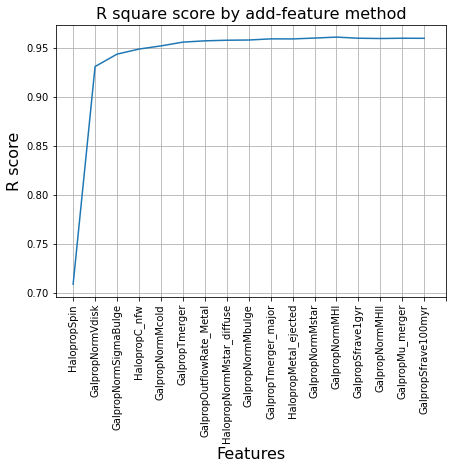

Elapsed time to run RF func on Bulgy Disks: 6103.083 seconds
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.985, test=0.933) total time=   3.5s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.987, test=0.969) total time=   4.4s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.934, test=0.899) total time=   0.8s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.936, test=0.934) total time=   4.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.987, test=0.965) total time=   1.8s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.994, test=0.941) total time=   7.3s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.937, test=0.897) total time=   0.8s
[CV 2/3] E

[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.940, test=0.903) total time=   2.0s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.979, test=0.967) total time=   3.6s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.988, test=0.971) total time=   4.4s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.929, test=0.931) total time=   0.8s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.984, test=0.937) total time=   1.4s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.977, test=0.967) total time=   7.0s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.988, test=0.967) total time=   6.4s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimato

[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.987, test=0.967) total time=   4.1s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.935, test=0.925) total time=   0.8s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.933, test=0.925) total time=   4.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.992, test=0.934) total time=   1.7s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.988, test=0.969) total time=   7.4s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.937, test=0.924) total time=   4.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.993, test=0.939) total time=   1.7s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_e

[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.932, test=0.895) total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.984, test=0.934) total time=   1.4s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.977, test=0.966) total time=   3.5s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.988, test=0.968) total time=   4.6s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.934, test=0.931) total time=   4.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.986, test=0.968) total time=   1.7s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.994, test=0.934) total time=   4.3s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimat

[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.979, test=0.962) total time=   1.4s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.979, test=0.965) total time=   7.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.988, test=0.966) total time=   6.3s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.934, test=0.900) total time=   4.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.979, test=0.968) total time=   6.9s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.938, test=0.901) total time=   4.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.985, test=0.962) total time=   1.7s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_es

[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.936, test=0.895) total time=   2.0s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.978, test=0.964) total time=   3.3s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.985, test=0.969) total time=   4.1s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.935, test=0.931) total time=   3.9s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.993, test=0.935) total time=   1.6s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.988, test=0.970) total time=   4.0s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.930, test=0.925) total time=   0.7s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimat

[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.939, test=0.901) total time=   4.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.985, test=0.969) total time=   1.7s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.989, test=0.967) total time=   4.3s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.931, test=0.926) total time=   0.8s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.934, test=0.928) total time=   4.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.993, test=0.935) total time=   1.7s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.987, test=0.968) total time=   7.4s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_esti

In [11]:
# this code takes 101 mins (1.7 hrs) to run when the dataset is bulgy disk galaxies with ~12,000 entries
start_time = time.time()

bulgy_disks_RF_results = functions.target_predicting_RF_function(X=X_bulgy_disks, y=y_bulgy_disks)

elapsed_time = time.time() - start_time

print(f"Elapsed time to run RF func on Bulgy Disks: {elapsed_time:.3f} seconds")

#### The most important features for Bulgy Disks (and their corresponding add-on R scores) are:

     1 HalopropSpin 0.7087988636548416
	 2 GalpropNormVdisk 0.9307436380539474
	 3 GalpropNormSigmaBulge 0.9434081457653855
	 4 HalopropC_nfw 0.9485673556946761
	 5 GalpropNormMcold 0.9517989467085594
	 6 GalpropTmerger 0.9556501465777094
	 7 GalpropOutflowRate_Metal 0.956960962442182
	 8 HalopropNormMstar_diffuse 0.9575892222879748
	 9 GalpropNormMbulge 0.9578081415482894
	 10 GalpropTmerger_major 0.9589780965537983
	 11 HalopropMetal_ejected 0.9589097660164617
	 12 GalpropNormMstar 0.9597979267029353
	 13 GalpropNormMHI 0.9607751965788128
	 14 GalpropSfrave1gyr 0.9596198641320951
	 15 GalpropNormMHII 0.9593539613247315
	 16 GalpropMu_merger 0.9596153956252683
	 17 GalpropSfrave100myr 0.9595472608189249

Correlation of GalpropNormMcold with GalpropNormMHI is 0.97, so 5th most important feature for Bulgy Disks can be considered GalpropNormMHI. For comparison, GalpropNormMHI is the 3rd most important feature for Disks.

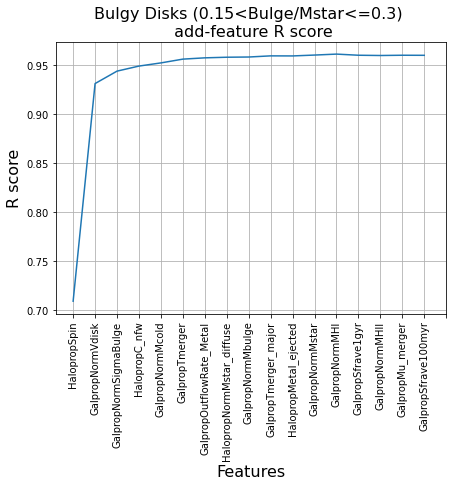

In [16]:
fig_add_feature_bulgy_disks=bulgy_disks_RF_results[4].plot(x='features', y='r_sq_score', rot=90, figsize=(7,5), use_index=True,
                    legend=False, grid=True, 
                    xticks=range(0,18))
fig_add_feature_bulgy_disks.set_title(label= 'Bulgy Disks (0.15<Bulge/Mstar<=0.3) \n add-feature R score',fontsize=16)
fig_add_feature_bulgy_disks.set_xlabel('Features',fontsize=16)
fig_add_feature_bulgy_disks.set_ylabel('R score',fontsize=16)

# fig_add_feature_bulgy_disks.get_figure().savefig('Bulgy Disks R score by add-feature method.jpg', dpi=500)

plt.show()

In [17]:
# bulgy_disks_RF_results[4].to_csv('Bulgy Disks Max r scores by add column method.csv', index=False)

In [18]:
# bulgy_disks = pd.read_csv('Bulgy Disks Max r scores by add column method.csv')

In [19]:
bulgy_disks

feature_number                   features  r_sq_score
0                1               HalopropSpin    0.708799
1                2           GalpropNormVdisk    0.930744
2                3      GalpropNormSigmaBulge    0.943408
3                4              HalopropC_nfw    0.948567
4                5           GalpropNormMcold    0.951799
5                6             GalpropTmerger    0.955650
6                7   GalpropOutflowRate_Metal    0.956961
7                8  HalopropNormMstar_diffuse    0.957589
8                9          GalpropNormMbulge    0.957808
9               10       GalpropTmerger_major    0.958978
10              11      HalopropMetal_ejected    0.958910
11              12           GalpropNormMstar    0.959798
12              13             GalpropNormMHI    0.960775
13              14          GalpropSfrave1gyr    0.959620
14              15            GalpropNormMHII    0.959354
15              16           GalpropMu_merger    0.959615
16              17        GalpropSfrave100myr    0.959547

In [20]:
fig_bulgy_disks = bulgy_disks_RF_results[1]
# fig_bulgy_disks.savefig('Bulgy Disks RF Prediction_vs_True.jpeg', dpi=500)
plt.show()

In [22]:
fig_builtin_imp_bulgy_disks = bulgy_disks_RF_results[2]
# fig_builtin_imp_bulgy_disks.savefig('Bulgy Disks Built-in Feature Ranking.jpeg', dpi=500)
plt.show()

## <font color='purple'> <a id =4> </a> <br>Bulgier Disk  Galaxies: 0.3< B/Mstar <=0.5

In [23]:
# Looking at the histogram, define bulgy disk galaxies to be the ones with 0.15< bulge/mstar <=0.3
df_bulgier_disks = df_normalized_31.loc[(df_normalized_31.BulgeMstar_ratio>0.3) & (df_normalized_31.BulgeMstar_ratio<=0.5)]

In [24]:
df_bulgier_disks.shape

(4302, 33)

In [42]:
# df_bulgier_disks.to_csv('Bulgier Disks Dataset_as defined in notebook v13', index=False)

In [25]:
X_bulgier_disks = df_bulgier_disks.drop(columns=['GalpropNormHalfRadius', 'BulgeMstar_ratio'])


y_bulgier_disks = df_bulgier_disks.loc[:,'GalpropNormHalfRadius']

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params, best score: 0.7729 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}
RF Accuracy: 0.77 (+/- 0.06)


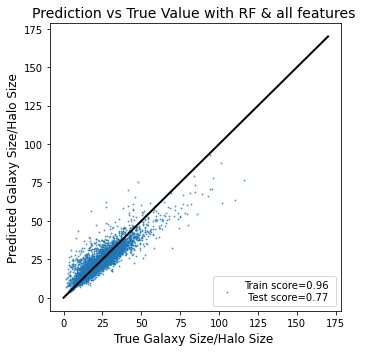

Elapsed time to compute the importances: 0.031 seconds
Elapsed time to compute the importances: 3.481 seconds


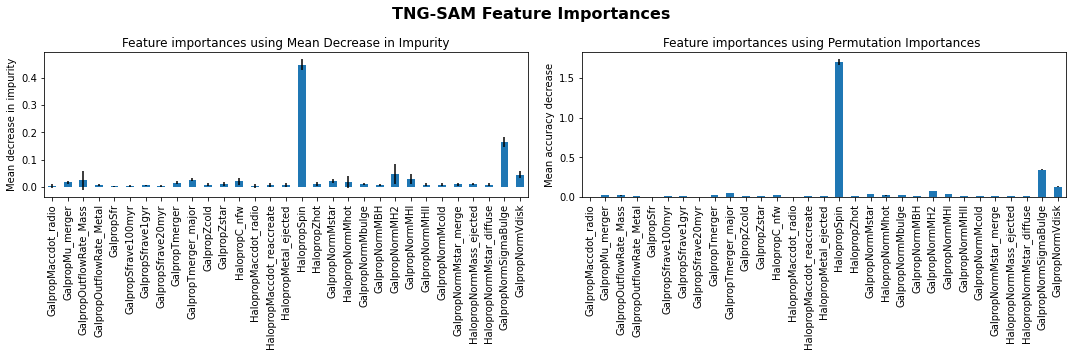

  0%|                                                    | 0/31 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/31 [00:00<00:15,  1.98it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▊                                         | 2/31 [00:01<00:19,  1.49it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▎                                       | 3/31 [00:02<00:20,  1.37it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▋                                      | 4/31 [00:02<00:20,  1.32it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|███████                                     | 5/31 [00:03<00:19,  1.35it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▌                                   | 6/31 [00:04<00:19,  1.31it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|█████████▉                                  | 7/31 [00:05<00:17,  1.36it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▎                                | 8/31 [00:06<00:18,  1.23it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▊                               | 9/31 [00:06<00:16,  1.32it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|█████████████▊                             | 10/31 [00:07<00:15,  1.37it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▎                           | 11/31 [00:08<00:14,  1.37it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▋                          | 12/31 [00:08<00:13,  1.39it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████                         | 13/31 [00:09<00:12,  1.43it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▍                       | 14/31 [00:09<00:10,  1.60it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 15/31 [00:10<00:10,  1.49it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 16/31 [00:11<00:10,  1.48it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▌                   | 17/31 [00:12<00:09,  1.50it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▉                  | 18/31 [00:12<00:08,  1.50it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████▎                | 19/31 [00:13<00:08,  1.41it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▋               | 20/31 [00:14<00:07,  1.40it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 21/31 [00:15<00:07,  1.34it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▌            | 22/31 [00:15<00:06,  1.46it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▉           | 23/31 [00:16<00:05,  1.50it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|█████████████████████████████████▎         | 24/31 [00:16<00:04,  1.48it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▋        | 25/31 [00:17<00:04,  1.46it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████       | 26/31 [00:18<00:03,  1.45it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▍     | 27/31 [00:19<00:02,  1.41it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▊    | 28/31 [00:19<00:02,  1.36it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▏  | 29/31 [00:20<00:01,  1.33it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 30/31 [00:21<00:00,  1.32it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 31/31 [00:21<00:00,  1.41it/s]


1. iteration: 
	 1 HalopropSpin 0.34430875557264334


  0%|                                                    | 0/30 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/30 [00:01<00:32,  1.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|██▉                                         | 2/30 [00:02<00:31,  1.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▍                                       | 3/30 [00:03<00:31,  1.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▊                                      | 4/30 [00:04<00:30,  1.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▎                                    | 5/30 [00:05<00:30,  1.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 6/30 [00:07<00:29,  1.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████▎                                 | 7/30 [00:08<00:27,  1.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|███████████▋                                | 8/30 [00:09<00:26,  1.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████▏                              | 9/30 [00:10<00:24,  1.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▎                            | 10/30 [00:11<00:22,  1.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 37%|███████████████▊                           | 11/30 [00:12<00:21,  1.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▏                         | 12/30 [00:13<00:20,  1.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▋                        | 13/30 [00:15<00:20,  1.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████                       | 14/30 [00:16<00:19,  1.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 15/30 [00:17<00:17,  1.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▉                    | 16/30 [00:18<00:16,  1.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▎                  | 17/30 [00:19<00:15,  1.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 18/30 [00:21<00:14,  1.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████▏               | 19/30 [00:22<00:13,  1.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 20/30 [00:23<00:11,  1.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|██████████████████████████████             | 21/30 [00:24<00:10,  1.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▌           | 22/30 [00:25<00:08,  1.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|████████████████████████████████▉          | 23/30 [00:26<00:07,  1.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 24/30 [00:27<00:06,  1.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▊       | 25/30 [00:28<00:05,  1.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▎     | 26/30 [00:30<00:04,  1.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▋    | 27/30 [00:31<00:03,  1.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|████████████████████████████████████████▏  | 28/30 [00:32<00:02,  1.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 29/30 [00:33<00:01,  1.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 30/30 [00:34<00:00,  1.16s/it]


2. iteration: 
	 1 HalopropSpin 0.34430875557264334
	 2 GalpropNormSigmaBulge 0.5733138209096916


  0%|                                                    | 0/29 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▌                                          | 1/29 [00:01<00:39,  1.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███                                         | 2/29 [00:02<00:40,  1.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▌                                       | 3/29 [00:04<00:42,  1.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████                                      | 4/29 [00:06<00:39,  1.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▌                                    | 5/29 [00:07<00:38,  1.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████                                   | 6/29 [00:09<00:38,  1.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▌                                 | 7/29 [00:11<00:37,  1.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▏                               | 8/29 [00:13<00:35,  1.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▋                              | 9/29 [00:14<00:32,  1.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 34%|██████████████▊                            | 10/29 [00:16<00:29,  1.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▎                          | 11/29 [00:17<00:28,  1.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▊                         | 12/29 [00:19<00:27,  1.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▎                       | 13/29 [00:21<00:26,  1.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 14/29 [00:22<00:22,  1.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 15/29 [00:23<00:20,  1.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▋                   | 16/29 [00:25<00:19,  1.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▏                 | 17/29 [00:27<00:18,  1.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▋                | 18/29 [00:28<00:17,  1.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 66%|████████████████████████████▏              | 19/29 [00:30<00:16,  1.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▋             | 20/29 [00:32<00:14,  1.64s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|███████████████████████████████▏           | 21/29 [00:33<00:13,  1.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▌          | 22/29 [00:35<00:11,  1.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|██████████████████████████████████         | 23/29 [00:37<00:10,  1.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▌       | 24/29 [00:38<00:08,  1.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|█████████████████████████████████████      | 25/29 [00:40<00:06,  1.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▌    | 26/29 [00:42<00:05,  1.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|████████████████████████████████████████   | 27/29 [00:43<00:03,  1.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 28/29 [00:45<00:01,  1.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 29/29 [00:46<00:00,  1.62s/it]


3. iteration: 
	 1 HalopropSpin 0.34430875557264334
	 2 GalpropNormSigmaBulge 0.5733138209096916
	 3 GalpropNormMHI 0.6744729720640937


  0%|                                                    | 0/28 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▌                                          | 1/28 [00:02<00:55,  2.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███▏                                        | 2/28 [00:04<00:55,  2.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▋                                       | 3/28 [00:06<00:53,  2.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████▎                                     | 4/28 [00:08<00:51,  2.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|███████▊                                    | 5/28 [00:10<00:50,  2.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████▍                                  | 6/28 [00:13<00:48,  2.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 7/28 [00:15<00:46,  2.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▌                               | 8/28 [00:17<00:43,  2.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|██████████████▏                             | 9/28 [00:19<00:38,  2.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▎                           | 10/28 [00:21<00:36,  2.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▉                          | 11/28 [00:23<00:34,  2.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▍                        | 12/28 [00:25<00:32,  2.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▉                       | 13/28 [00:27<00:30,  2.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 14/28 [00:29<00:28,  2.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████                    | 15/28 [00:31<00:26,  2.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▌                  | 16/28 [00:33<00:24,  2.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████                 | 17/28 [00:35<00:22,  2.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▋               | 18/28 [00:37<00:20,  2.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 19/28 [00:39<00:18,  2.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▋            | 20/28 [00:41<00:16,  2.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 21/28 [00:43<00:14,  2.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|█████████████████████████████████▊         | 22/28 [00:45<00:12,  2.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▎       | 23/28 [00:48<00:10,  2.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|████████████████████████████████████▊      | 24/28 [00:50<00:08,  2.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▍    | 25/28 [00:52<00:06,  2.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|███████████████████████████████████████▉   | 26/28 [00:54<00:04,  2.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▍ | 27/28 [00:56<00:02,  2.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 28/28 [00:58<00:00,  2.08s/it]


4. iteration: 
	 1 HalopropSpin 0.34430875557264334
	 2 GalpropNormSigmaBulge 0.5733138209096916
	 3 GalpropNormMHI 0.6744729720640937
	 4 GalpropNormMbulge 0.7145032481218297


  0%|                                                    | 0/27 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▋                                          | 1/27 [00:02<01:02,  2.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███▎                                        | 2/27 [00:04<01:00,  2.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▉                                       | 3/27 [00:07<00:59,  2.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▌                                     | 4/27 [00:09<00:57,  2.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▏                                   | 5/27 [00:12<00:54,  2.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▊                                  | 6/27 [00:14<00:52,  2.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▍                                | 7/27 [00:17<00:50,  2.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████                               | 8/27 [00:20<00:48,  2.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▋                             | 9/27 [00:22<00:45,  2.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 37%|███████████████▉                           | 10/27 [00:25<00:42,  2.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▌                         | 11/27 [00:27<00:40,  2.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|███████████████████                        | 12/27 [00:30<00:38,  2.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▋                      | 13/27 [00:32<00:36,  2.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▎                    | 14/27 [00:35<00:33,  2.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|███████████████████████▉                   | 15/27 [00:38<00:31,  2.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▍                 | 16/27 [00:40<00:28,  2.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████                | 17/27 [00:42<00:24,  2.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 18/27 [00:45<00:22,  2.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|██████████████████████████████▎            | 19/27 [00:47<00:20,  2.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▊           | 20/27 [00:50<00:17,  2.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 78%|█████████████████████████████████▍         | 21/27 [00:52<00:14,  2.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|███████████████████████████████████        | 22/27 [00:55<00:12,  2.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▋      | 23/27 [00:57<00:09,  2.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▏    | 24/27 [00:59<00:07,  2.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|███████████████████████████████████████▊   | 25/27 [01:02<00:04,  2.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▍ | 26/27 [01:04<00:02,  2.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 27/27 [01:07<00:00,  2.49s/it]


5. iteration: 
	 1 HalopropSpin 0.34430875557264334
	 2 GalpropNormSigmaBulge 0.5733138209096916
	 3 GalpropNormMHI 0.6744729720640937
	 4 GalpropNormMbulge 0.7145032481218297
	 5 GalpropNormMstar 0.7701495639997087


  0%|                                                    | 0/26 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▋                                          | 1/26 [00:02<01:13,  2.94s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  8%|███▍                                        | 2/26 [00:05<01:11,  2.96s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████                                       | 3/26 [00:08<01:08,  2.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▊                                     | 4/26 [00:11<01:05,  2.96s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▍                                   | 5/26 [00:14<01:01,  2.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████▏                                 | 6/26 [00:17<00:58,  2.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|███████████▊                                | 7/26 [00:20<00:55,  2.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▌                              | 8/26 [00:23<00:53,  2.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▏                            | 9/26 [00:26<00:51,  3.02s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▌                          | 10/26 [00:29<00:47,  2.99s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████▏                        | 11/26 [00:32<00:44,  2.99s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▊                       | 12/26 [00:35<00:41,  2.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 13/26 [00:38<00:38,  2.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████▏                   | 14/26 [00:41<00:36,  3.01s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.061, test=0.029) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.133, test=-0.022) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.116, test=0.005) total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.131, test=-0.028) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.090, test=0.033) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.263, test=-0.019) total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.275, test=-0.033) total time=   0.3s
[CV 1/3] END

 58%|████████████████████████▊                  | 15/26 [00:44<00:33,  3.02s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.073, test=0.013) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.117, test=0.016) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.094, test=0.032) total time=   0.0s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.093, test=0.024) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.515, test=-0.263) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.524, test=-0.208) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.116, test=0.050) total time=   0.1s
[CV 1/3] EN

 62%|██████████████████████████▍                | 16/26 [00:47<00:29,  3.00s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.073, test=0.013) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.132, test=-0.029) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.154, test=-0.077) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.172, test=-0.072) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.272, test=-0.033) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.280, test=-0.024) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.528, test=-0.204) total time=   0.2s
[C

 65%|████████████████████████████               | 17/26 [00:50<00:26,  2.99s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▊             | 18/26 [00:53<00:23,  2.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▍           | 19/26 [00:56<00:20,  2.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.061, test=0.031) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.158, test=-0.077) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.088, test=0.018) total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.095, test=0.021) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.524, test=-0.229) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.540, test=-0.216) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.106, test=0.066) total time=   0.0s
[CV 3/3]

[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.132, test=-0.028) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.136, test=-0.023) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.157, test=-0.020) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.095, test=0.022) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.284, test=-0.029) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.515, test=-0.223) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.527, test=-0.249) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, 

 77%|█████████████████████████████████          | 20/26 [00:59<00:18,  3.02s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.073, test=0.012) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.136, test=-0.024) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.151, test=-0.031) total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.159, test=-0.077) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.092, test=0.032) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.266, test=-0.015) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.103, test=0.074) total time=   0.1s
[CV 3/3]

 81%|██████████████████████████████████▋        | 21/26 [01:02<00:15,  3.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▍      | 22/26 [01:06<00:12,  3.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|██████████████████████████████████████     | 23/26 [01:09<00:09,  3.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 92%|███████████████████████████████████████▋   | 24/26 [01:12<00:06,  3.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▎ | 25/26 [01:15<00:03,  3.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 26/26 [01:19<00:00,  3.04s/it]


6. iteration: 
	 1 HalopropSpin 0.34430875557264334
	 2 GalpropNormSigmaBulge 0.5733138209096916
	 3 GalpropNormMHI 0.6744729720640937
	 4 GalpropNormMbulge 0.7145032481218297
	 5 GalpropNormMstar 0.7701495639997087
	 6 GalpropNormVdisk 0.7899566427860466


  0%|                                                    | 0/25 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▊                                          | 1/25 [00:03<01:33,  3.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  8%|███▌                                        | 2/25 [00:07<01:23,  3.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▎                                      | 3/25 [00:10<01:18,  3.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|███████                                     | 4/25 [00:14<01:13,  3.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 5/25 [00:17<01:11,  3.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▌                                 | 6/25 [00:21<01:06,  3.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▎                               | 7/25 [00:24<01:01,  3.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|██████████████                              | 8/25 [00:27<00:57,  3.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▊                            | 9/25 [00:31<00:54,  3.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▏                         | 10/25 [00:34<00:50,  3.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|██████████████████▉                        | 11/25 [00:37<00:46,  3.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▋                      | 12/25 [00:41<00:43,  3.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▎                    | 13/25 [00:44<00:39,  3.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████                   | 14/25 [00:47<00:36,  3.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 15/25 [00:51<00:33,  3.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▌               | 16/25 [00:54<00:29,  3.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 17/25 [00:57<00:26,  3.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|██████████████████████████████▉            | 18/25 [01:01<00:23,  3.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▋          | 19/25 [01:04<00:19,  3.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 20/25 [01:07<00:16,  3.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████       | 21/25 [01:10<00:13,  3.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▊     | 22/25 [01:14<00:09,  3.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 92%|███████████████████████████████████████▌   | 23/25 [01:17<00:06,  3.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▎ | 24/25 [01:20<00:03,  3.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 25/25 [01:24<00:00,  3.36s/it]


7. iteration: 
	 1 HalopropSpin 0.34430875557264334
	 2 GalpropNormSigmaBulge 0.5733138209096916
	 3 GalpropNormMHI 0.6744729720640937
	 4 GalpropNormMbulge 0.7145032481218297
	 5 GalpropNormMstar 0.7701495639997087
	 6 GalpropNormVdisk 0.7899566427860466
	 7 GalpropZcold 0.790921462829786


  0%|                                                    | 0/24 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▊                                          | 1/24 [00:03<01:09,  3.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  8%|███▋                                        | 2/24 [00:06<01:15,  3.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▌                                      | 3/24 [00:10<01:16,  3.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▎                                    | 4/24 [00:14<01:13,  3.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████▏                                  | 5/24 [00:18<01:10,  3.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 6/24 [00:21<01:03,  3.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▊                               | 7/24 [00:25<01:01,  3.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▋                             | 8/24 [00:28<00:58,  3.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▌                           | 9/24 [00:32<00:55,  3.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|█████████████████▉                         | 10/24 [00:36<00:51,  3.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▋                       | 11/24 [00:40<00:48,  3.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 12/24 [00:43<00:44,  3.74s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████▎                   | 13/24 [00:47<00:41,  3.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|█████████████████████████                  | 14/24 [00:51<00:37,  3.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▉                | 15/24 [00:55<00:34,  3.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 16/24 [00:59<00:30,  3.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▍            | 17/24 [01:03<00:26,  3.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 18/24 [01:06<00:22,  3.77s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|██████████████████████████████████         | 19/24 [01:10<00:18,  3.75s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▊       | 20/24 [01:14<00:15,  3.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▋     | 21/24 [01:18<00:11,  3.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 92%|███████████████████████████████████████▍   | 22/24 [01:21<00:07,  3.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▏ | 23/24 [01:25<00:03,  3.77s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 24/24 [01:29<00:00,  3.72s/it]


8. iteration: 
	 1 HalopropSpin 0.34430875557264334
	 2 GalpropNormSigmaBulge 0.5733138209096916
	 3 GalpropNormMHI 0.6744729720640937
	 4 GalpropNormMbulge 0.7145032481218297
	 5 GalpropNormMstar 0.7701495639997087
	 6 GalpropNormVdisk 0.7899566427860466
	 7 GalpropZcold 0.790921462829786
	 8 HalopropNormMstar_diffuse 0.7870362137861071


  0%|                                                    | 0/23 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▉                                          | 1/23 [00:04<01:28,  4.01s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|███▊                                        | 2/23 [00:08<01:25,  4.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▋                                      | 3/23 [00:12<01:21,  4.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▋                                    | 4/23 [00:16<01:17,  4.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▌                                  | 5/23 [00:20<01:13,  4.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▍                                | 6/23 [00:24<01:09,  4.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████▍                              | 7/23 [00:28<01:05,  4.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▎                            | 8/23 [00:32<01:01,  4.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|█████████████████▏                          | 9/23 [00:36<00:57,  4.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▋                        | 10/23 [00:40<00:53,  4.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▌                      | 11/23 [00:44<00:48,  4.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▍                    | 12/23 [00:49<00:45,  4.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▎                  | 13/23 [00:53<00:41,  4.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████▏                | 14/23 [00:57<00:37,  4.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|████████████████████████████               | 15/23 [01:01<00:33,  4.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|█████████████████████████████▉             | 16/23 [01:05<00:29,  4.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▊           | 17/23 [01:09<00:24,  4.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 78%|█████████████████████████████████▋         | 18/23 [01:14<00:20,  4.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▌       | 19/23 [01:18<00:16,  4.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▍     | 20/23 [01:22<00:12,  4.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|███████████████████████████████████████▎   | 21/23 [01:26<00:08,  4.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▏ | 22/23 [01:31<00:04,  4.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 23/23 [01:35<00:00,  4.15s/it]


9. iteration: 
	 1 HalopropSpin 0.34430875557264334
	 2 GalpropNormSigmaBulge 0.5733138209096916
	 3 GalpropNormMHI 0.6744729720640937
	 4 GalpropNormMbulge 0.7145032481218297
	 5 GalpropNormMstar 0.7701495639997087
	 6 GalpropNormVdisk 0.7899566427860466
	 7 GalpropZcold 0.790921462829786
	 8 HalopropNormMstar_diffuse 0.7870362137861071
	 9 HalopropMetal_ejected 0.7859761358486343


  0%|                                                    | 0/22 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  5%|██                                          | 1/22 [00:04<01:34,  4.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|████                                        | 2/22 [00:09<01:32,  4.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████                                      | 3/22 [00:13<01:28,  4.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|████████                                    | 4/22 [00:18<01:23,  4.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████                                  | 5/22 [00:22<01:17,  4.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|████████████                                | 6/22 [00:27<01:13,  4.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|██████████████                              | 7/22 [00:32<01:09,  4.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|████████████████                            | 8/22 [00:36<01:04,  4.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|██████████████████                          | 9/22 [00:40<00:56,  4.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▌                       | 10/22 [00:45<00:53,  4.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 11/22 [00:49<00:49,  4.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▍                   | 12/22 [00:54<00:45,  4.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▍                 | 13/22 [00:59<00:40,  4.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▎               | 14/22 [01:03<00:36,  4.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▎             | 15/22 [01:08<00:32,  4.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▎           | 16/22 [01:13<00:27,  4.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|█████████████████████████████████▏         | 17/22 [01:16<00:21,  4.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▏       | 18/22 [01:21<00:17,  4.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|█████████████████████████████████████▏     | 19/22 [01:25<00:13,  4.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|███████████████████████████████████████    | 20/22 [01:30<00:08,  4.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 95%|█████████████████████████████████████████  | 21/22 [01:34<00:04,  4.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 22/22 [01:39<00:00,  4.52s/it]


10. iteration: 
	 1 HalopropSpin 0.34430875557264334
	 2 GalpropNormSigmaBulge 0.5733138209096916
	 3 GalpropNormMHI 0.6744729720640937
	 4 GalpropNormMbulge 0.7145032481218297
	 5 GalpropNormMstar 0.7701495639997087
	 6 GalpropNormVdisk 0.7899566427860466
	 7 GalpropZcold 0.790921462829786
	 8 HalopropNormMstar_diffuse 0.7870362137861071
	 9 HalopropMetal_ejected 0.7859761358486343
	 10 HalopropMaccdot_radio 0.7848669192360621


  0%|                                                    | 0/21 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  5%|██                                          | 1/21 [00:04<01:20,  4.00s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▏                                       | 2/21 [00:08<01:26,  4.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████▎                                     | 3/21 [00:13<01:24,  4.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▍                                   | 4/21 [00:18<01:21,  4.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▍                                 | 5/21 [00:23<01:17,  4.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▌                               | 6/21 [00:28<01:12,  4.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▋                             | 7/21 [00:33<01:07,  4.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▊                           | 8/21 [00:38<01:03,  4.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▊                         | 9/21 [00:43<00:58,  4.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▍                      | 10/21 [00:47<00:53,  4.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▌                    | 11/21 [00:52<00:48,  4.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▌                  | 12/21 [00:57<00:43,  4.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▌                | 13/21 [01:02<00:38,  4.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 14/21 [01:07<00:33,  4.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▋            | 15/21 [01:11<00:27,  4.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▊          | 16/21 [01:16<00:23,  4.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▊        | 17/21 [01:21<00:19,  4.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|████████████████████████████████████▊      | 18/21 [01:26<00:14,  4.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▉    | 19/21 [01:30<00:09,  4.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 95%|████████████████████████████████████████▉  | 20/21 [01:35<00:04,  4.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 21/21 [01:40<00:00,  4.80s/it]


11. iteration: 
	 1 HalopropSpin 0.34430875557264334
	 2 GalpropNormSigmaBulge 0.5733138209096916
	 3 GalpropNormMHI 0.6744729720640937
	 4 GalpropNormMbulge 0.7145032481218297
	 5 GalpropNormMstar 0.7701495639997087
	 6 GalpropNormVdisk 0.7899566427860466
	 7 GalpropZcold 0.790921462829786
	 8 HalopropNormMstar_diffuse 0.7870362137861071
	 9 HalopropMetal_ejected 0.7859761358486343
	 10 HalopropMaccdot_radio 0.7848669192360621
	 11 GalpropMaccdot_radio 0.783250317657313


  0%|                                                    | 0/20 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  5%|██▏                                         | 1/20 [00:05<01:39,  5.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▍                                       | 2/20 [00:10<01:33,  5.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▌                                     | 3/20 [00:15<01:28,  5.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 4/20 [00:20<01:22,  5.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 5/20 [00:25<01:17,  5.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████▏                              | 6/20 [00:31<01:12,  5.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▍                            | 7/20 [00:36<01:07,  5.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▌                          | 8/20 [00:41<01:02,  5.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▊                        | 9/20 [00:46<00:57,  5.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 10/20 [00:51<00:51,  5.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▋                   | 11/20 [00:57<00:46,  5.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 12/20 [01:01<00:39,  4.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▉               | 13/20 [01:06<00:35,  5.01s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|██████████████████████████████             | 14/20 [01:11<00:30,  5.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 15/20 [01:16<00:25,  5.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 16/20 [01:22<00:20,  5.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.719, test=0.681) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.888, test=0.673) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.884, test=0.707) total time=   0.7s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.713, test=0.674) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.880, test=0.719) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.892, test=0.685) total time=   0.7s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.723, test=0.663) total time=   0.2s
[CV 1/3] END boot

 85%|████████████████████████████████████▌      | 17/20 [01:27<00:15,  5.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.888, test=0.731) total time=   0.7s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.735, test=0.667) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.892, test=0.730) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.897, test=0.736) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.937, test=0.737) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.687, test=0.658) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.749, test=0.616) total time=   0.5s
[CV 2/3] END bo

 90%|██████████████████████████████████████▋    | 18/20 [01:32<00:10,  5.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.941, test=0.672) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.720, test=0.678) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.889, test=0.698) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.890, test=0.701) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.935, test=0.714) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.722, test=0.676) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.743, test=0.671) total time=   0.5s
[CV 2/3] END b

 95%|████████████████████████████████████████▊  | 19/20 [01:38<00:05,  5.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.940, test=0.735) total time=   0.7s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.748, test=0.612) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.894, test=0.751) total time=   0.8s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.955, test=0.748) total time=   0.7s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.706, test=0.644) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.913, test=0.726) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.945, test=0.768) total time=   0.2s
[CV 2/3] 

100%|███████████████████████████████████████████| 20/20 [01:43<00:00,  5.17s/it]


12. iteration: 
	 1 HalopropSpin 0.34430875557264334
	 2 GalpropNormSigmaBulge 0.5733138209096916
	 3 GalpropNormMHI 0.6744729720640937
	 4 GalpropNormMbulge 0.7145032481218297
	 5 GalpropNormMstar 0.7701495639997087
	 6 GalpropNormVdisk 0.7899566427860466
	 7 GalpropZcold 0.790921462829786
	 8 HalopropNormMstar_diffuse 0.7870362137861071
	 9 HalopropMetal_ejected 0.7859761358486343
	 10 HalopropMaccdot_radio 0.7848669192360621
	 11 GalpropMaccdot_radio 0.783250317657313
	 12 GalpropNormMHII 0.7833306469527868


  0%|                                                    | 0/19 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  5%|██▎                                         | 1/19 [00:05<01:43,  5.75s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▋                                       | 2/19 [00:11<01:37,  5.75s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.721, test=0.682) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.900, test=0.728) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.911, test=0.748) total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.732, test=0.644) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.908, test=0.749) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.949, test=0.747) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.720, test=0.634) total time=   0.1s
[CV 3/3] END boo

 16%|██████▉                                     | 3/19 [00:17<01:32,  5.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.952, test=0.748) total time=   0.8s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.725, test=0.675) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.904, test=0.753) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.910, test=0.759) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.949, test=0.771) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.717, test=0.657) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.729, test=0.647) total time=   0.5s
[CV 2/3] END 

 21%|█████████▎                                  | 4/19 [00:23<01:28,  5.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▌                                | 5/19 [00:29<01:22,  5.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.917, test=0.714) total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.949, test=0.781) total time=   0.5s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.700, test=0.636) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.909, test=0.720) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.911, test=0.754) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.900, test=0.749) total time=   0.9s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.730, test=0.672) total time=   0.5s
[CV 3/3] END b

 32%|█████████████▉                              | 6/19 [00:35<01:16,  5.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 37%|████████████████▏                           | 7/19 [00:40<01:10,  5.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.887, test=0.748) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.913, test=0.707) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.906, test=0.758) total time=   0.8s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.728, test=0.682) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.917, test=0.731) total time=   0.9s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.949, test=0.778) total time=   0.7s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.730, test=0.672) total time=   0.3s
[CV 1/3] END 

[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.739, test=0.668) total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.913, test=0.751) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.950, test=0.786) total time=   0.6s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.720, test=0.675) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.905, test=0.769) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.910, test=0.773) total time=   0.5s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.957, test=0.757) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimat

[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.954, test=0.743) total time=   0.7s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.734, test=0.690) total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.952, test=0.773) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.955, test=0.762) total time=   0.8s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.731, test=0.680) total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.921, test=0.731) total time=   1.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.957, test=0.782) total time=   1.2s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_est

 42%|██████████████████▌                         | 8/19 [00:46<01:04,  5.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████▊                       | 9/19 [00:52<00:58,  5.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▋                    | 10/19 [00:58<00:52,  5.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▉                  | 11/19 [01:04<00:47,  5.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████▏               | 12/19 [01:10<00:41,  5.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▍             | 13/19 [01:16<00:35,  5.89s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▋           | 14/19 [01:22<00:29,  5.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|█████████████████████████████████▉         | 15/19 [01:27<00:23,  5.89s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████▏      | 16/19 [01:34<00:17,  5.93s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▍    | 17/19 [01:39<00:11,  5.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 95%|████████████████████████████████████████▋  | 18/19 [01:45<00:05,  5.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 19/19 [01:51<00:00,  5.89s/it]


13. iteration: 
	 1 HalopropSpin 0.34430875557264334
	 2 GalpropNormSigmaBulge 0.5733138209096916
	 3 GalpropNormMHI 0.6744729720640937
	 4 GalpropNormMbulge 0.7145032481218297
	 5 GalpropNormMstar 0.7701495639997087
	 6 GalpropNormVdisk 0.7899566427860466
	 7 GalpropZcold 0.790921462829786
	 8 HalopropNormMstar_diffuse 0.7870362137861071
	 9 HalopropMetal_ejected 0.7859761358486343
	 10 HalopropMaccdot_radio 0.7848669192360621
	 11 GalpropMaccdot_radio 0.783250317657313
	 12 GalpropNormMHII 0.7833306469527868
	 13 GalpropTmerger 0.7792734422868701


  0%|                                                    | 0/18 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▍                                         | 1/18 [00:06<01:50,  6.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▉                                       | 2/18 [00:12<01:43,  6.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▎                                    | 3/18 [00:19<01:37,  6.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▊                                  | 4/18 [00:26<01:31,  6.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▏                               | 5/18 [00:32<01:24,  6.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▋                             | 6/18 [00:38<01:17,  6.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|█████████████████                           | 7/18 [00:45<01:10,  6.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|███████████████████▌                        | 8/18 [00:51<01:05,  6.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|██████████████████████                      | 9/18 [00:58<00:58,  6.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|███████████████████████▉                   | 10/18 [01:04<00:51,  6.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████▎                | 11/18 [01:11<00:45,  6.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 12/18 [01:17<00:38,  6.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|███████████████████████████████            | 13/18 [01:24<00:32,  6.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 78%|█████████████████████████████████▍         | 14/18 [01:30<00:25,  6.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▊       | 15/18 [01:37<00:19,  6.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▏    | 16/18 [01:43<00:13,  6.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▌  | 17/18 [01:50<00:06,  6.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 18/18 [01:56<00:00,  6.49s/it]


14. iteration: 
	 1 HalopropSpin 0.34430875557264334
	 2 GalpropNormSigmaBulge 0.5733138209096916
	 3 GalpropNormMHI 0.6744729720640937
	 4 GalpropNormMbulge 0.7145032481218297
	 5 GalpropNormMstar 0.7701495639997087
	 6 GalpropNormVdisk 0.7899566427860466
	 7 GalpropZcold 0.790921462829786
	 8 HalopropNormMstar_diffuse 0.7870362137861071
	 9 HalopropMetal_ejected 0.7859761358486343
	 10 HalopropMaccdot_radio 0.7848669192360621
	 11 GalpropMaccdot_radio 0.783250317657313
	 12 GalpropNormMHII 0.7833306469527868
	 13 GalpropTmerger 0.7792734422868701
	 14 HalopropC_nfw 0.77314601291824


  0%|                                                    | 0/17 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▌                                         | 1/17 [00:06<01:51,  6.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▏                                      | 2/17 [00:13<01:44,  6.96s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|███████▊                                    | 3/17 [00:20<01:37,  6.94s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▎                                 | 4/17 [00:27<01:30,  6.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▉                               | 5/17 [00:34<01:23,  6.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▌                            | 6/17 [00:41<01:16,  6.96s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|██████████████████                          | 7/17 [00:48<01:09,  6.96s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████▋                       | 8/17 [00:55<01:02,  6.94s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|███████████████████████▎                    | 9/17 [01:02<00:55,  6.93s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▎                 | 10/17 [01:09<00:48,  6.93s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▊               | 11/17 [01:16<00:41,  6.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▎            | 12/17 [01:23<00:34,  6.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▉          | 13/17 [01:30<00:27,  6.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▍       | 14/17 [01:37<00:20,  6.89s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▉     | 15/17 [01:43<00:13,  6.89s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▍  | 16/17 [01:50<00:06,  6.93s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 17/17 [01:57<00:00,  6.93s/it]


15. iteration: 
	 1 HalopropSpin 0.34430875557264334
	 2 GalpropNormSigmaBulge 0.5733138209096916
	 3 GalpropNormMHI 0.6744729720640937
	 4 GalpropNormMbulge 0.7145032481218297
	 5 GalpropNormMstar 0.7701495639997087
	 6 GalpropNormVdisk 0.7899566427860466
	 7 GalpropZcold 0.790921462829786
	 8 HalopropNormMstar_diffuse 0.7870362137861071
	 9 HalopropMetal_ejected 0.7859761358486343
	 10 HalopropMaccdot_radio 0.7848669192360621
	 11 GalpropMaccdot_radio 0.783250317657313
	 12 GalpropNormMHII 0.7833306469527868
	 13 GalpropTmerger 0.7792734422868701
	 14 HalopropC_nfw 0.77314601291824
	 15 GalpropZstar 0.7793460345130736


  0%|                                                    | 0/16 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▊                                         | 1/16 [00:07<01:49,  7.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▌                                      | 2/16 [00:14<01:42,  7.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▎                                   | 3/16 [00:21<01:34,  7.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 4/16 [00:29<01:27,  7.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▊                              | 5/16 [00:36<01:19,  7.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▌                           | 6/16 [00:43<01:12,  7.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|███████████████████▎                        | 7/16 [00:50<01:05,  7.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|██████████████████████                      | 8/16 [00:58<00:57,  7.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████▊                   | 9/16 [01:05<00:50,  7.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▉                | 10/16 [01:12<00:43,  7.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▌             | 11/16 [01:20<00:36,  7.36s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 12/16 [01:27<00:29,  7.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▉        | 13/16 [01:34<00:21,  7.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▋     | 14/16 [01:42<00:14,  7.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▎  | 15/16 [01:49<00:07,  7.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 16/16 [01:56<00:00,  7.31s/it]


16. iteration: 
	 1 HalopropSpin 0.34430875557264334
	 2 GalpropNormSigmaBulge 0.5733138209096916
	 3 GalpropNormMHI 0.6744729720640937
	 4 GalpropNormMbulge 0.7145032481218297
	 5 GalpropNormMstar 0.7701495639997087
	 6 GalpropNormVdisk 0.7899566427860466
	 7 GalpropZcold 0.790921462829786
	 8 HalopropNormMstar_diffuse 0.7870362137861071
	 9 HalopropMetal_ejected 0.7859761358486343
	 10 HalopropMaccdot_radio 0.7848669192360621
	 11 GalpropMaccdot_radio 0.783250317657313
	 12 GalpropNormMHII 0.7833306469527868
	 13 GalpropTmerger 0.7792734422868701
	 14 HalopropC_nfw 0.77314601291824
	 15 GalpropZstar 0.7793460345130736
	 16 GalpropTmerger_major 0.7806550413768297


  0%|                                                    | 0/15 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|██▉                                         | 1/15 [00:08<01:55,  8.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▊                                      | 2/15 [00:16<01:45,  8.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 3/15 [00:24<01:37,  8.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|███████████▋                                | 4/15 [00:32<01:28,  8.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▋                             | 5/15 [00:40<01:20,  8.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▌                          | 6/15 [00:48<01:12,  8.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████▌                       | 7/15 [00:56<01:05,  8.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|███████████████████████▍                    | 8/15 [01:05<00:57,  8.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|██████████████████████████▍                 | 9/15 [01:13<00:49,  8.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 10/15 [01:22<00:41,  8.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▌           | 11/15 [01:30<00:33,  8.36s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 12/15 [01:38<00:25,  8.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▎     | 13/15 [01:47<00:16,  8.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|████████████████████████████████████████▏  | 14/15 [01:55<00:08,  8.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 15/15 [02:04<00:00,  8.27s/it]

17. iteration: 
	 1 HalopropSpin 0.34430875557264334
	 2 GalpropNormSigmaBulge 0.5733138209096916
	 3 GalpropNormMHI 0.6744729720640937
	 4 GalpropNormMbulge 0.7145032481218297
	 5 GalpropNormMstar 0.7701495639997087
	 6 GalpropNormVdisk 0.7899566427860466
	 7 GalpropZcold 0.790921462829786
	 8 HalopropNormMstar_diffuse 0.7870362137861071
	 9 HalopropMetal_ejected 0.7859761358486343
	 10 HalopropMaccdot_radio 0.7848669192360621
	 11 GalpropMaccdot_radio 0.783250317657313
	 12 GalpropNormMHII 0.7833306469527868
	 13 GalpropTmerger 0.7792734422868701
	 14 HalopropC_nfw 0.77314601291824
	 15 GalpropZstar 0.7793460345130736
	 16 GalpropTmerger_major 0.7806550413768297
	 17 HalopropNormMhot 0.7834530005519061


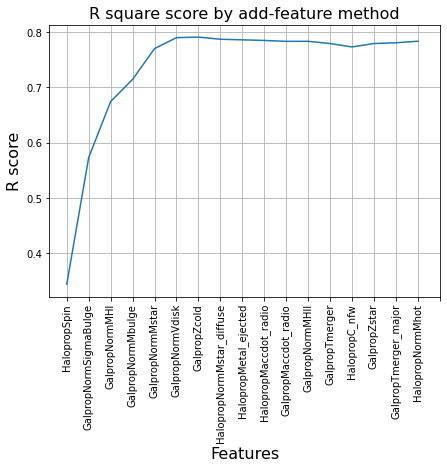

Elapsed time to run RF func on Bulgier Disks: 1551.139 seconds
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.956, test=0.751) total time=   1.5s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.741, test=0.670) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.917, test=0.735) total time=   1.5s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.954, test=0.770) total time=   1.3s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.743, test=0.673) total time=   0.9s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.922, test=0.756) total time=   1.5s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.724, test=0.690) total time=   0.9s
[CV 3/

[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.956, test=0.787) total time=   0.9s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.725, test=0.696) total time=   0.5s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.915, test=0.777) total time=   0.7s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.956, test=0.755) total time=   0.9s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.739, test=0.649) total time=   0.5s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.912, test=0.745) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=(train=0.925, test=0.760) total time=   1.5s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimator

[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.737, test=0.694) total time=   0.9s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.951, test=0.773) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.957, test=0.770) total time=   1.5s
[CV 3/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=20;, score=(train=0.720, test=0.690) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=20;, score=(train=0.915, test=0.742) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.922, test=0.741) total time=   0.7s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.953, test=0.762) total time=   0.9s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estima

[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.955, test=0.767) total time=   0.9s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=(train=0.753, test=0.667) total time=   0.9s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.951, test=0.772) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.951, test=0.774) total time=   0.8s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.738, test=0.695) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.916, test=0.728) total time=   0.8s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=50;, score=(train=0.956, test=0.783) total time=   0.9s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estim

[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.918, test=0.767) total time=   0.7s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.948, test=0.751) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.956, test=0.786) total time=   1.5s
[CV 2/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_estimators=50;, score=(train=0.730, test=0.686) total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=50;, score=(train=0.919, test=0.766) total time=   0.8s
[CV 3/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=20;, score=(train=0.948, test=0.766) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=None, min_samples_leaf=2, n_estimators=100;, score=(train=0.954, test=0.778) total time=   1.5s
[CV 1/3] END bootstrap=True, max_depth=5, min_samples_leaf=2, n_est

In [28]:
# this code takes 25.8 mins to run when the dataset is bulgier disk galaxies with ~4,300 entries
start_time = time.time()

bulgier_disks_RF_results = functions.target_predicting_RF_function(X=X_bulgier_disks, y=y_bulgier_disks)

elapsed_time = time.time() - start_time

print(f"Elapsed time to run RF func on Bulgier Disks: {elapsed_time:.3f} seconds")

#### The most important features for Bulgier Disks (and their add-on corresponding R scores) are:

     1 HalopropSpin 0.34430875557264334
	 2 GalpropNormSigmaBulge 0.5733138209096916
	 3 GalpropNormMHI 0.6744729720640937
	 4 GalpropNormMbulge 0.7145032481218297
	 5 GalpropNormMstar 0.7701495639997087
	 6 GalpropNormVdisk 0.7899566427860466
	 7 GalpropZcold 0.790921462829786
	 8 HalopropNormMstar_diffuse 0.7870362137861071
	 9 HalopropMetal_ejected 0.7859761358486343
	 10 HalopropMaccdot_radio 0.7848669192360621
	 11 GalpropMaccdot_radio 0.783250317657313
	 12 GalpropNormMHII 0.7833306469527868
	 13 GalpropTmerger 0.7792734422868701
	 14 HalopropC_nfw 0.77314601291824
	 15 GalpropZstar 0.7793460345130736
	 16 GalpropTmerger_major 0.7806550413768297
	 17 HalopropNormMhot 0.7834530005519061


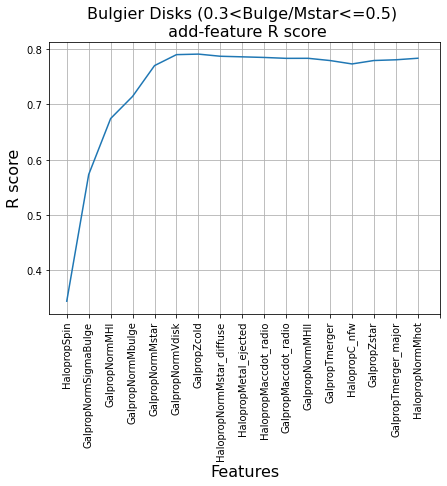

In [30]:
fig_add_feature_bulgier_disks=bulgier_disks_RF_results[4].plot(x='features', y='r_sq_score', rot=90, figsize=(7,5), use_index=True,
                    legend=False, grid=True, 
                    xticks=range(0,18))
fig_add_feature_bulgier_disks.set_title(label= 'Bulgier Disks (0.3<Bulge/Mstar<=0.5) \n add-feature R score',fontsize=16)
fig_add_feature_bulgier_disks.set_xlabel('Features',fontsize=16)
fig_add_feature_bulgier_disks.set_ylabel('R score',fontsize=16)

# fig_add_feature_bulgy_disks.get_figure().savefig('Bulgier Disks R score by add-feature method.jpg', dpi=500)

plt.show()

In [31]:
# bulgier_disks_RF_results[4].to_csv('Bulgier Disks Max r scores by add column method.csv', index=False)

In [32]:
# bulgier_disks = pd.read_csv('Bulgier Disks Max r scores by add column method.csv')

In [33]:
fig_bulgier_disks = bulgier_disks_RF_results[1]
# fig_bulgier_disks.savefig('Bulgier Disks RF Prediction_vs_True.jpeg', dpi=500)
plt.show()

In [34]:
fig_builtin_imp_bulgier_disks = bulgier_disks_RF_results[2]
# fig_builtin_imp_bulgier_disks.savefig('Bulgier Disks Built-in Feature Ranking.jpeg', dpi=500)
plt.show()